In [11]:
%load_ext autoreload
%autoreload 2

In [12]:
import os

from matplotlib import pyplot as plt
import numpy as np


In [3]:
def simulate_experience(img_dir=None):
	# the image paths
	image_names = sorted(os.listdir(img_dir))

	for image_name in image_names:
		yield image_name

## Compare Image with Feature Map

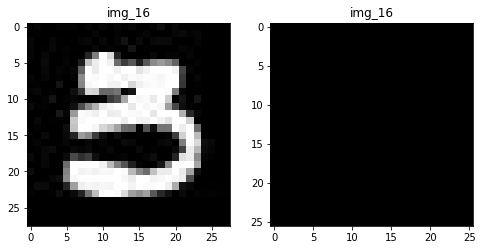

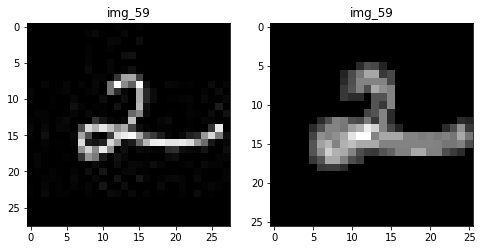

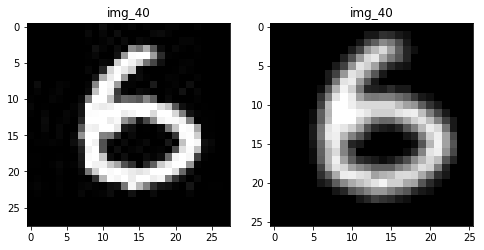

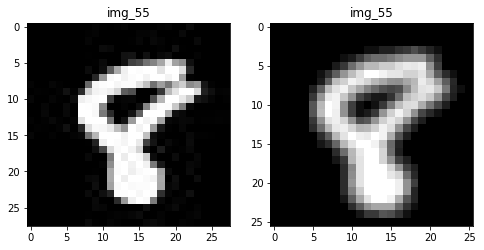

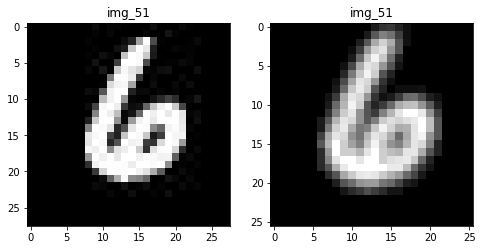

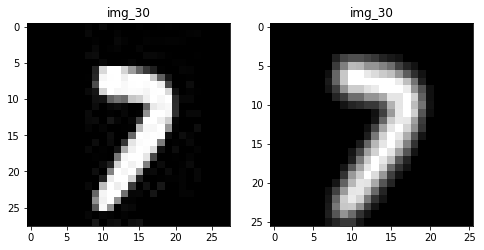

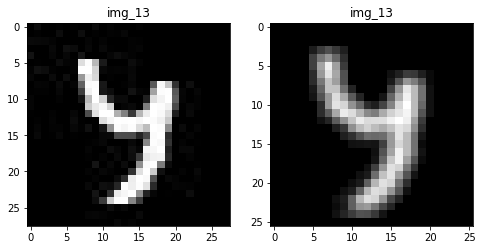

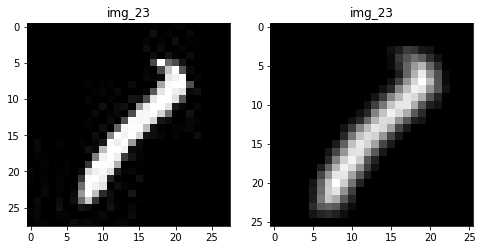

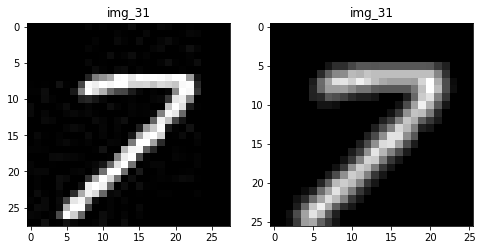

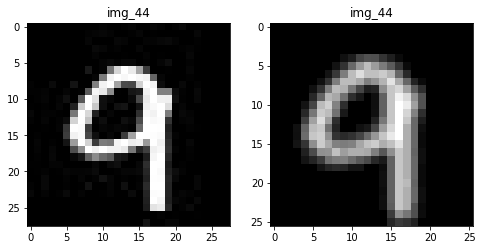

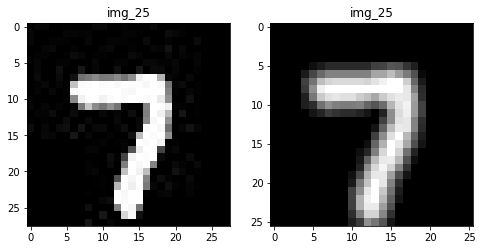

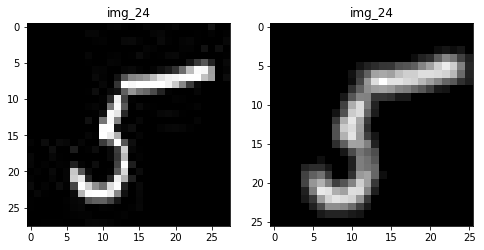

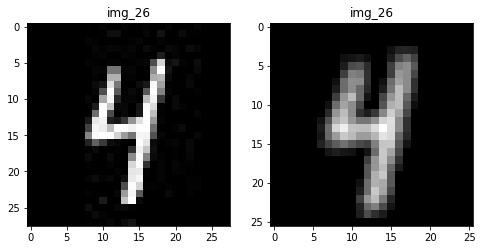

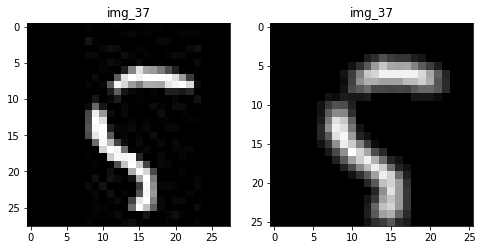

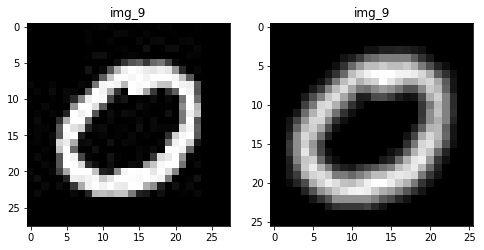

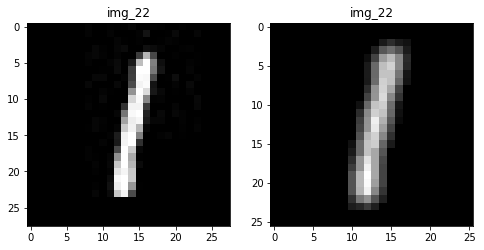

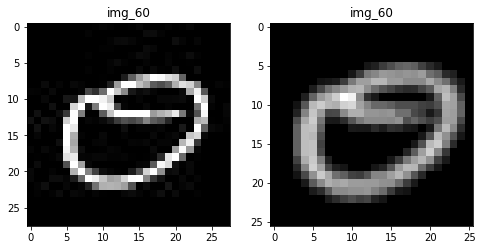

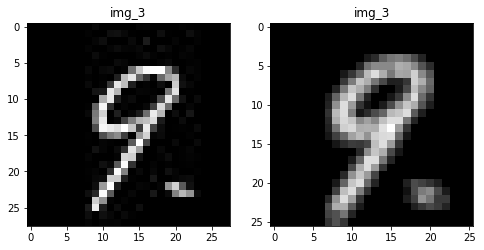

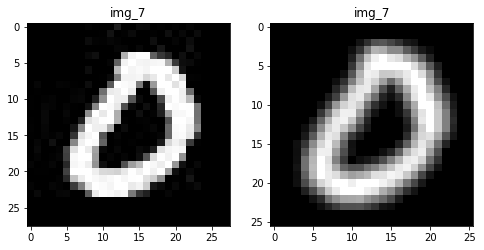

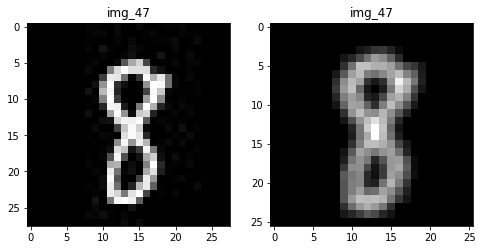

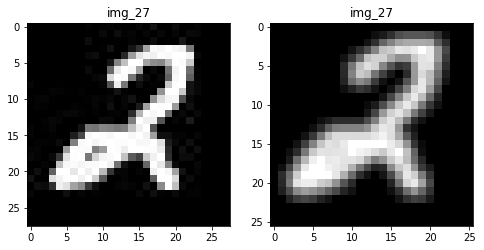

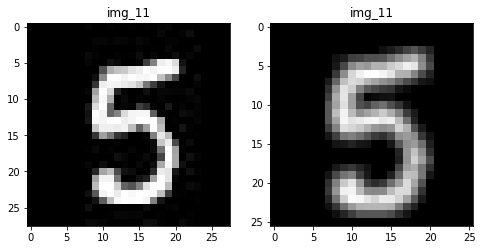

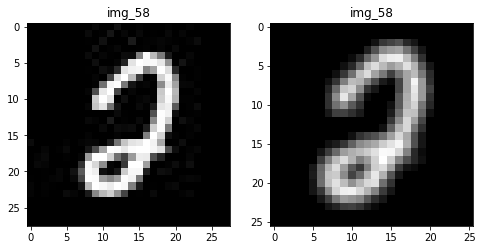

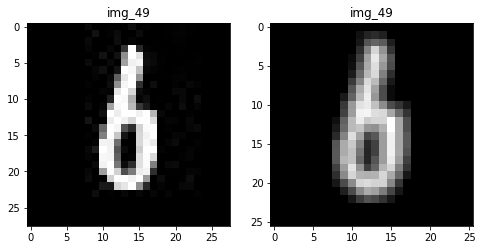

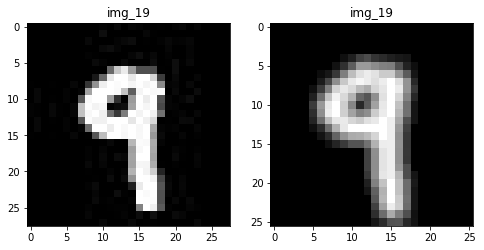

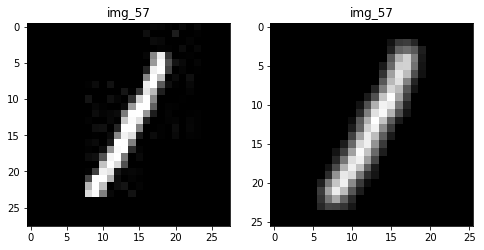

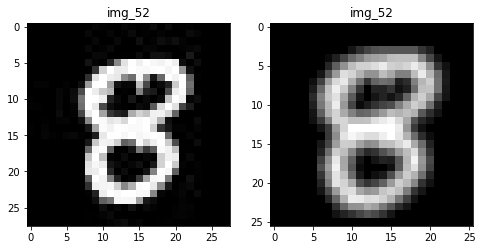

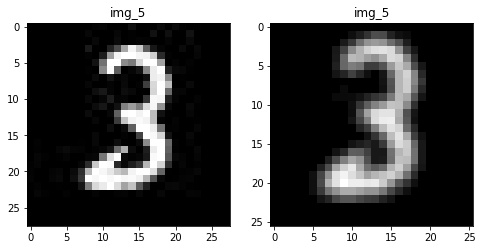

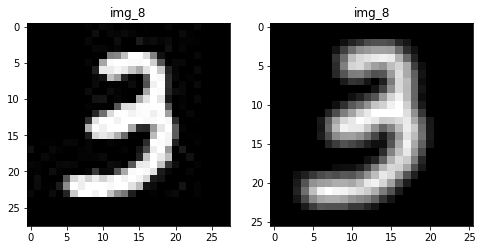

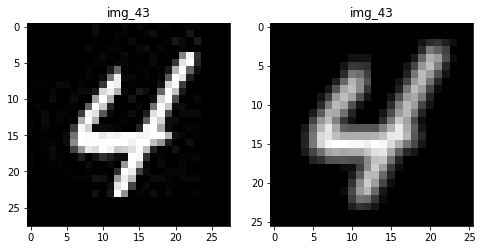

In [4]:
import json

processor_index = 0
with open('train.json', 'r') as f:
    image_names = json.load(f)
    
for image_name in image_names:
    metadata = image_names[image_name]
    
    idx = image_name.split('.')[0]
    feature_map = np.loadtxt('results/feature_maps/{}/{}.txt'.format(processor_index, idx))
    image = np.loadtxt('results/images/{}/{}.txt'.format(processor_index, idx))

    w=10
    h=10
    fig=plt.figure(figsize=(8, 8))
    columns = 2
    rows = 1
    li = [0, image, feature_map]
    for i in range(1, columns*rows +1):
        ax = fig.add_subplot(rows, columns, i)
        ax.set_title(idx)
        plt.imshow(li[i], cmap='gray')
    plt.show()

In [5]:
def loadtxt(folder, pid, img_name):
    return np.loadtxt('results/{}/{}/{}.txt'.format(folder, pid, img_name))

def sim(a, b):
    return np.sqrt(np.sum(abs(a - b)**2))

## Test for Convergence

In [12]:
img_dir = 'test/photos'
image_names = simulate_experience(img_dir)
pi = 0

for i, image_name in enumerate(image_names):
    if i == 0:
        last_idx = image_name.split('.')[0]
        continue
    idx = image_name.split('.')[0]
    a_fm = loadtxt('feature_maps', pi, idx)
    b_fm = loadtxt('feature_maps', pi, last_idx)
    fm_diff = sim(a_fm, b_fm) / sim(np.full(a_fm.shape, 255), 0)

    a_img = loadtxt('images', pi, last_idx)
    b_img = loadtxt('images', pi, idx)
    img_diff = sim(a_img, b_img) / sim(np.full(a_img.shape, 255), 0)

    print(image_name, fm_diff, img_diff)
    last_idx = idx

OSError: results/feature_maps/0/IMG_20190724_215614.txt not found.

In [ ]:
idx = "img_5"
pi = 9
feature_map = loadtxt('feature_maps', '0', idx)
image = loadtxt('images', pi, idx)
feature_map = loadtxt('images', pi, 'img_16')

In [ ]:
plt.imshow(image, cmap='gray')

In [ ]:
plt.imshow(feature_map, cmap='gray')

In [ ]:
a, b = 5, 9
feature_map.shape

In [ ]:
with open('train.json', 'r') as f:
    image_names = json.load(f)
    
li = list(image_names.values())
{d:li.count(d) for d in set(li)}

In [ ]:
feature_map[a:b, a:b]

In [ ]:
image[a:b, a:b]

In [ ]:
image - feature_map

In [ ]:
import numpy as np

# pn = np.array([[2,3,5],[7,11,13],[17,19,23]])
def c(m):
#     pn = np.array([[10, 100, 1_000],[10_000, 100_000, 1_000_000],[10_000_000, 100_000_000, 1_000_000_000]], dtype=np.int64)
    pn = np.array([[2, 3, 11],[5, 7, 17],[13, 19, 23]], dtype=np.int64)
    v = m*pn
    return np.sum(v)

n = 10
s = 256//n
for i in range(0, 256, s):
    m = np.full((3,3), i)
    z = c(m)
    print('{:>3} {:>12}'.format(i, z))

In [ ]:
m1 = np.array([[0,0,0],[0,0,0],[0,0,1]])
m2 = np.array([[0,0,0],[0,0,1],[0,0,0]])
m3 = np.array([[0,0,0],[0,0,0],[0,1,0]])
m4 = np.array([[0,0,0],[0,0,1],[0,0,1]])
m5 = np.array([[0,0,0],[0,0,0],[0,1,1]])
m6 = np.array([[0,0,0],[0,0,1],[0,1,0]])
m7 = np.array([[0,0,0],[0,0,1],[0,1,1]])

for k in [m1,m2,m3,m4,m5,m6,m7]:
    z = c(k)
    print('{:>3} {:>12} {:>12}'.format(i, z, np.linalg.det(k)))

In [ ]:
print('{:>3} {:>12}'.format(i, c(np.array([[0,0,0],[0,0,0],[0,0,1]]))))

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import time

def simulate_sight():
    # the image paths
    image_template = np.zeros((28, 28, 3))

    start_i = 0
    for i in range(1, (28//7)+1):
        end_i = i*7

        start_j = 0
        for j in range(1, (28//7)+1):
            end_j = j*7
            
            image = image_template.copy()
            image[start_i:end_i, start_j:end_j] = 255

            start_j = end_j
            yield 'nameless_{}.jpg'.format(time.time()), image

        start_i = end_i
        
for i, x in enumerate(simulate_sight()):
    image_name, image = x
    idx = str(i)
    w=10
    h=10
    fig=plt.figure(figsize=(8, 8))
    columns = 1
    rows = 1
    li = [0, image]
    for i in range(1, columns*rows +1):
        ax = fig.add_subplot(rows, columns, i)
        ax.set_title(idx)
        plt.imshow(li[i])
    plt.show()

In [122]:
import cv2

In [710]:
def load_image(image_path):
	image = cv2.imread(image_path)
	image = image[...,::-1]
	image = np.array(image, dtype=np.float64)
	return image

def toGrey(img):
    return img.mean(2)

def is_row_in_array(row , arr):
    x = np.where((row == arr).all(tuple(range(len(arr.shape)))[1:]) == True)
    return x[0] if len(x) > 0 else False


255.0

In [124]:
import cv2
import numpy as np

def imshow_components(labels):
    # Map component labels to hue val
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

    # cvt to BGR for display
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0

    return labeled_img


In [153]:
# img = toGrey(load_image('dump/75oB8.png'))
img = toGrey(load_image('dump/image.jpg'))
img[img < 13] = 255
# img[(img > 50) & (img < 150)] = 255
# img[img > 150] = 255
img[img != 255] = 0
img = img.astype(np.uint8)


# img = cv2.imread('dump/b.jpg', -1)
# img = np.uint8(img)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, labels = cv2.connectedComponents(img)
labeled_img = imshow_components(labels)
np.amax(labels)

183

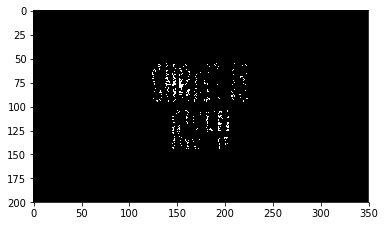

In [154]:
plt.imshow(img, cmap='gray')
# img

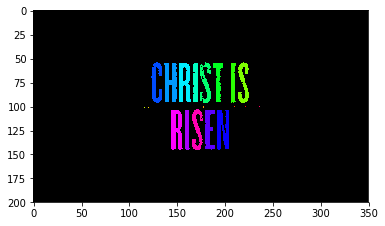

In [127]:
plt.imshow(labeled_img, cmap='gray')
# img

In [328]:
image_1d = np.array([0], dtype=np.float64)
for image_name in ['ds4s2.png', 'b.jpg', 'image.jpg', '75oB8.png']:
    image_1d = np.append(image_1d, toGrey(load_image('dump/{}'.format(image_name))))

In [621]:
# image_name = '75oB8.png'
# image_name = 'image.jpg'
image_name = 'b.jpg'
# image_name = 'semicolon.png'
# image_name = 'ds4s2.png'
# image_name = 'WIN_20190827_16_26_09_Pro.jpg'

image = load_image('dump/{}'.format(image_name))

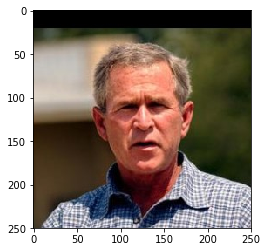

In [622]:
plt.imshow(image)

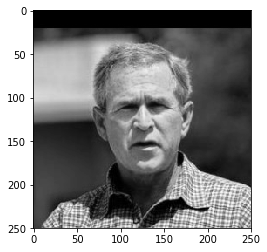

In [623]:
image = toGrey(image)
plt.imshow(image, cmap='gray')

In [558]:
image_1d = image.flatten()

In [559]:
image_1d_sorted = np.sort(image_1d)
image_1d_sorted_unique = np.unique(image_1d_sorted)

In [460]:
diff = image_1d_sorted
diffx = image_1d_sorted_unique

diffx_freq = np.array([len(diff[diff == iu]) for iu in diffx], dtype=np.float64)

diffx_freqx = np.sort(np.unique(diffx_freq))
diff = abs(np.diff(diffx_freqx))

meancd = diff.mean()

(diff.mean(), diff.std(), diff.mean()+diff.std()), (diff[diff > 0].mean(), diff[diff > 0].std(), diff[diff > 0].mean()+diff[diff > 0].std())

((21.270142180094787, 280.30014043764527, 301.5702826177401),
 (21.270142180094787, 280.30014043764527, 301.5702826177401))

In [461]:
# the clusters
lclusters = []

a = 0
lclass_pop = []
cp = 0
for i in range(len(diff)):
    cp += len(diffx_freq[diffx_freq == diffx_freqx[i]])
    if diff[i] >= meancd or i == len(diff)-1:
        b = i+1

        # save a cluster
        lclusters.append((a, b))
        lclass_pop.append(cp)
        cp = 0

        print('class {}: {} element(s)\n {}\n'.format(len(lclusters), b-a, diffx_freqx[a:b]))
        
        a = b
        
        
lclass_pop = np.array(lclass_pop, dtype=np.float64)
print(meancd, 'mean')


class 1: 199 element(s)
 [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  44.  45.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.
  59.  60.  61.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.
  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.
  88.  89.  90.  91.  92.  93.  95.  96.  97.  98.  99. 100. 101. 102.
 103. 104. 105. 106. 107. 108. 110. 111. 113. 114. 115. 116. 117. 118.
 119. 120. 121. 123. 125. 126. 127. 128. 129. 130. 132. 133. 135. 136.
 137. 138. 139. 141. 143. 144. 145. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 161. 163. 166. 167. 170. 172. 173. 174. 176. 177.
 179. 180. 181. 183. 186. 188. 193. 199. 200. 201. 211. 212. 214. 215.
 219. 220. 221. 222. 223. 224. 229. 232. 235. 237. 238. 244. 245. 249.
 252. 253. 255. 258. 260. 268. 270. 273. 275. 278. 2

(0.2406086543033761, 0.1566186846766198, 0.3972273389799959) (0.2406086543033761, 0.1566186846766198, 0.3972273389799959)
class 1: 1 element(s)
 [1.]

class 2: 1 element(s)
 [1.33333333]

class 3: 1 element(s)
 [1.66666667]

class 4: 2 element(s)
 [2. 2.]

class 5: 2 element(s)
 [2.33333333 2.33333333]

class 6: 1 element(s)
 [2.66666667]

class 7: 2 element(s)
 [3. 3.]

class 8: 2 element(s)
 [3.33333333 3.33333333]

class 9: 2 element(s)
 [3.66666667 3.66666667]

class 10: 2 element(s)
 [4. 4.]

class 11: 1 element(s)
 [4.33333333]

class 12: 2 element(s)
 [4.66666667 4.66666667]

class 13: 2 element(s)
 [5. 5.]

class 14: 1 element(s)
 [5.33333333]

class 15: 2 element(s)
 [5.66666667 5.66666667]

class 16: 2 element(s)
 [6. 6.]

class 17: 2 element(s)
 [6.33333333 6.33333333]

class 18: 2 element(s)
 [6.66666667 6.66666667]

class 19: 2 element(s)
 [7. 7.]

class 20: 2 element(s)
 [7.33333333 7.33333333]

class 21: 2 element(s)
 [7.66666667 7.66666667]

class 22: 2 element(s)
 [8. 


class 391: 1 element(s)
 [133.]

class 392: 1 element(s)
 [133.33333333]

class 393: 1 element(s)
 [133.66666667]

class 394: 1 element(s)
 [134.]

class 395: 1 element(s)
 [134.33333333]

class 396: 1 element(s)
 [134.66666667]

class 397: 1 element(s)
 [135.]

class 398: 1 element(s)
 [135.33333333]

class 399: 1 element(s)
 [135.66666667]

class 400: 1 element(s)
 [136.]

class 401: 1 element(s)
 [136.33333333]

class 402: 1 element(s)
 [136.66666667]

class 403: 1 element(s)
 [137.]

class 404: 1 element(s)
 [137.33333333]

class 405: 1 element(s)
 [137.66666667]

class 406: 1 element(s)
 [138.]

class 407: 1 element(s)
 [138.33333333]

class 408: 1 element(s)
 [138.66666667]

class 409: 1 element(s)
 [139.]

class 410: 1 element(s)
 [139.33333333]

class 411: 1 element(s)
 [139.66666667]

class 412: 1 element(s)
 [140.]

class 413: 1 element(s)
 [140.33333333]

class 414: 1 element(s)
 [140.66666667]

class 415: 1 element(s)
 [141.]

class 416: 1 element(s)
 [141.33333333]

class

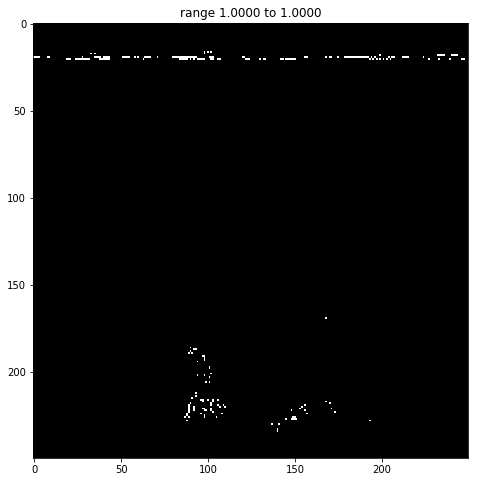

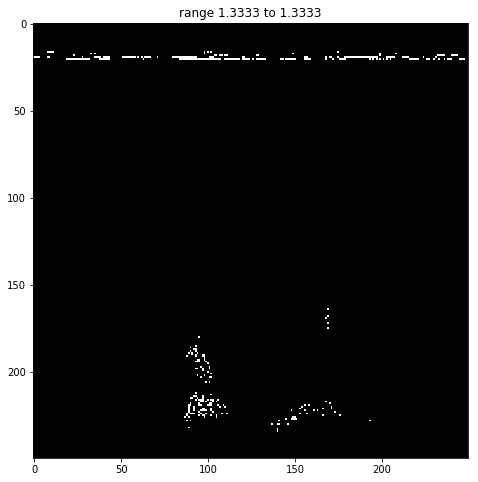

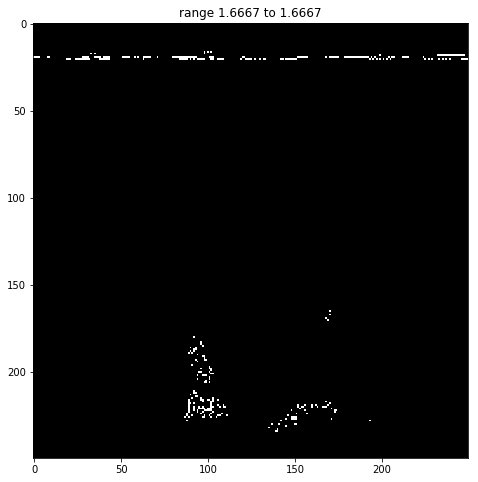

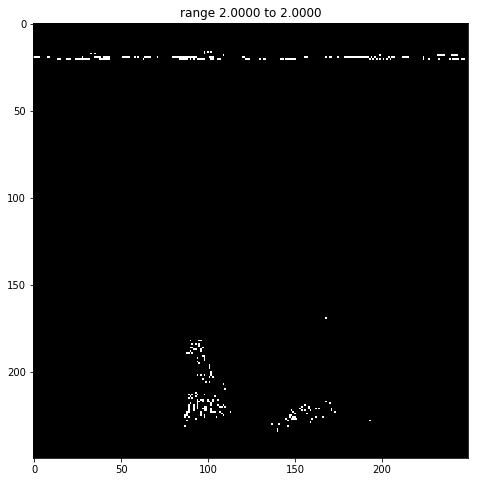

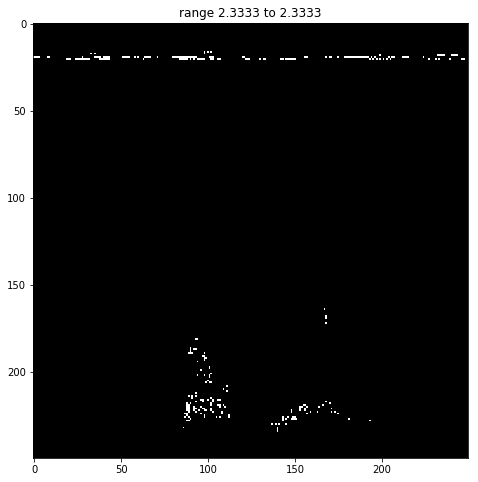

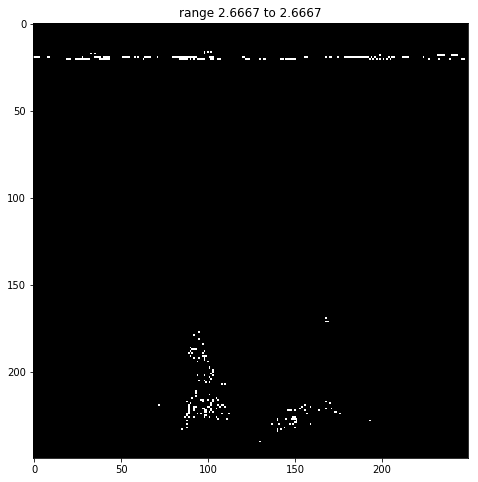

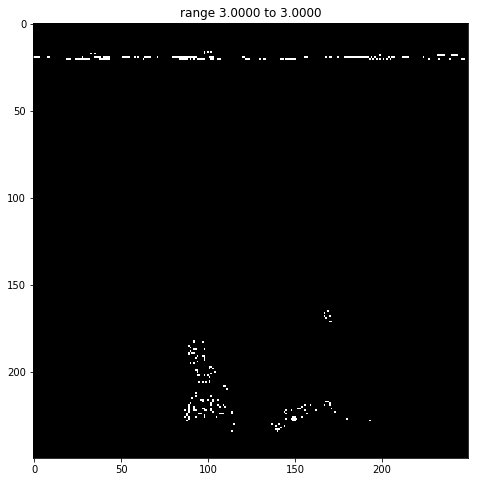

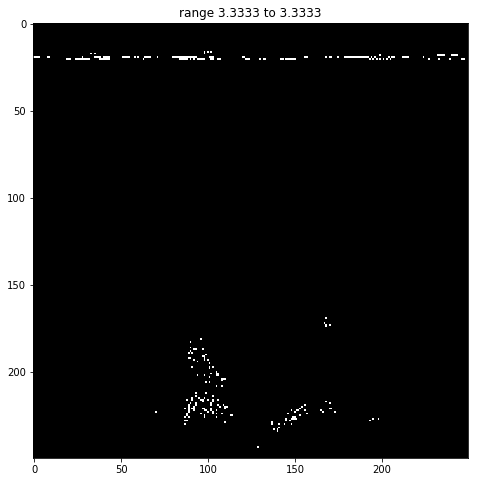

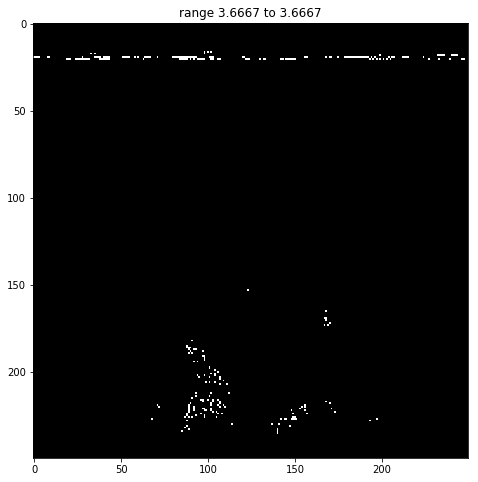

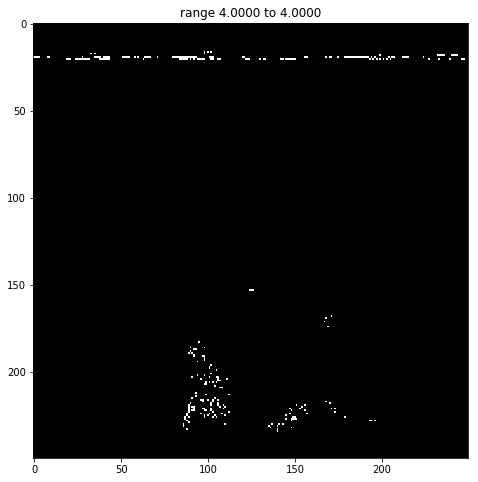

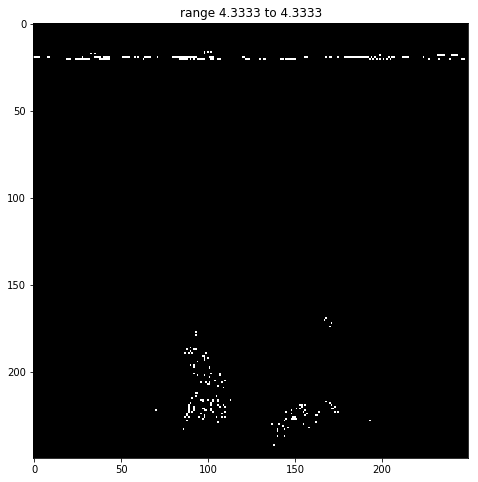

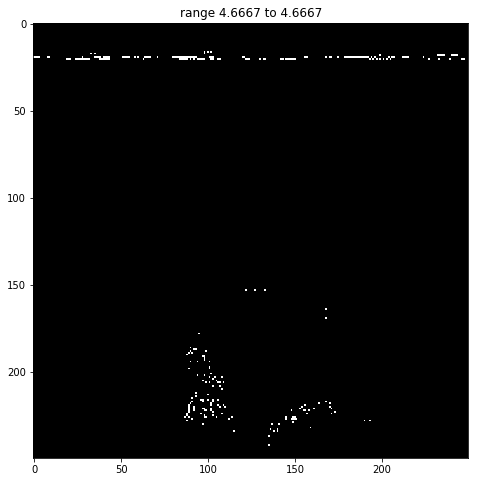

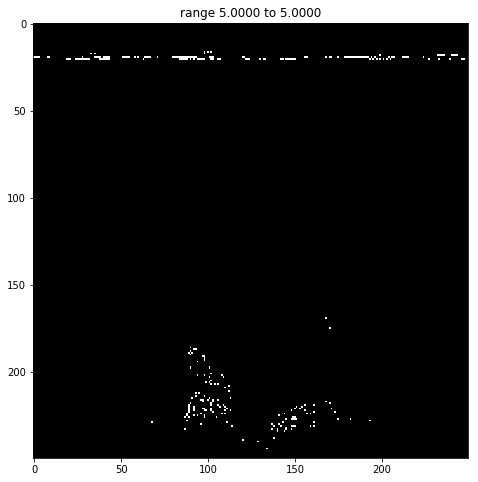

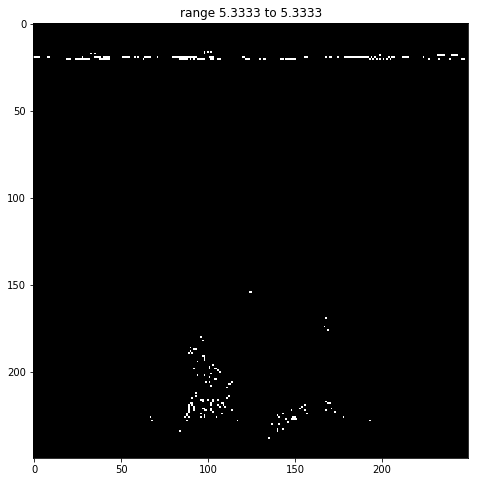

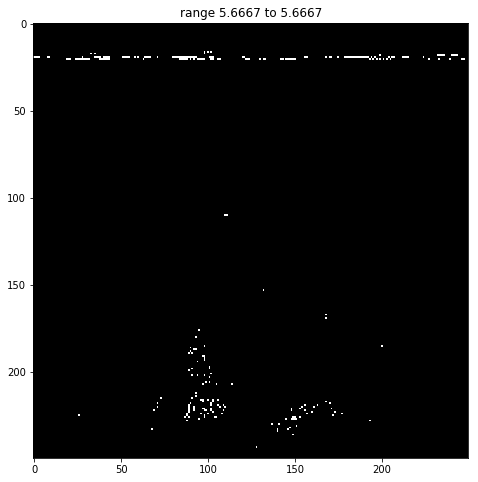

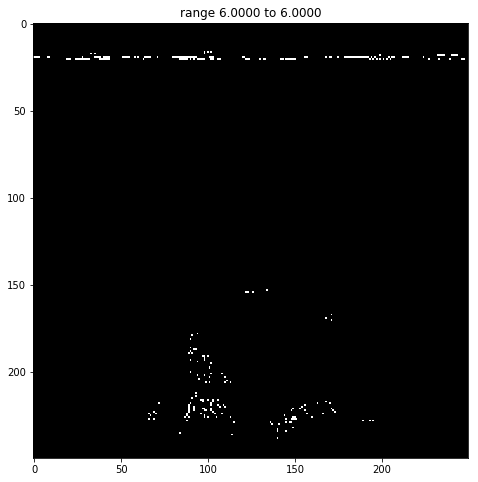

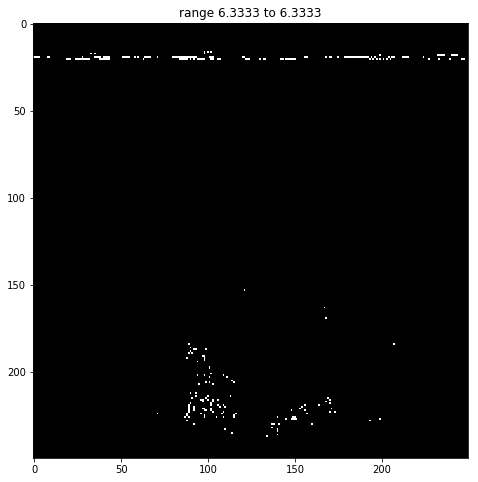

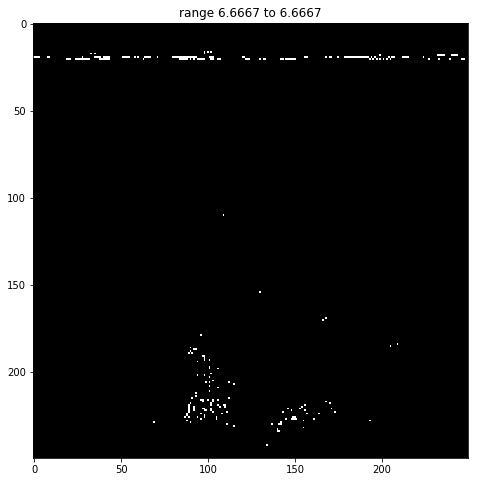

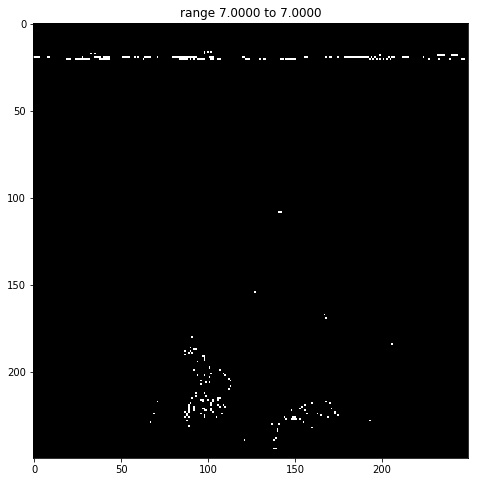

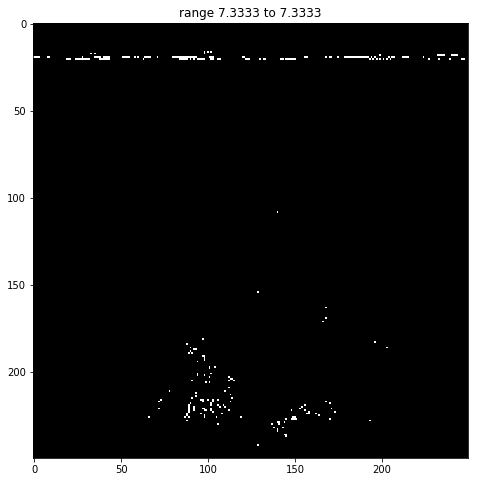

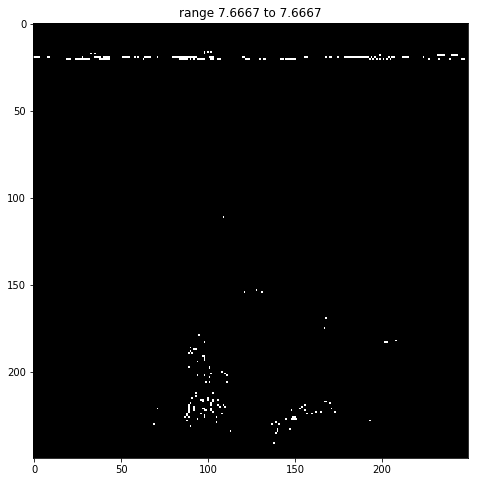

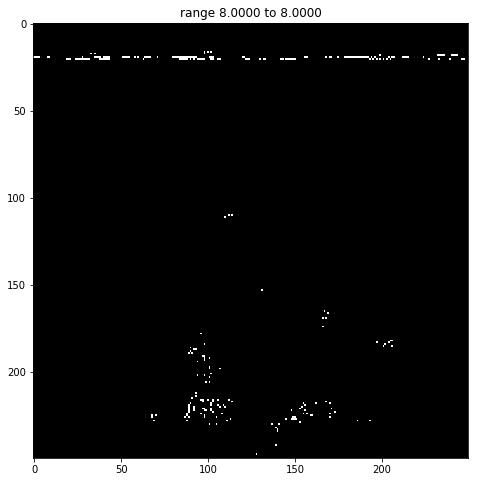

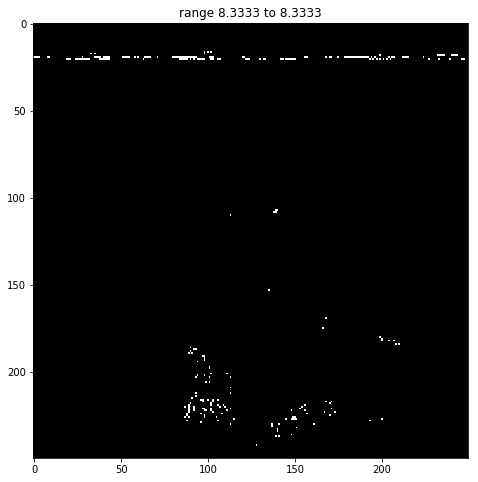

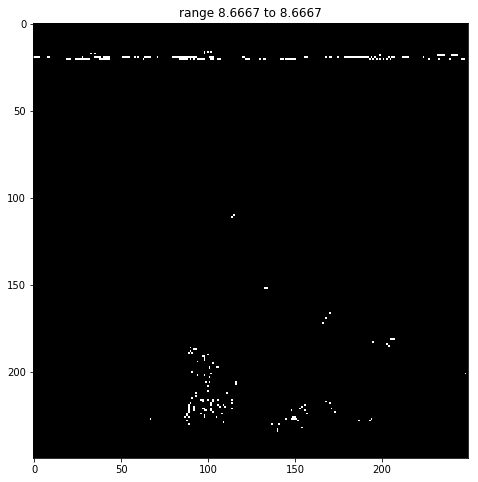

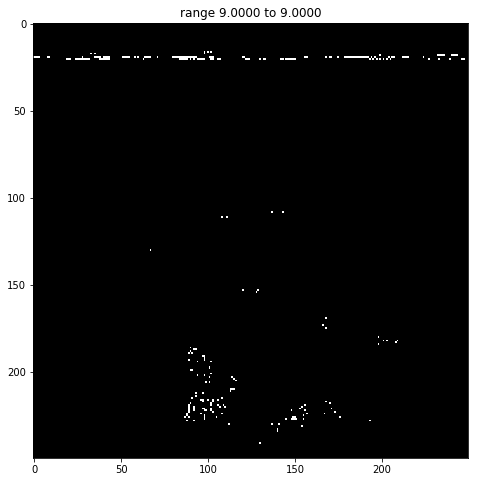

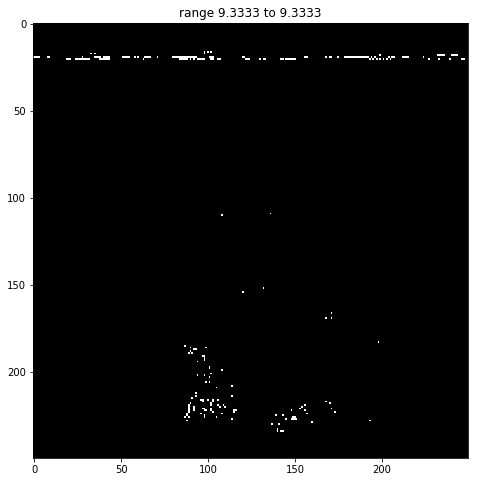

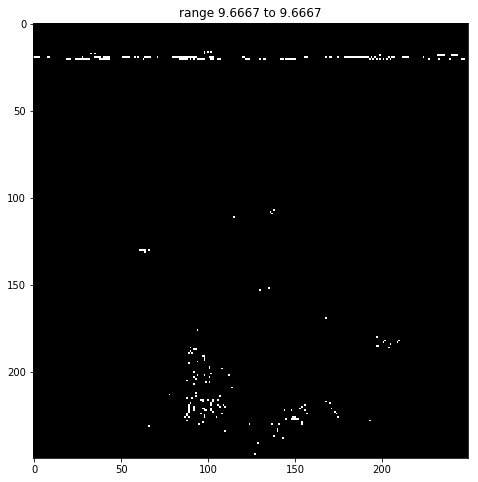

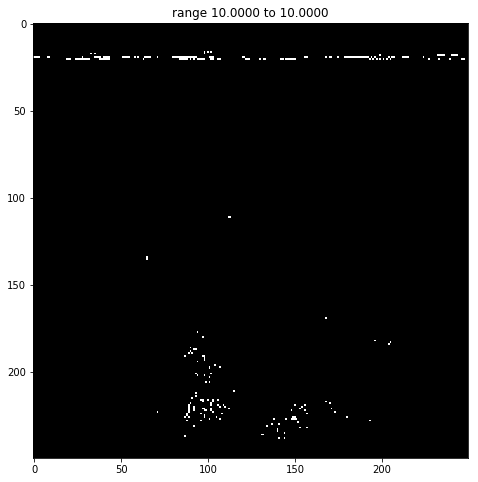

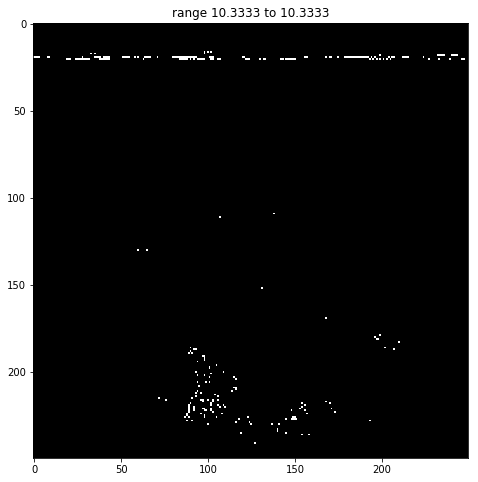

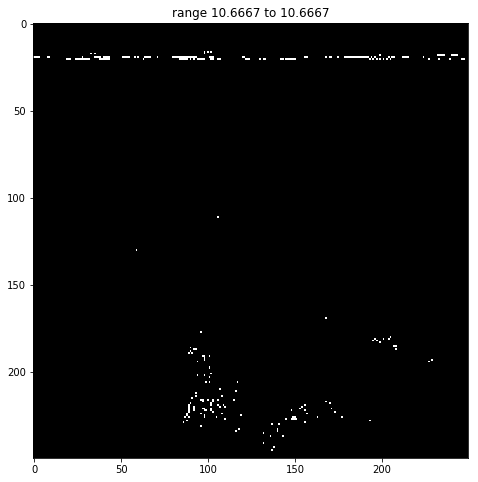

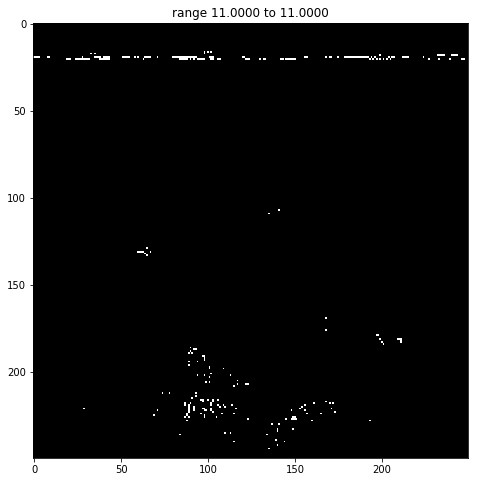

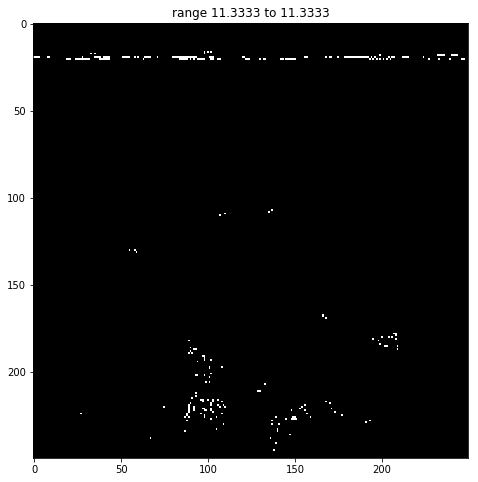

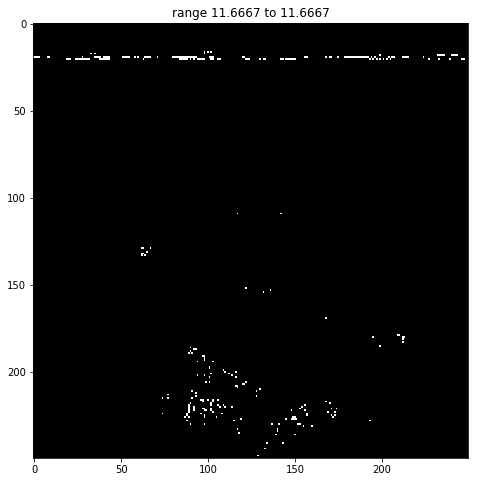

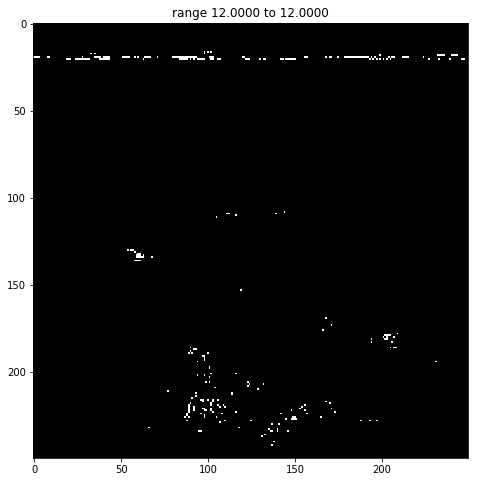

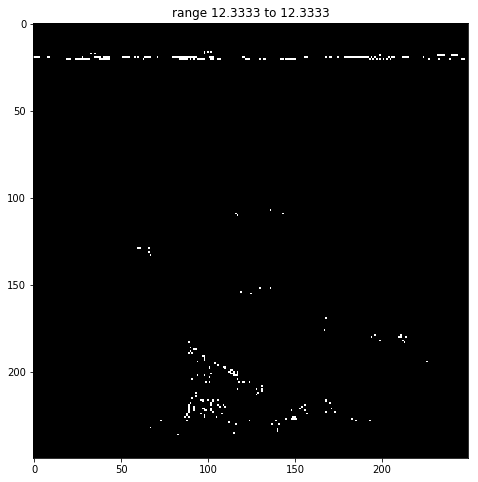

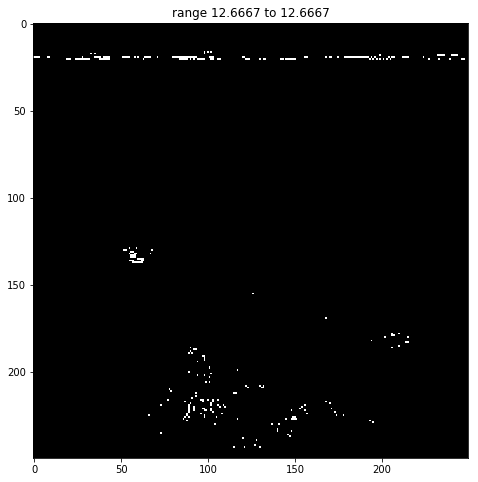

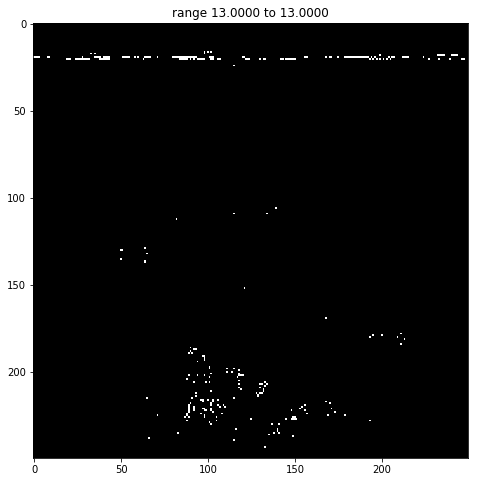

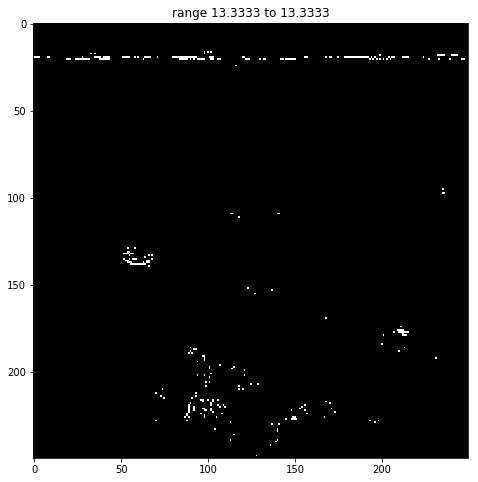

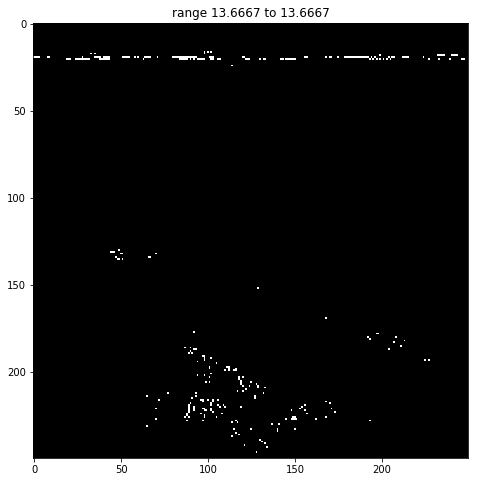

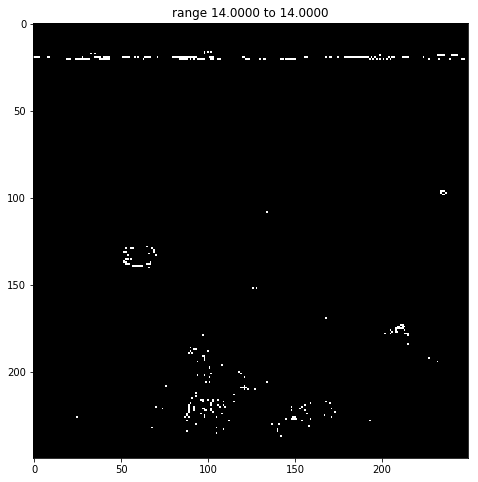

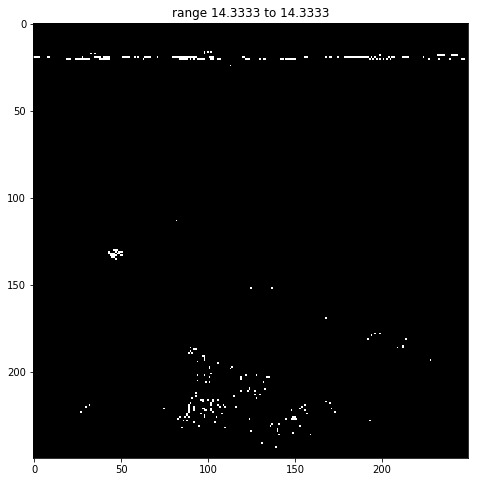

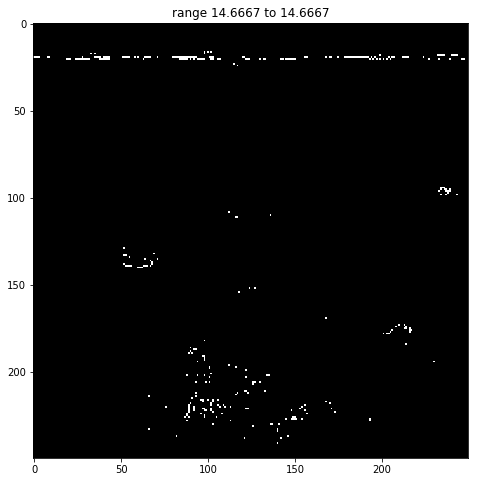

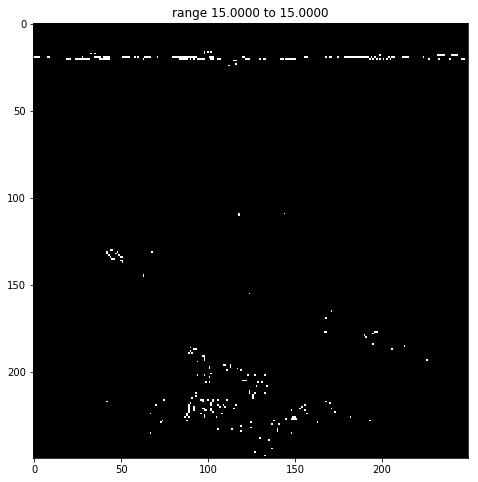

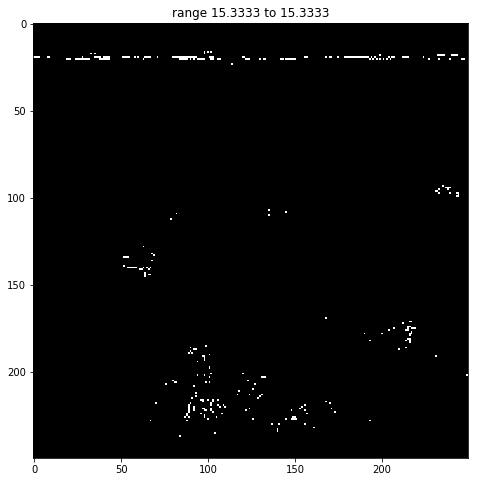

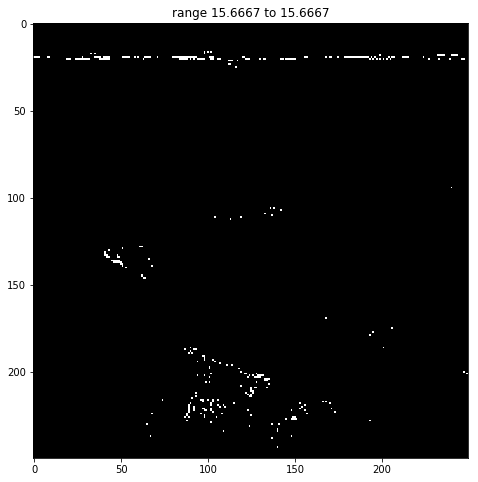

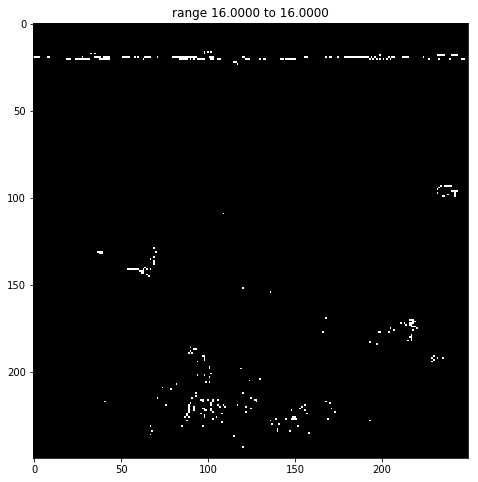

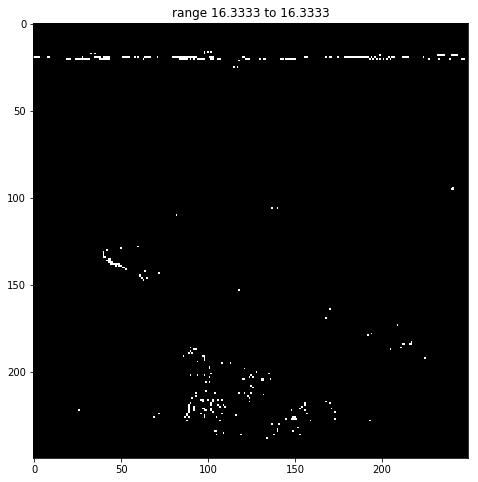

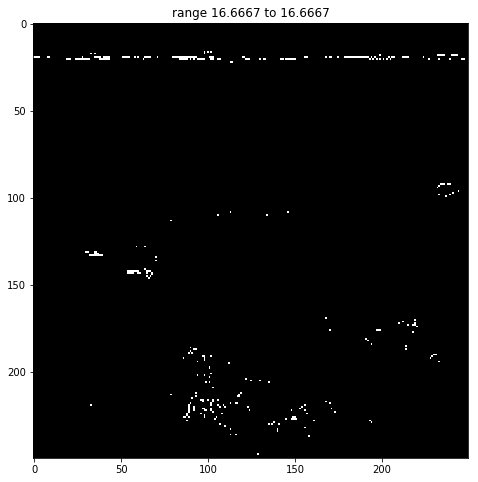

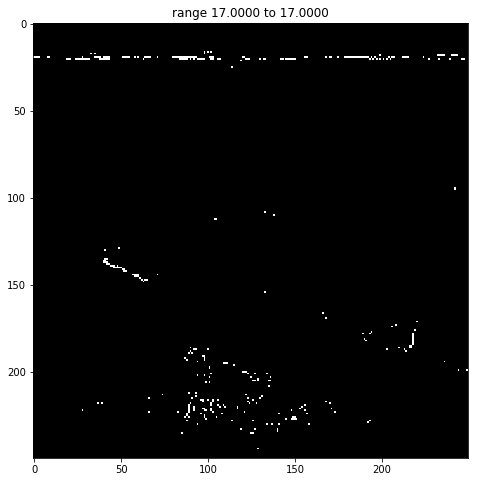

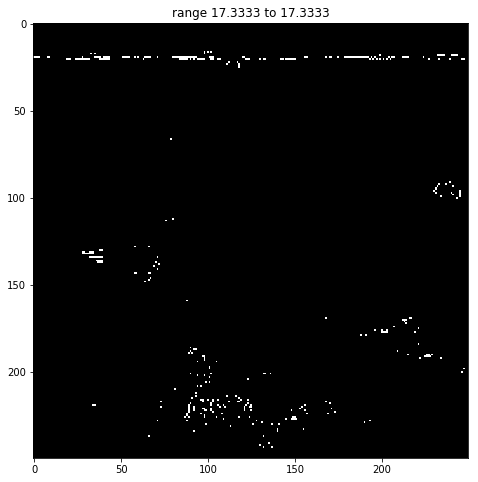

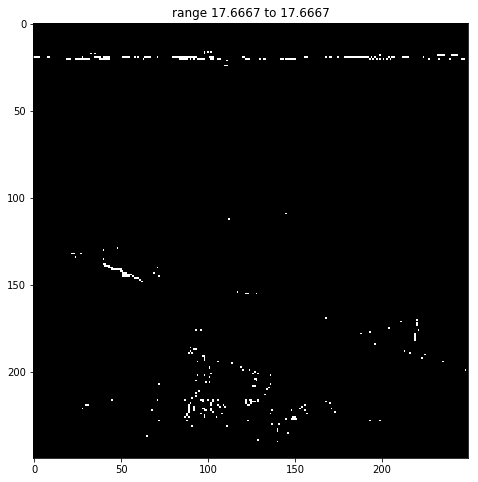

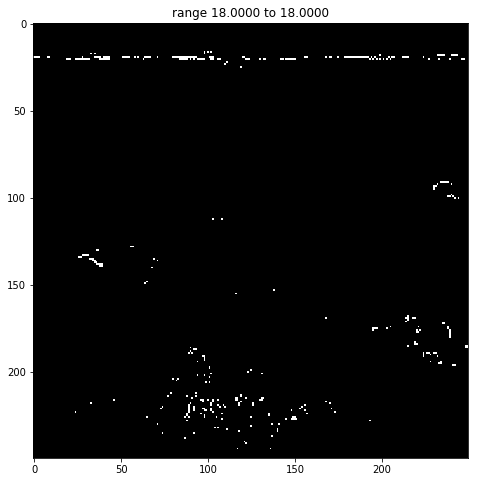

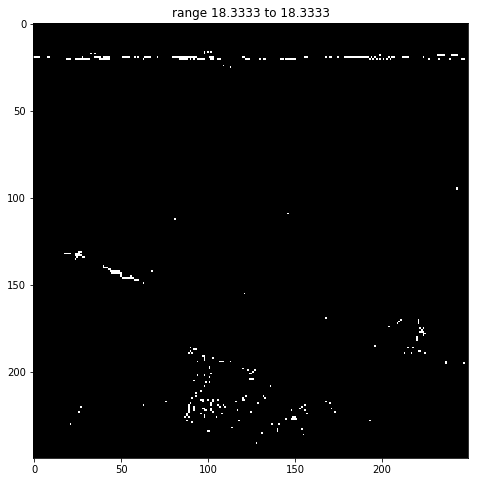

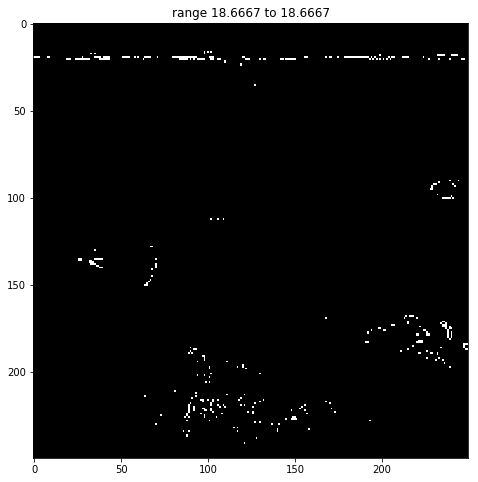

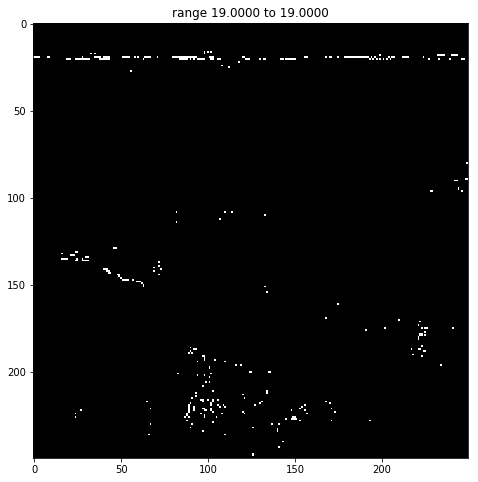

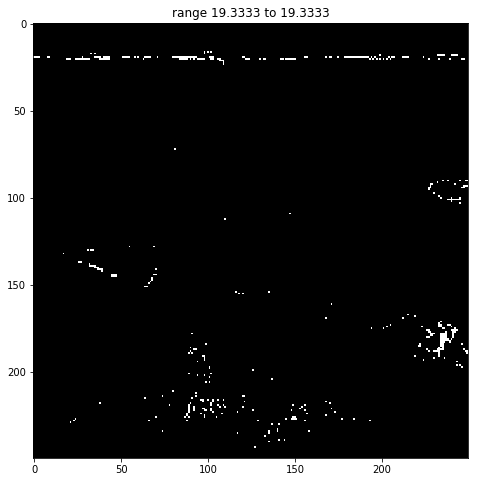

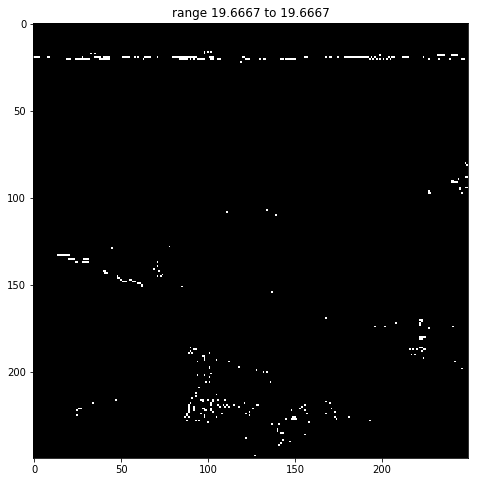

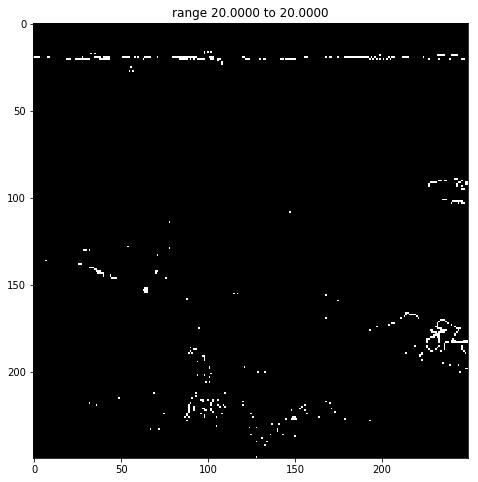

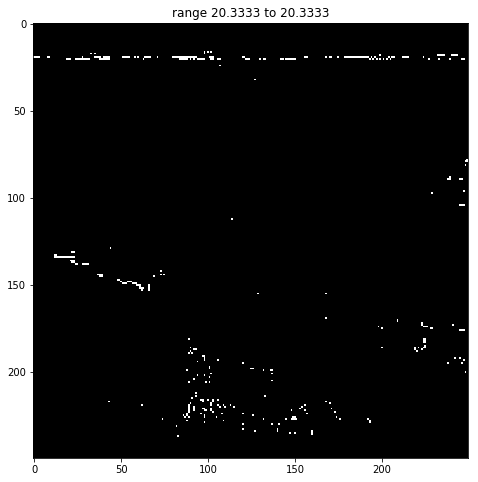

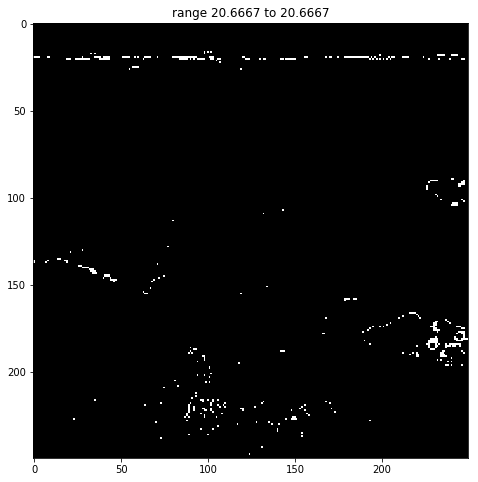

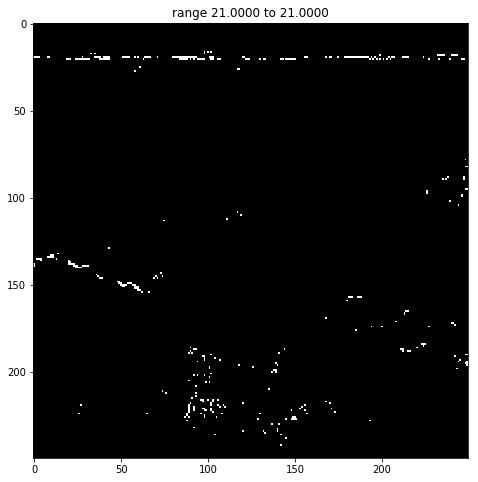

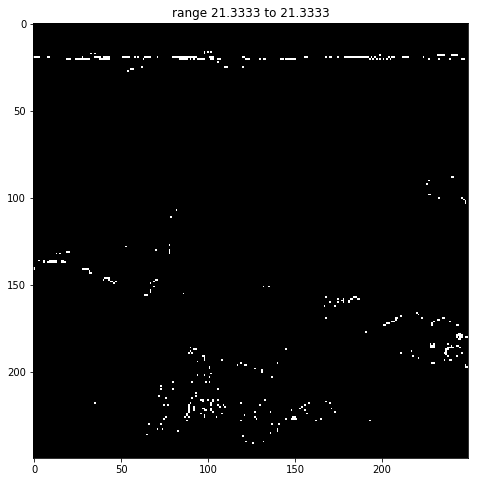

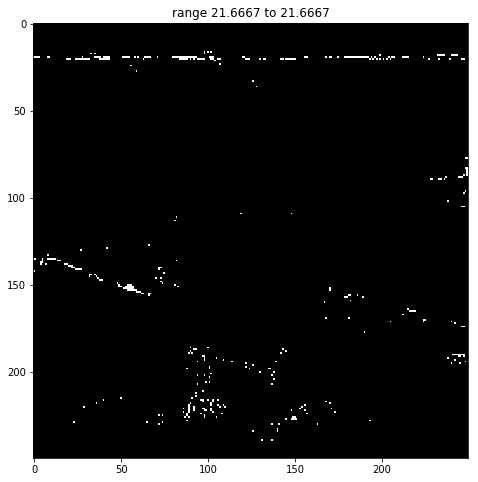

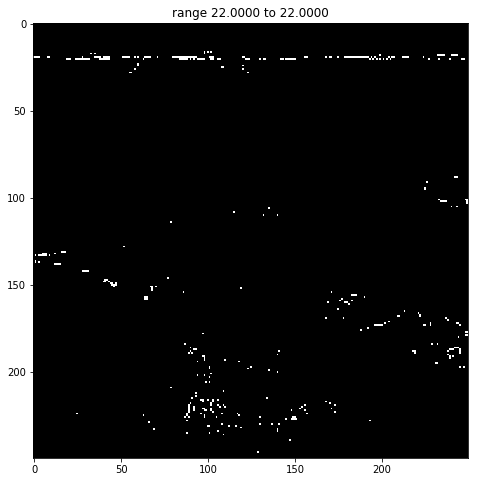

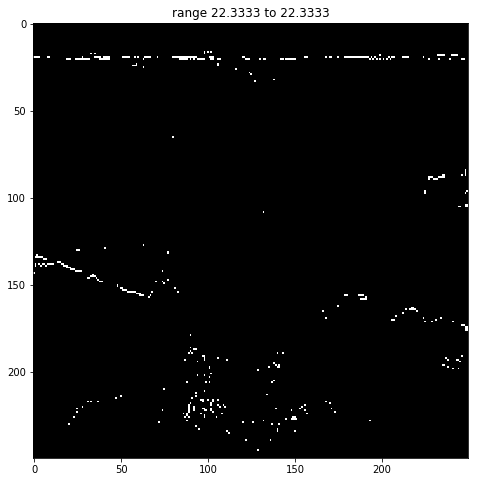

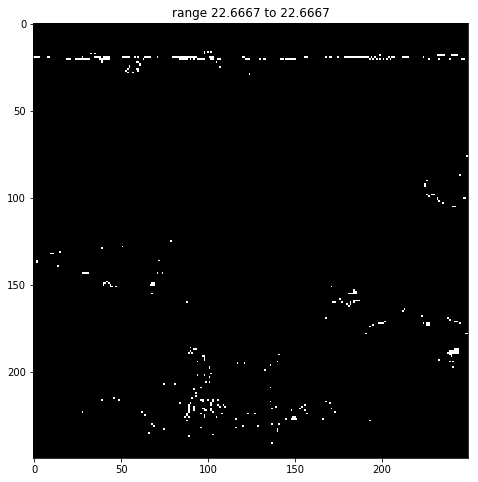

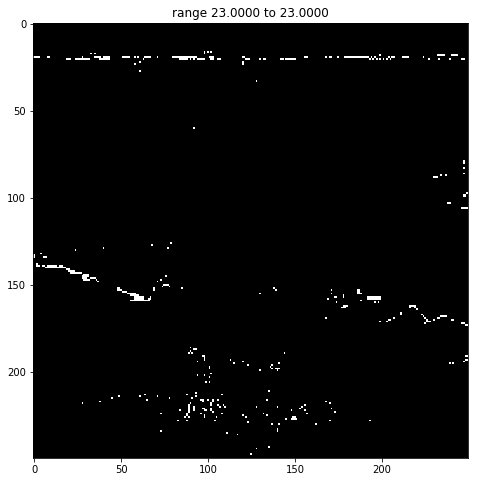

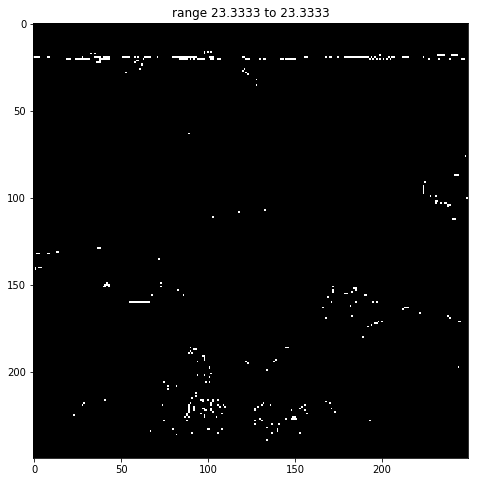

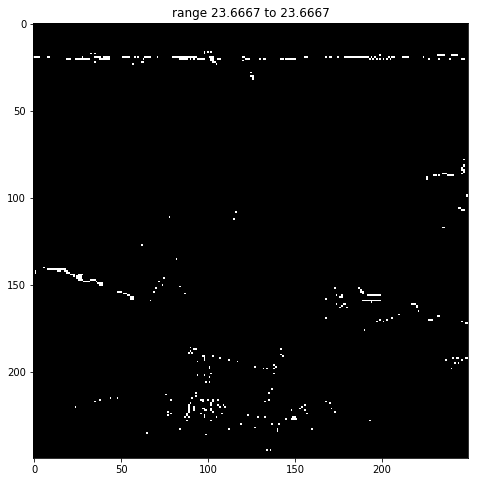

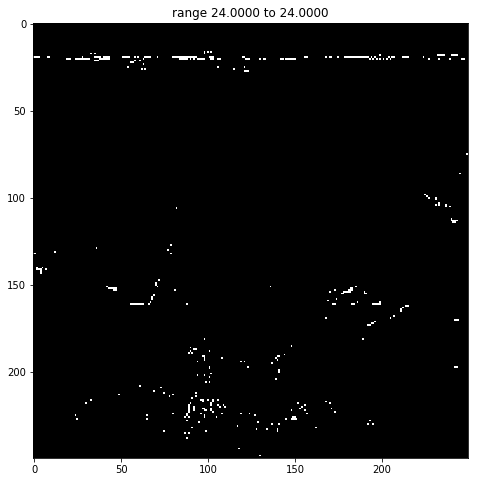

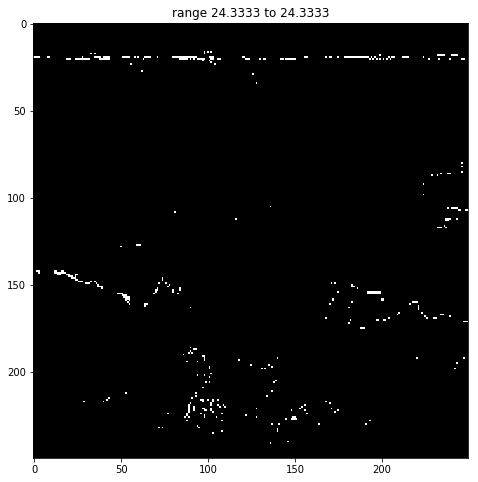

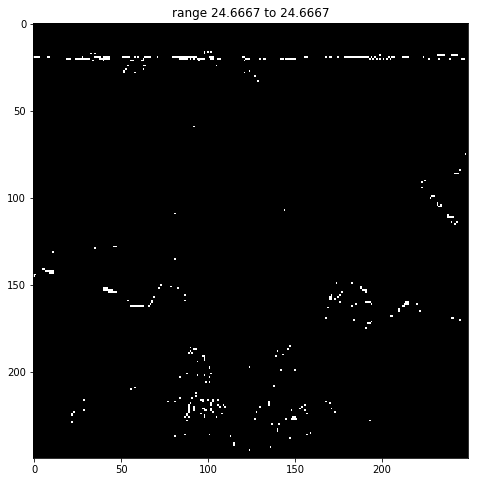

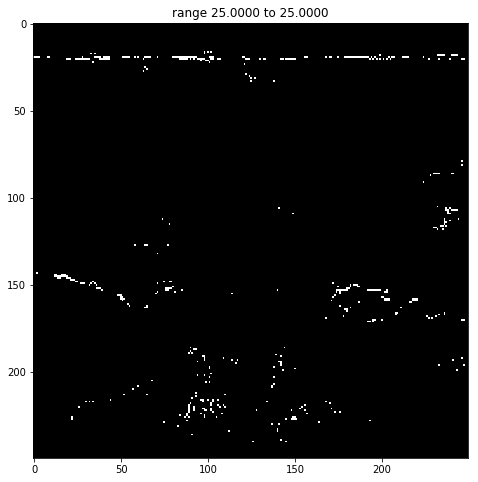

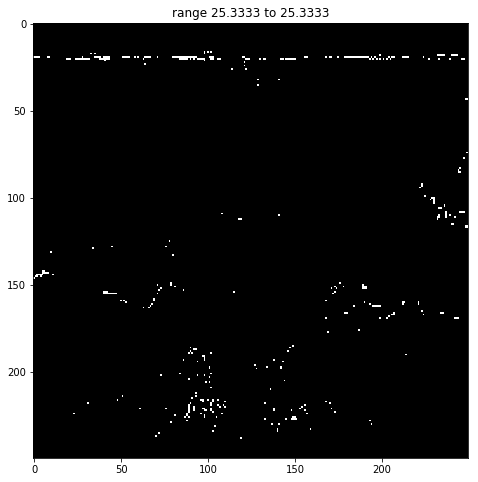

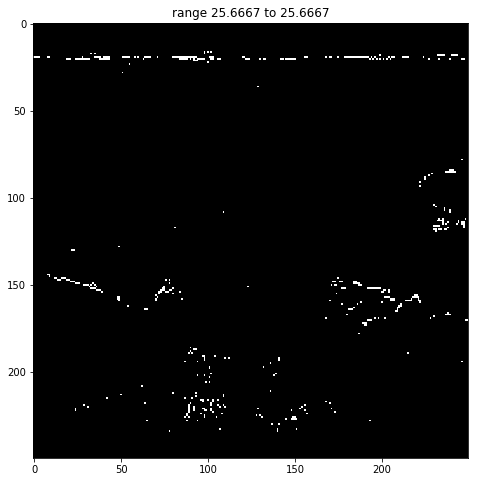

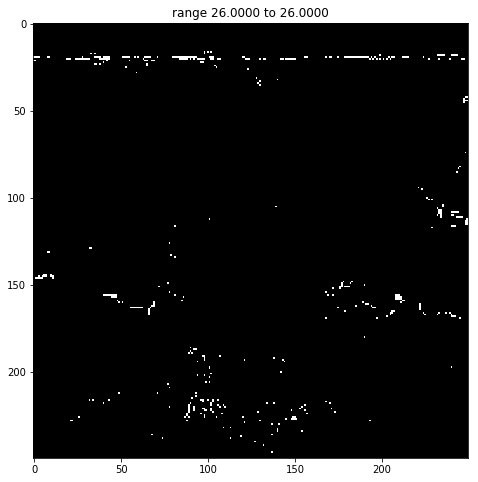

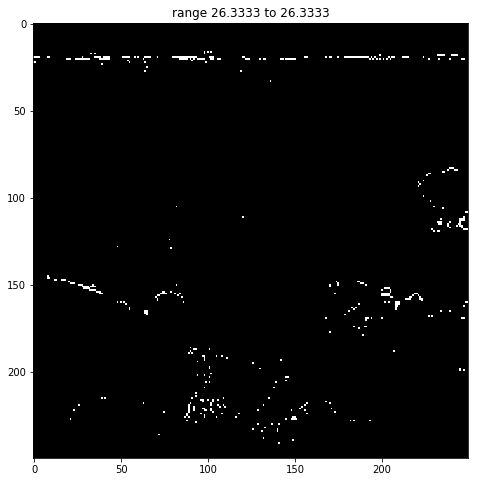

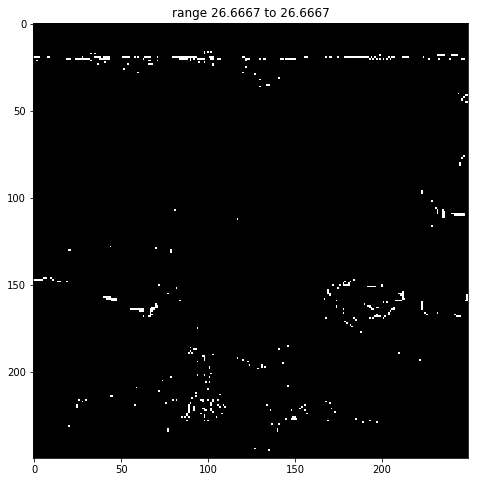

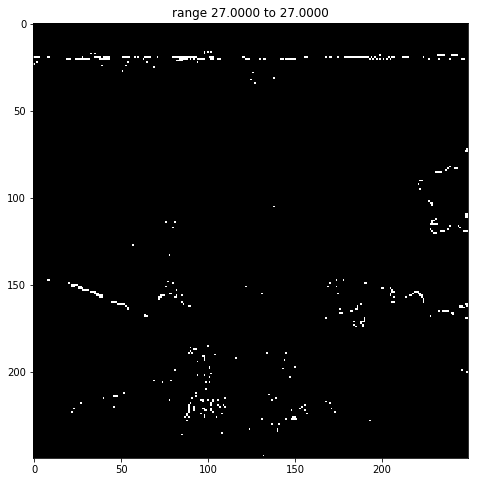

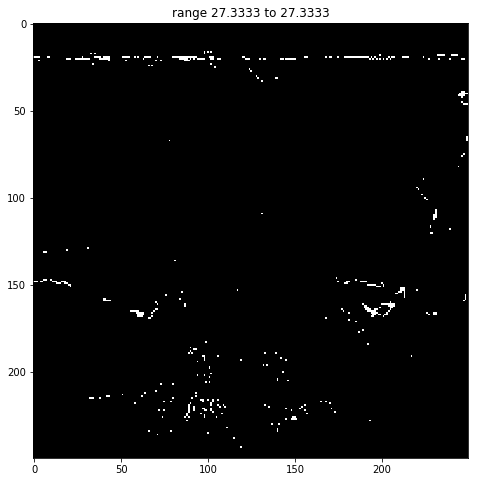

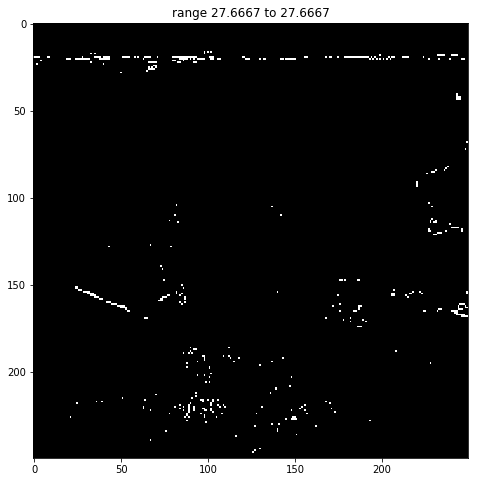

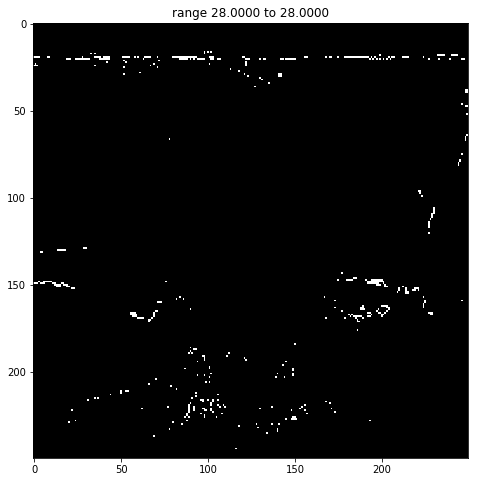

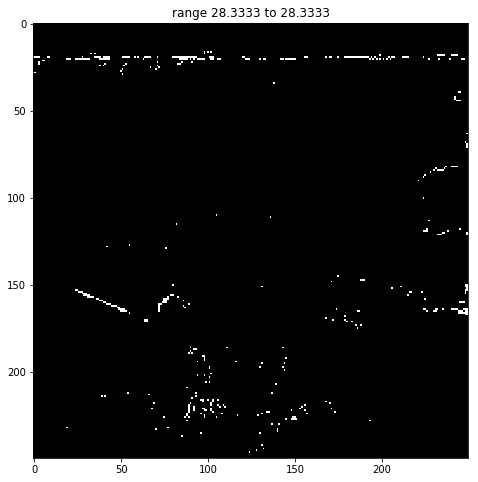

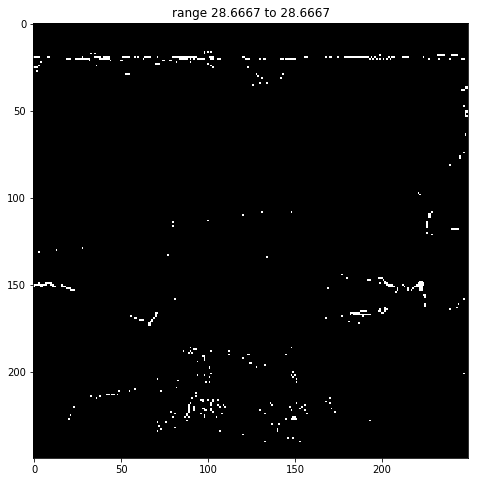

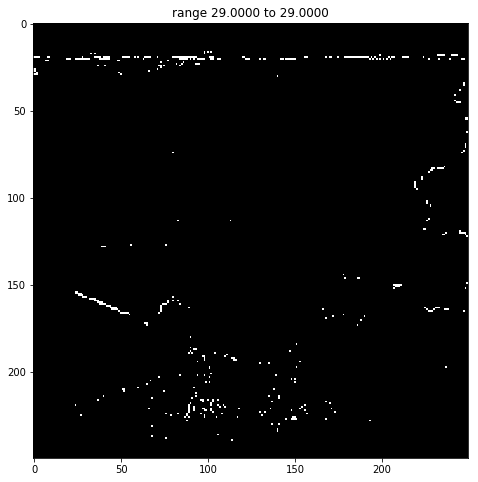

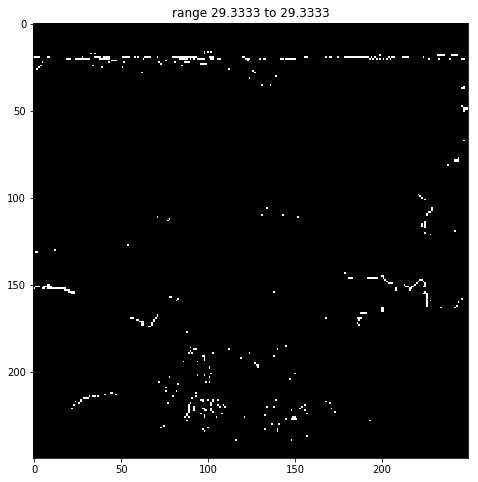

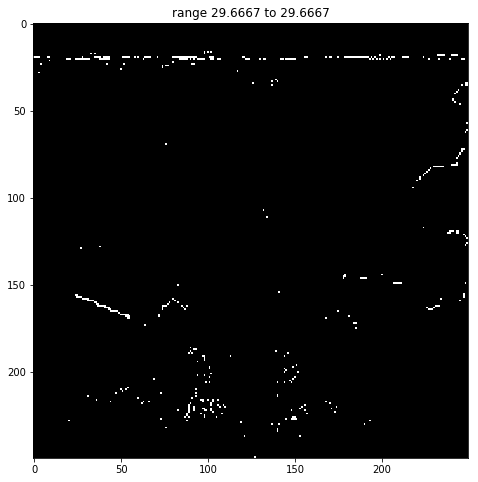

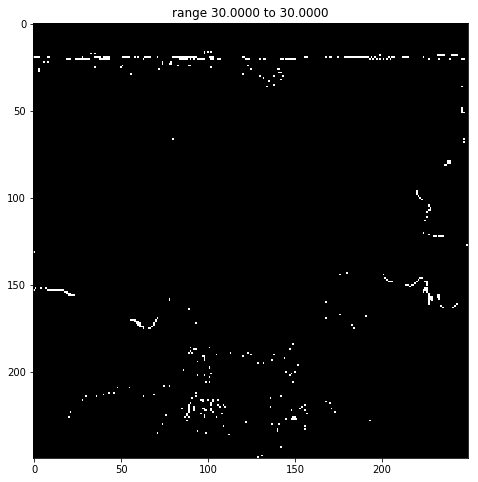

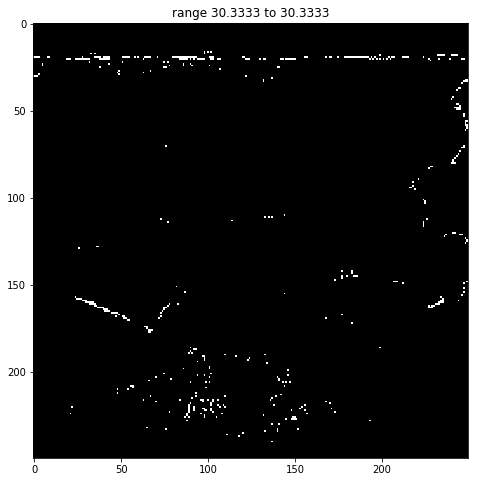

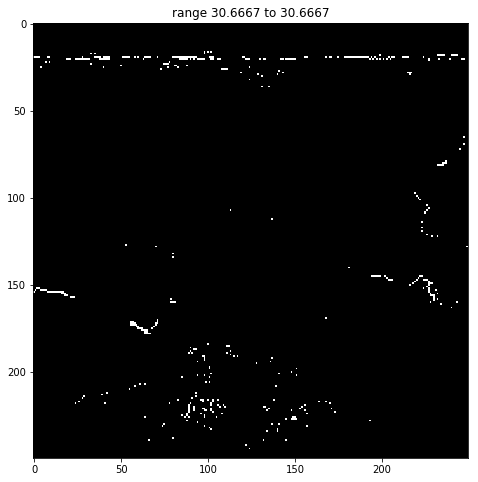

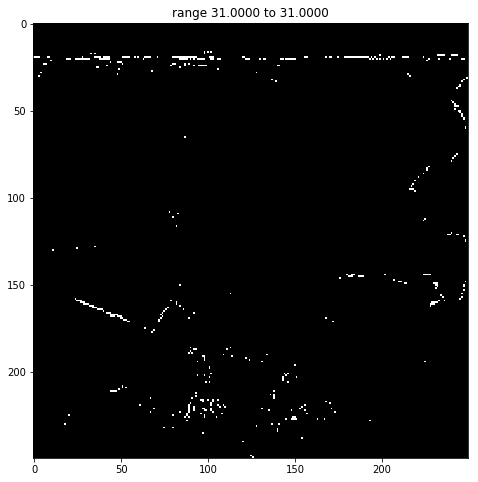

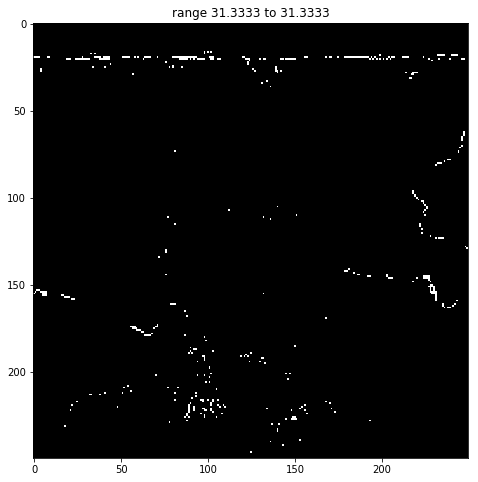

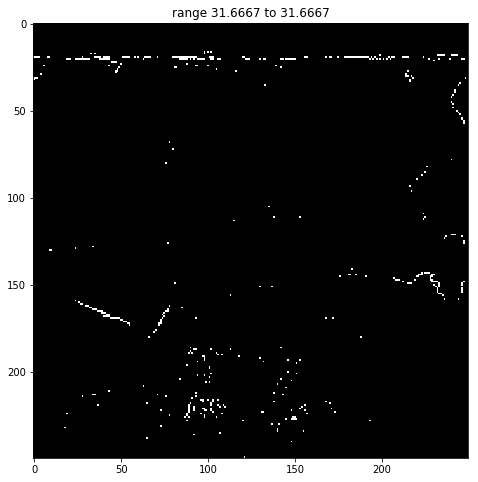

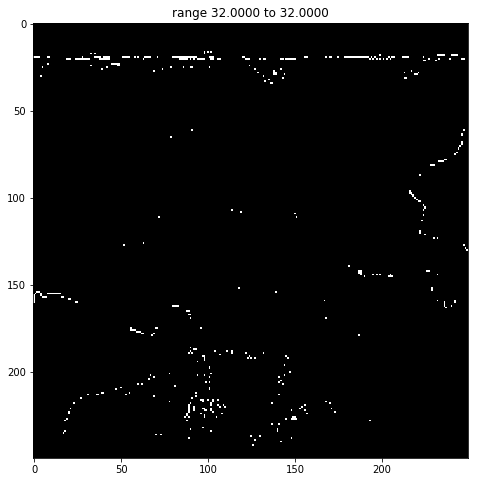

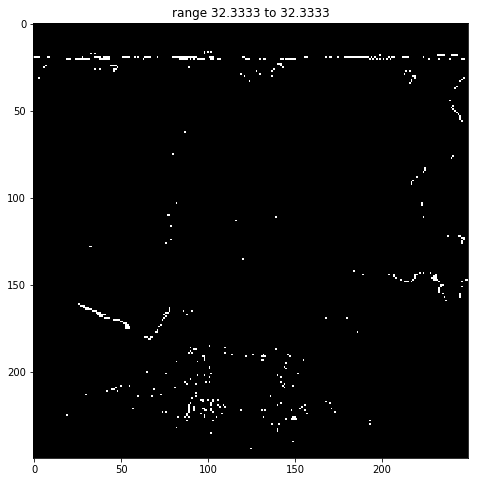

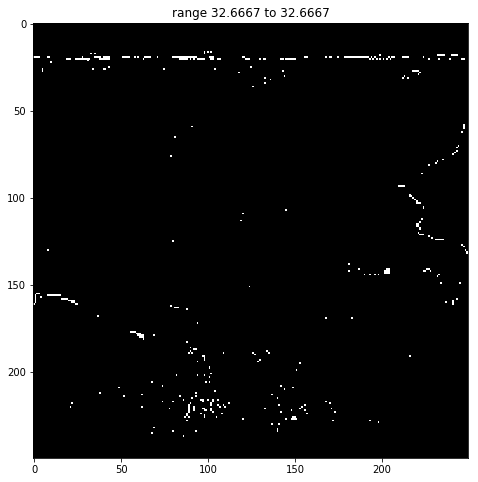

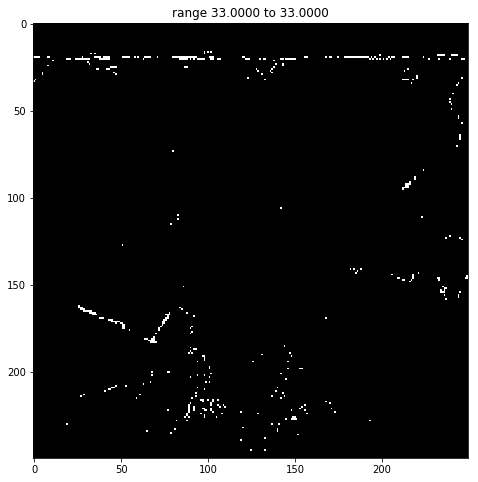

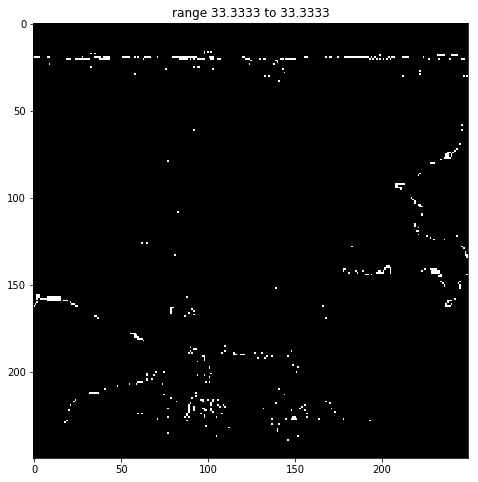

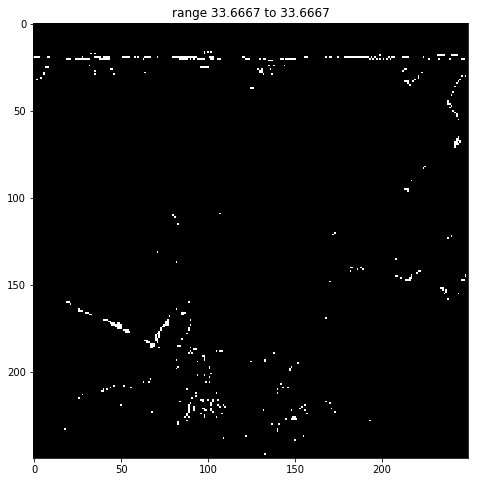

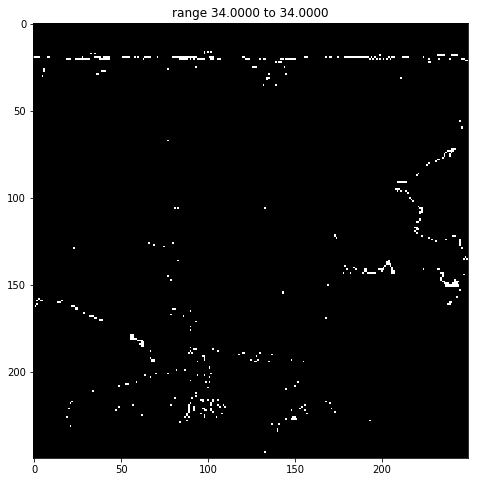

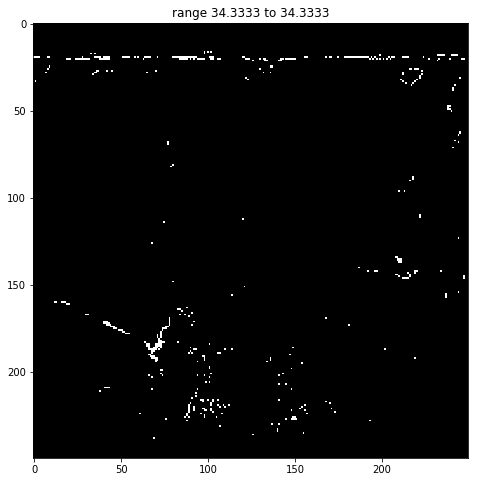

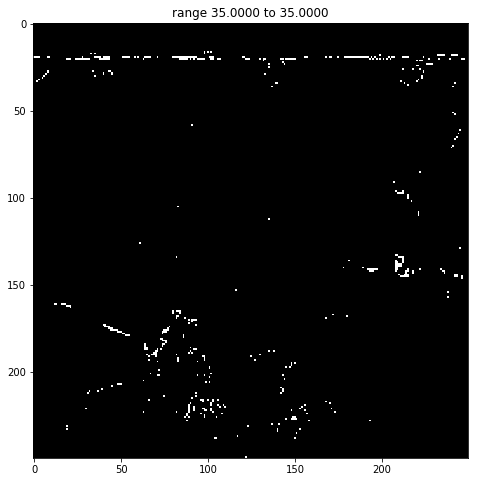

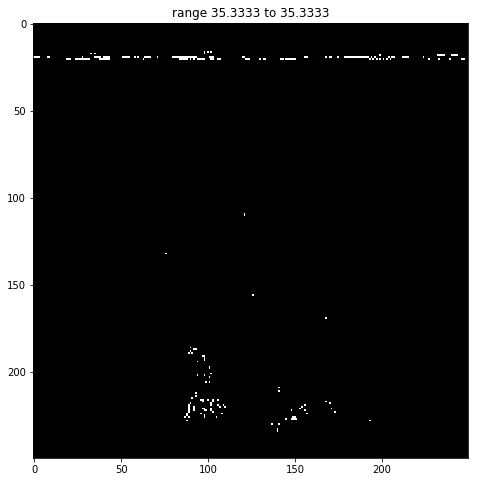

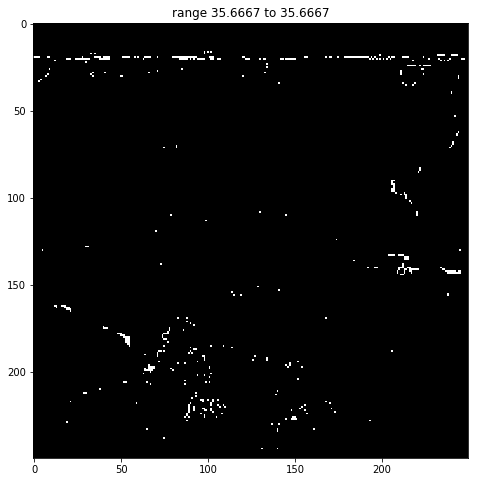

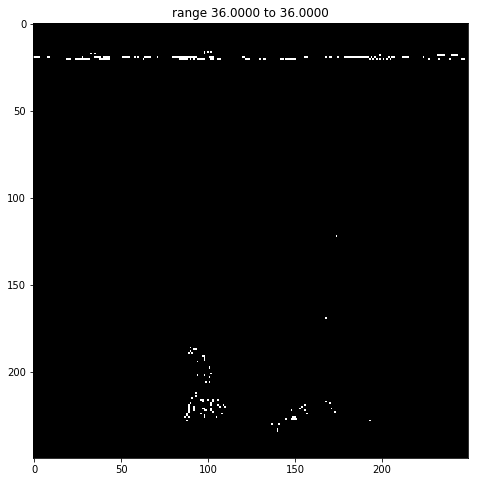

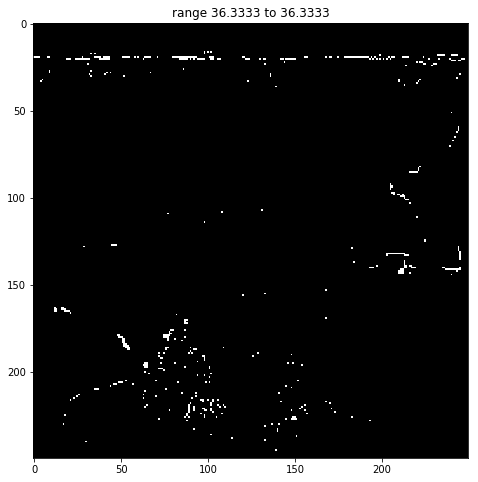

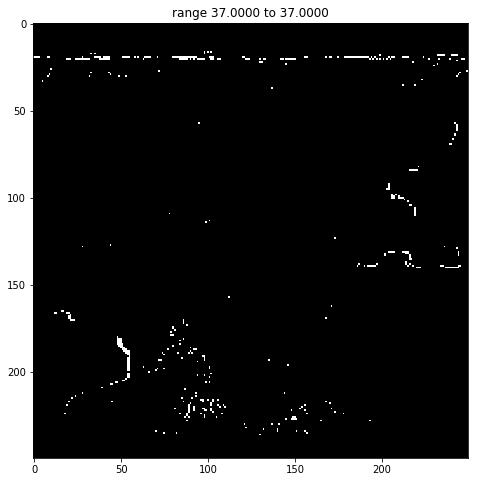

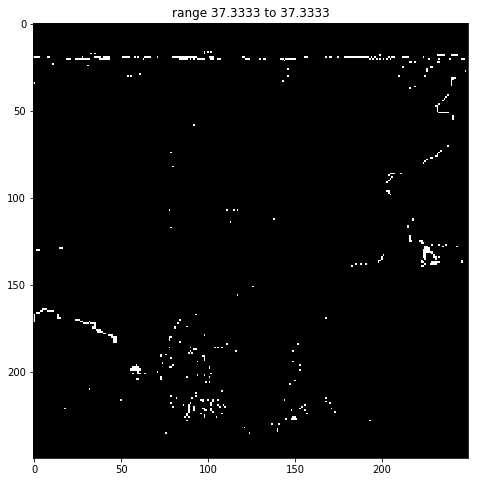

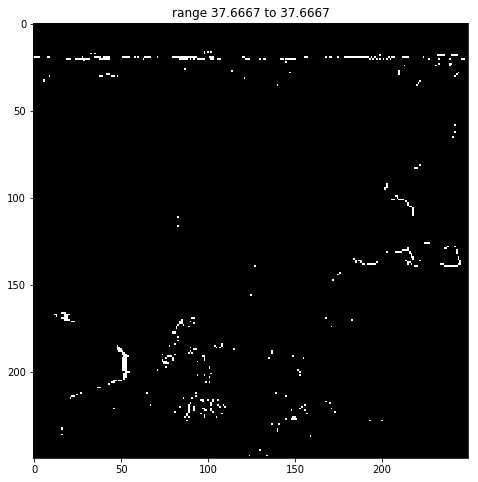

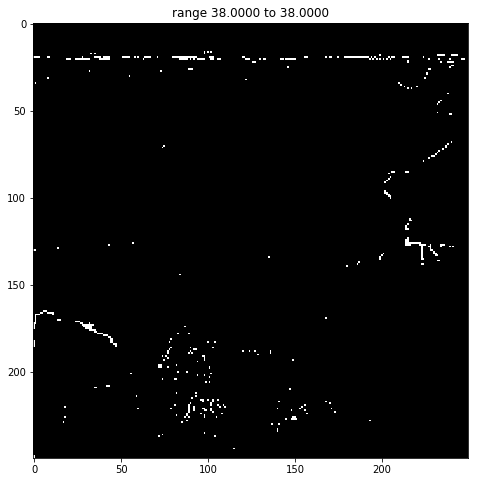

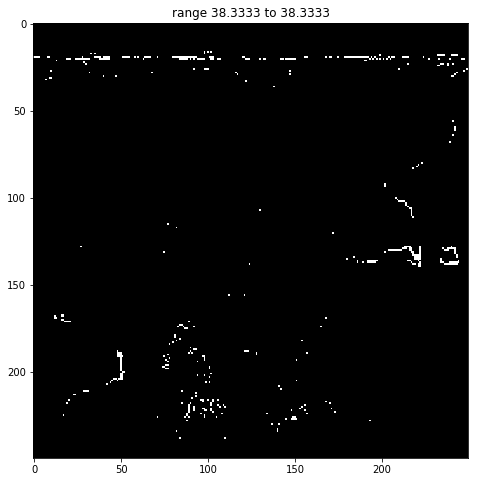

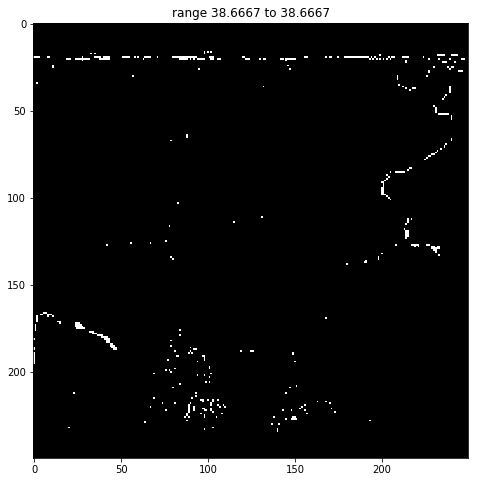

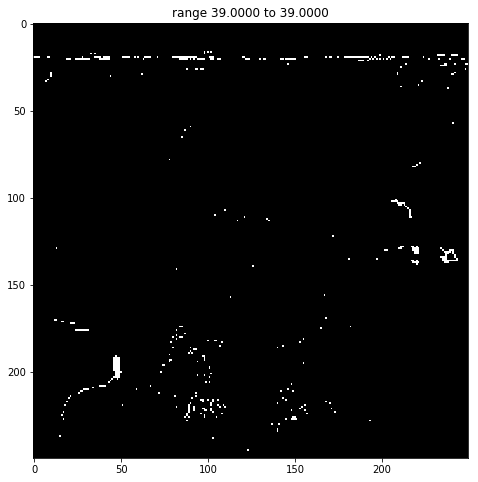

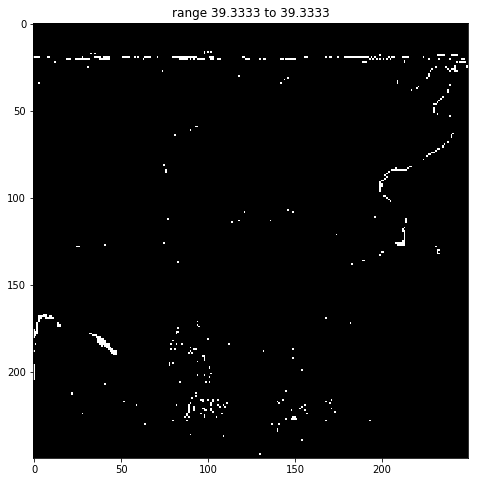

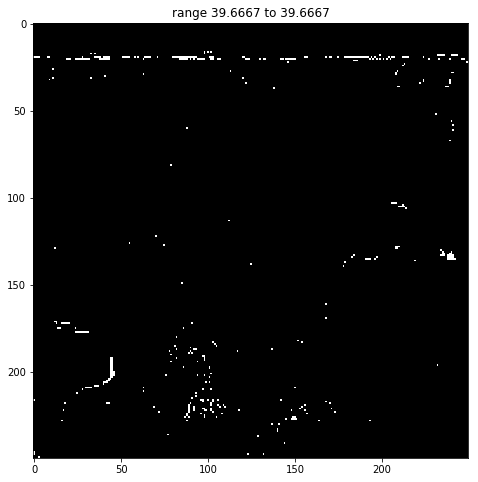

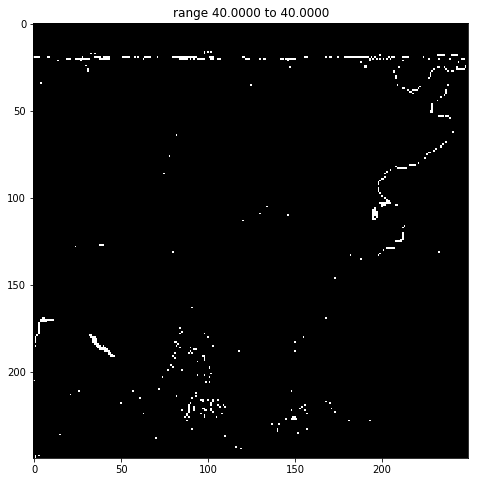

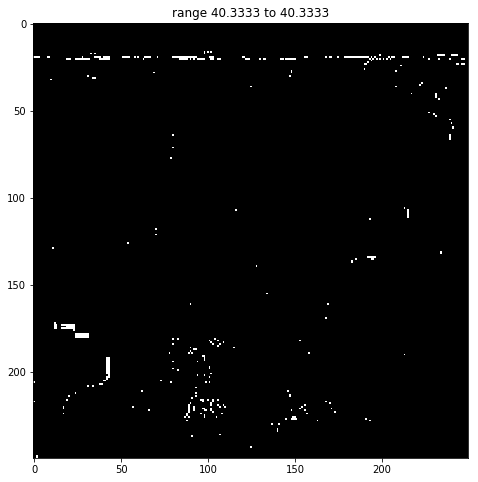

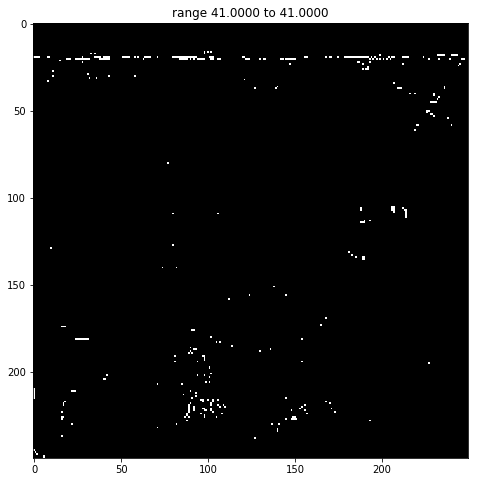

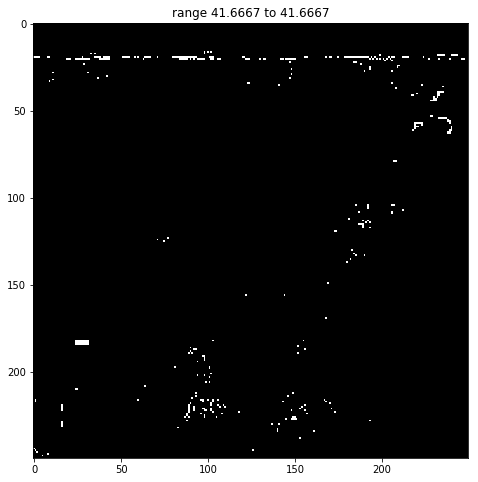

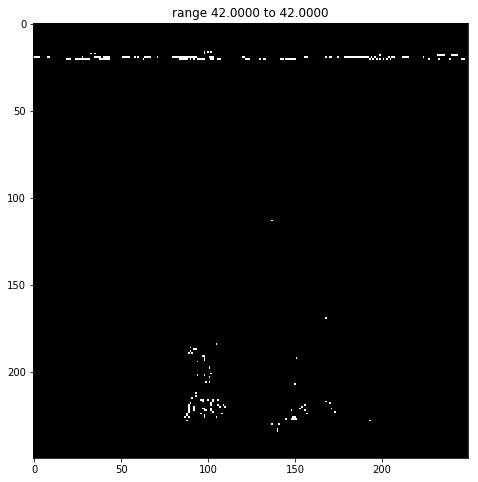

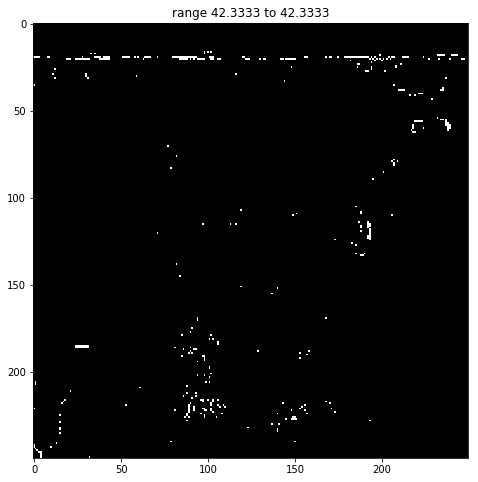

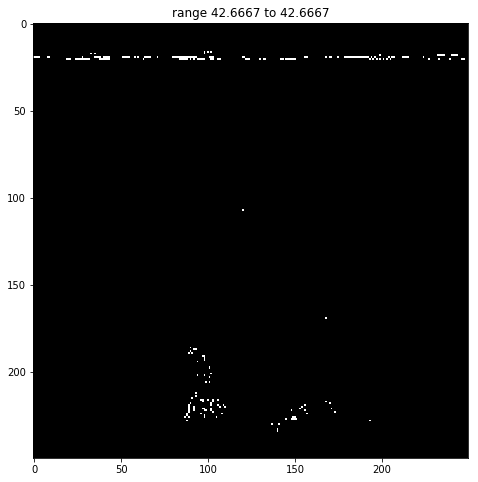

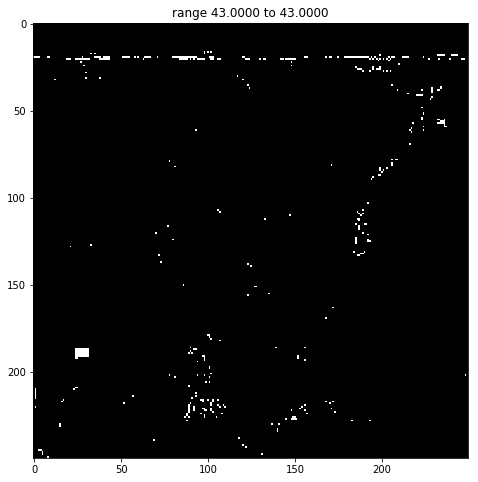

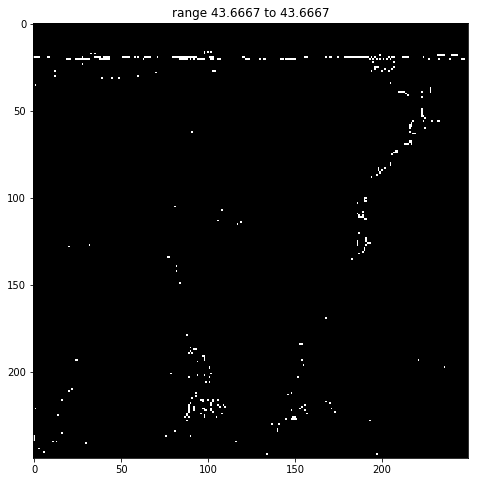

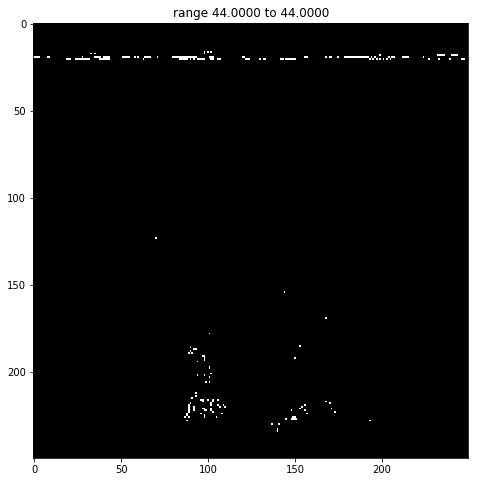

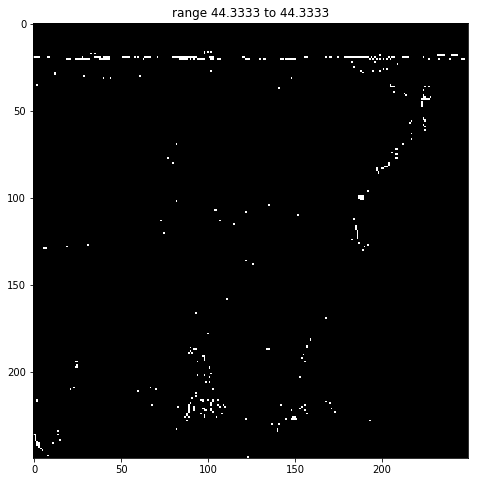

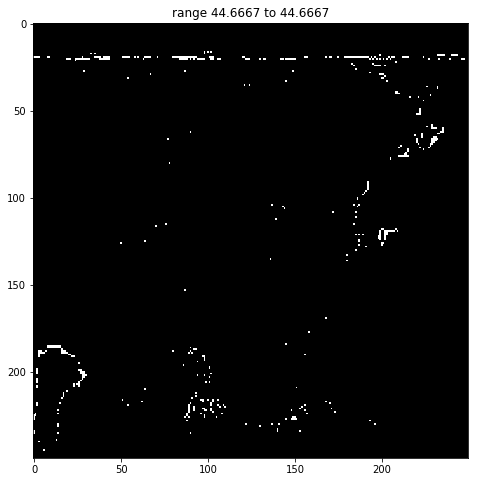

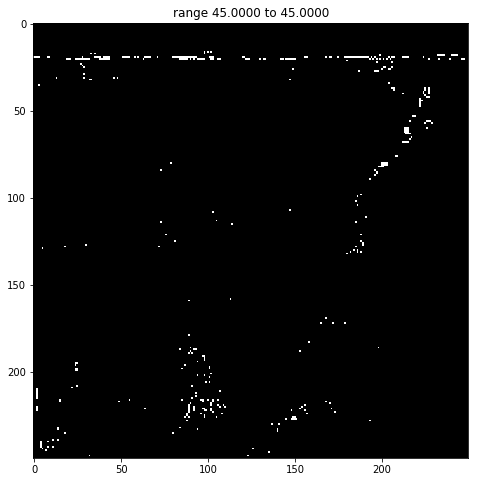

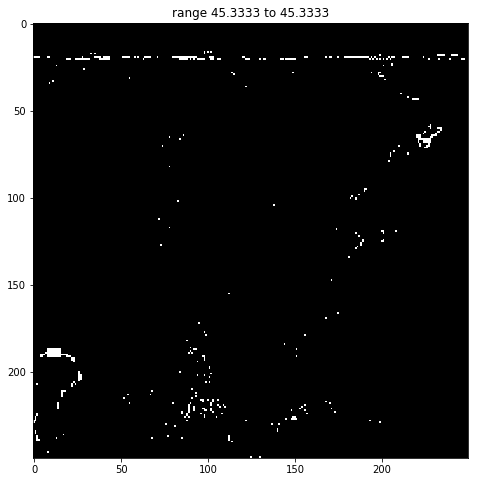

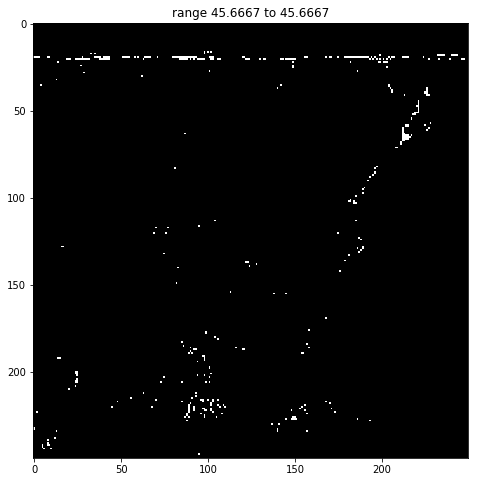

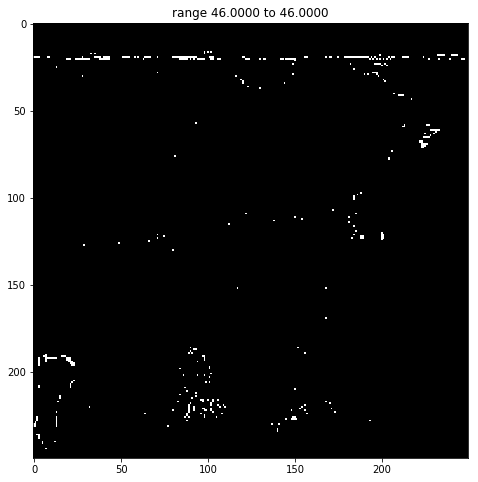

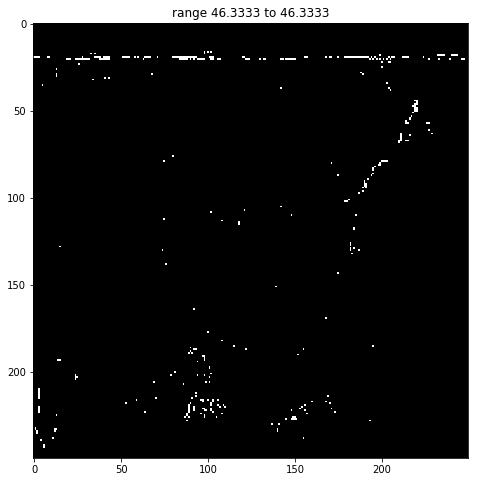

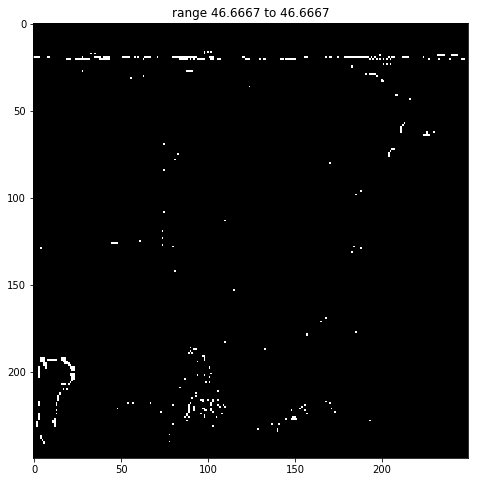

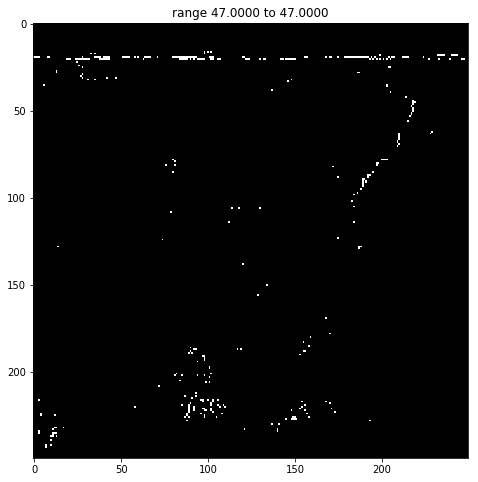

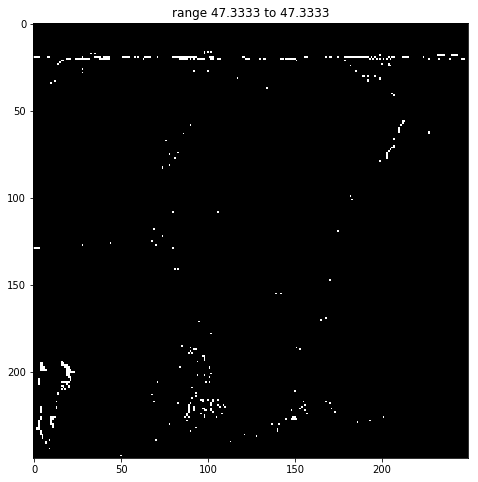

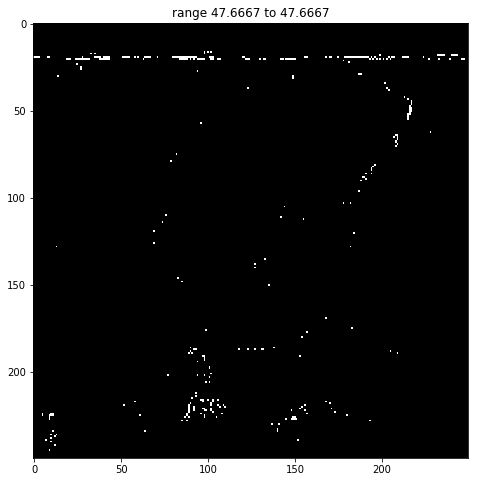

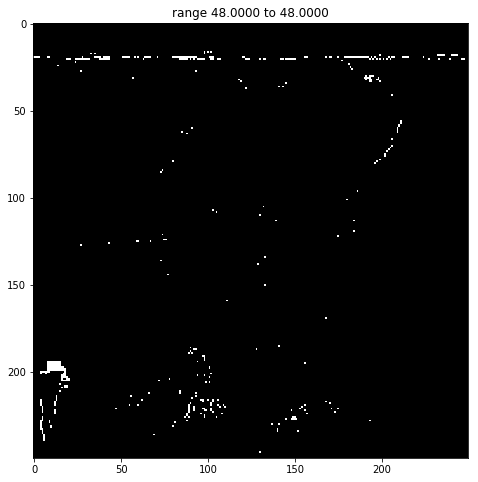

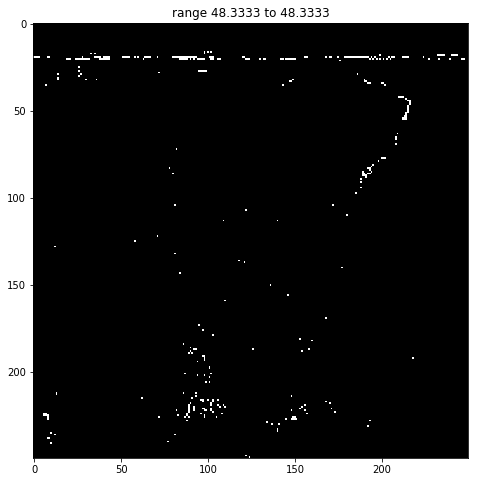

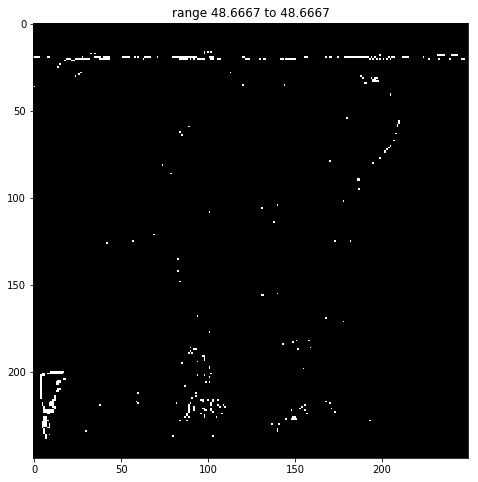

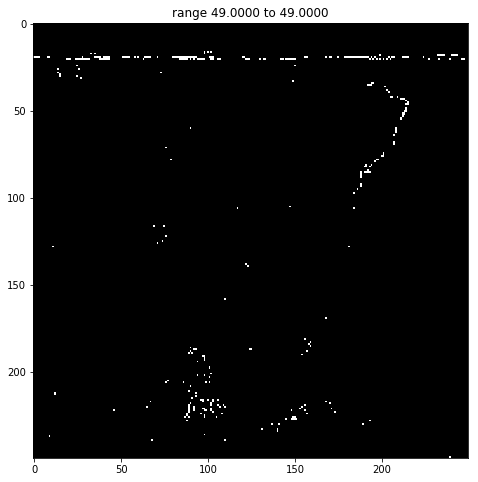

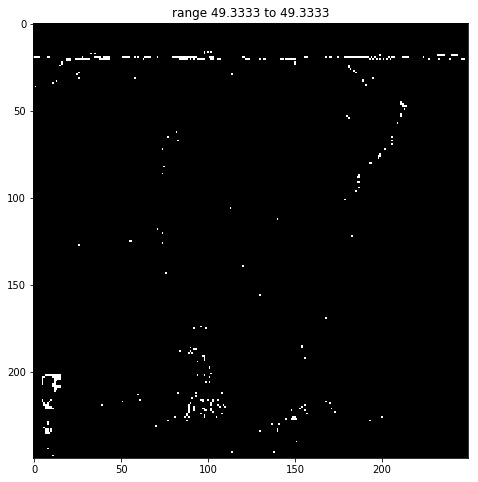

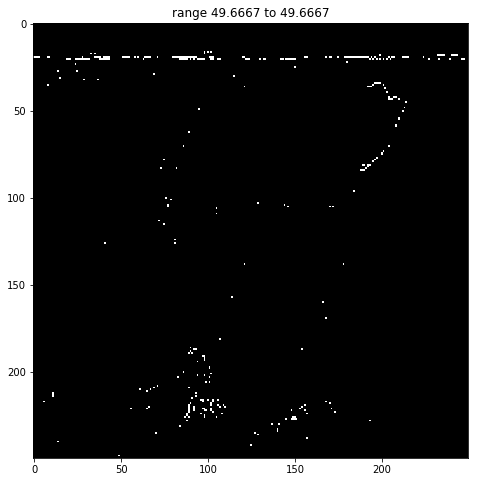

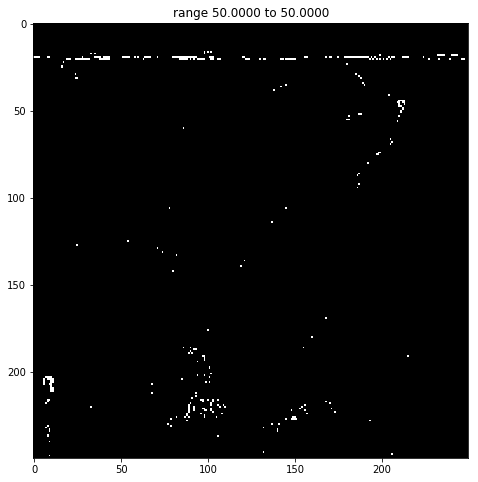

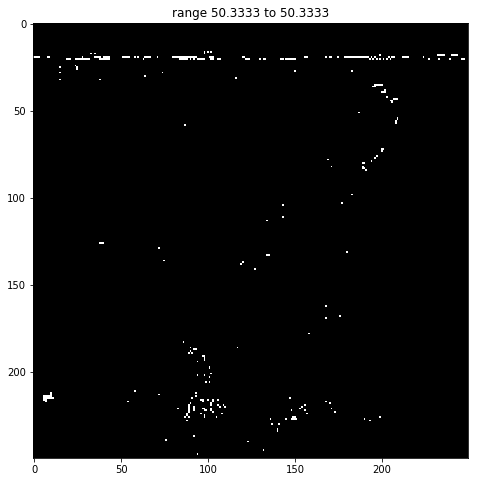

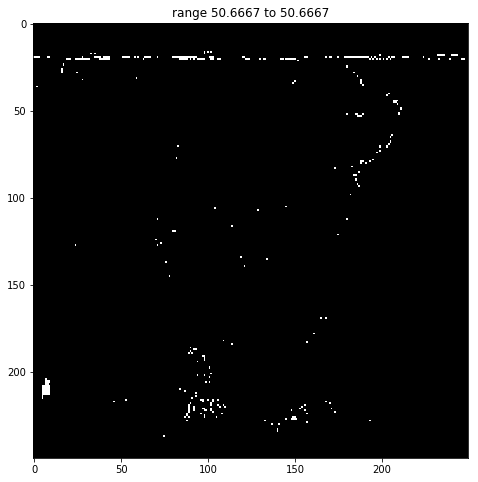

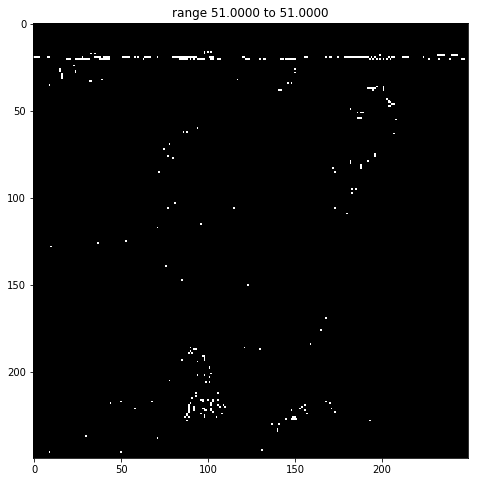

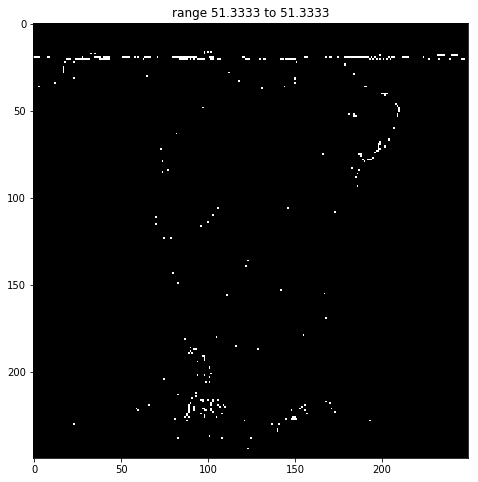

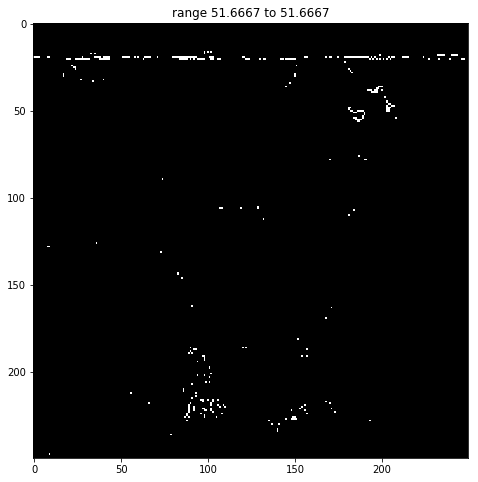

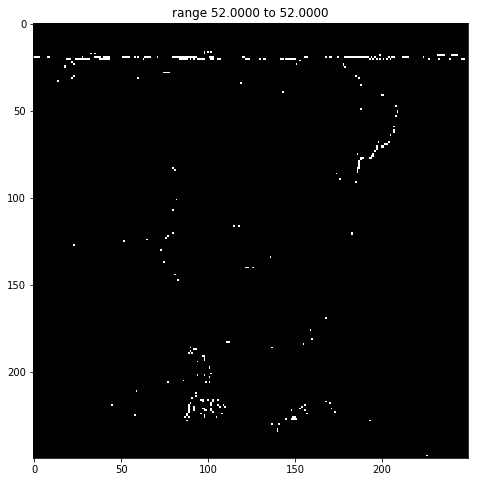

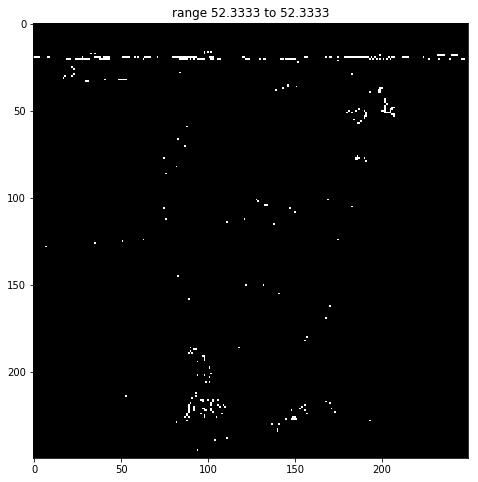

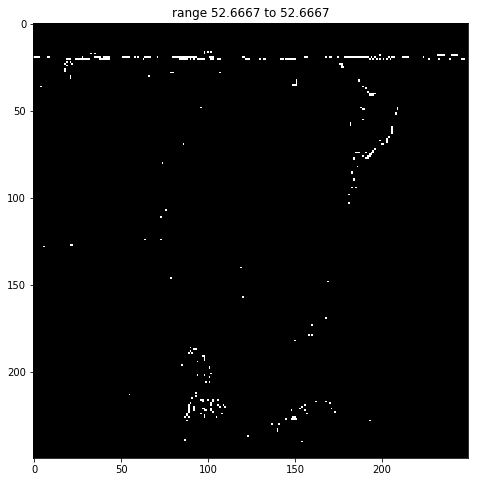

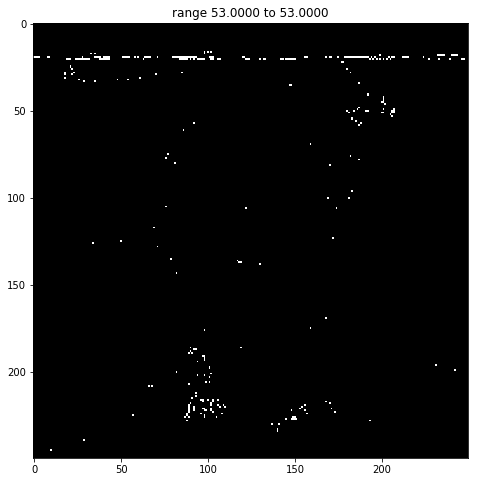

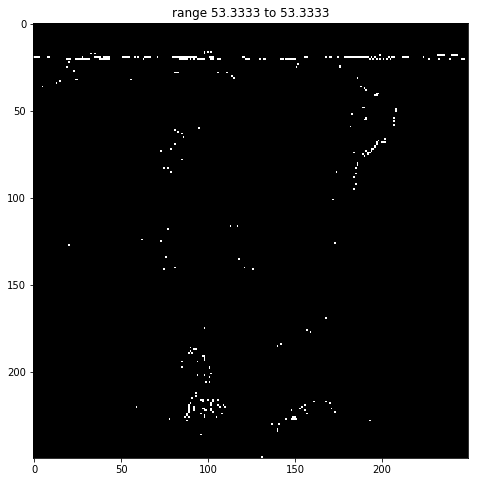

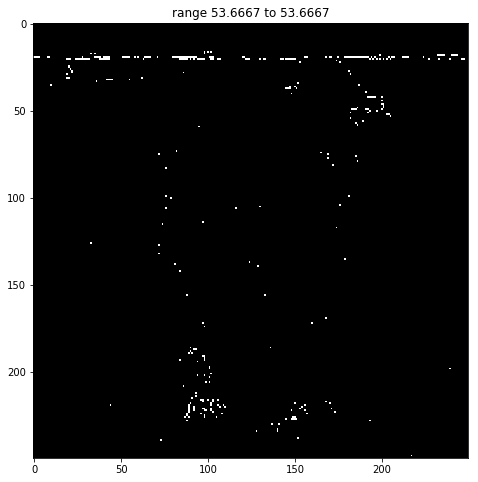

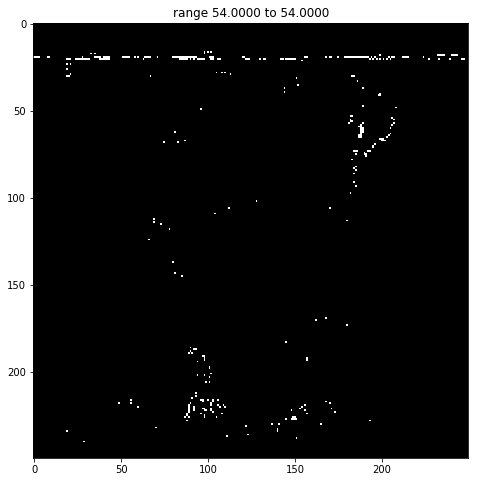

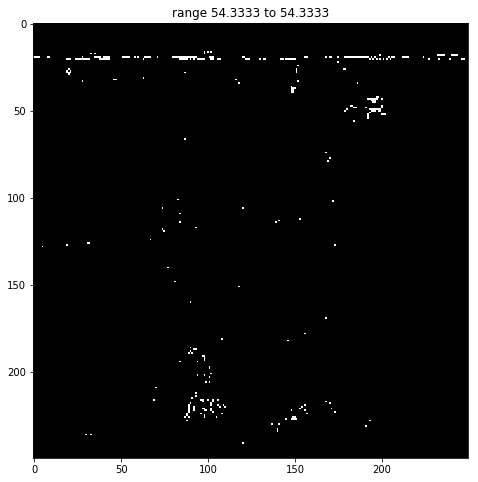

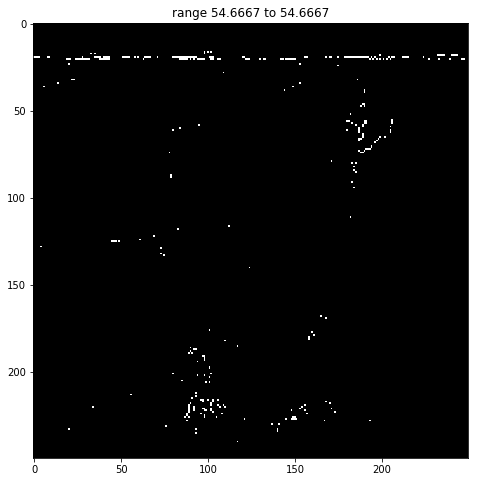

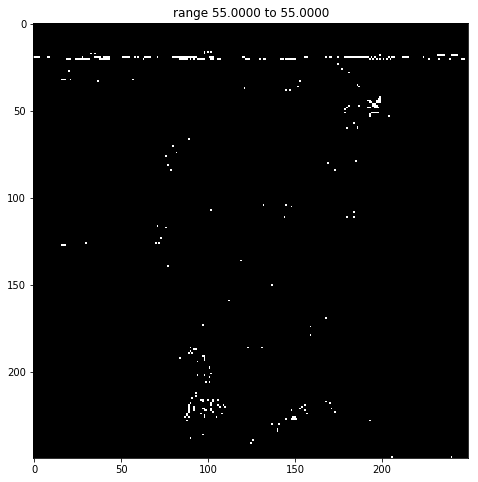

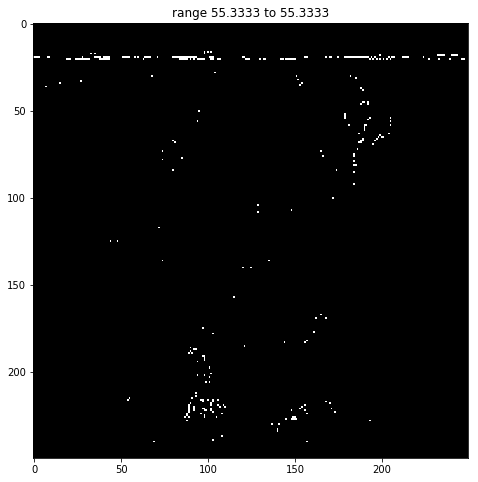

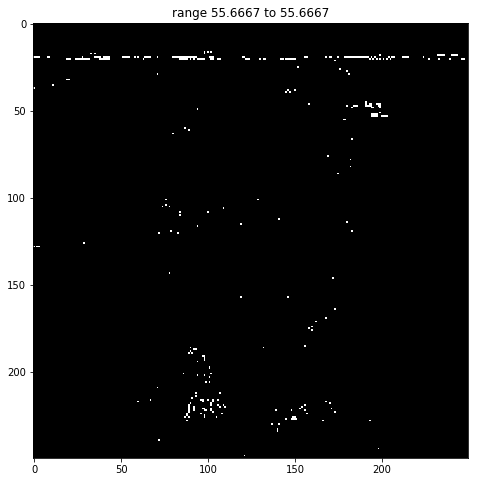

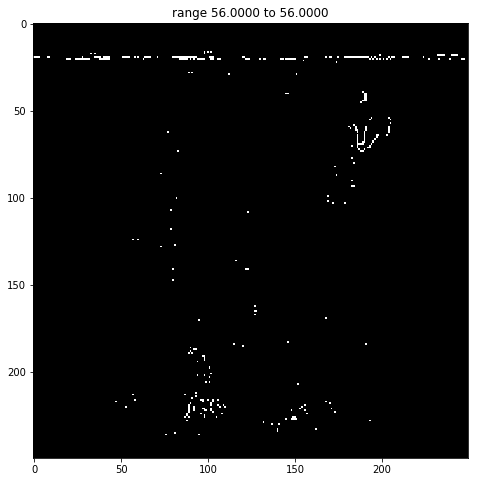

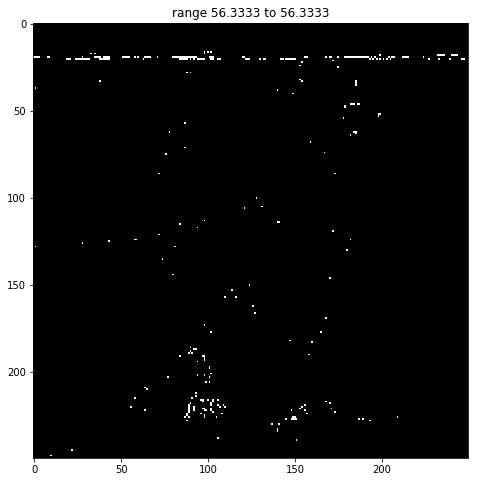

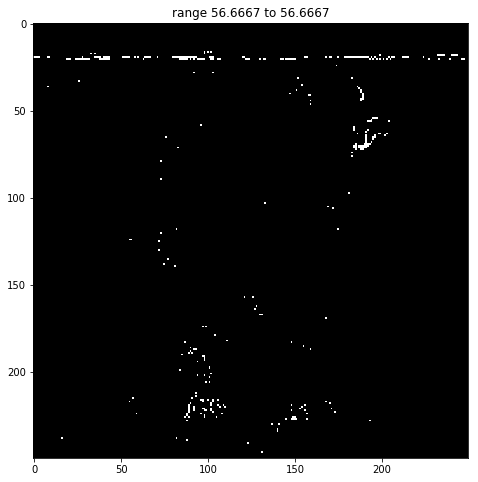

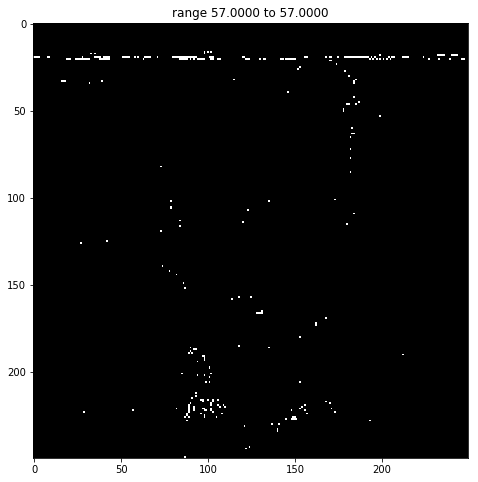

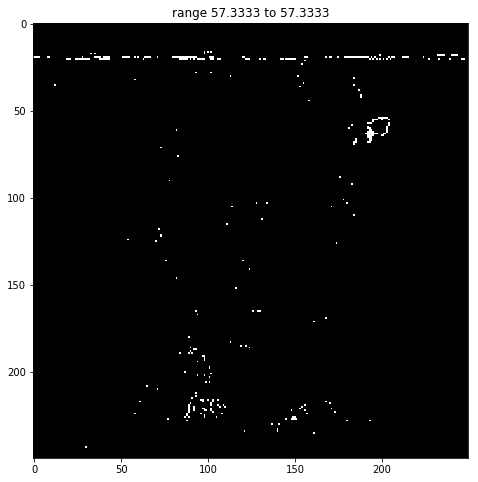

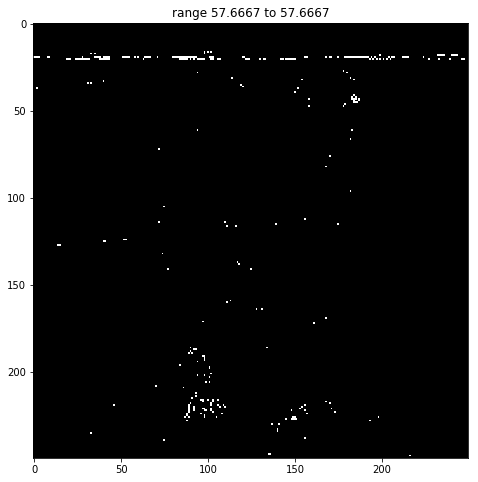

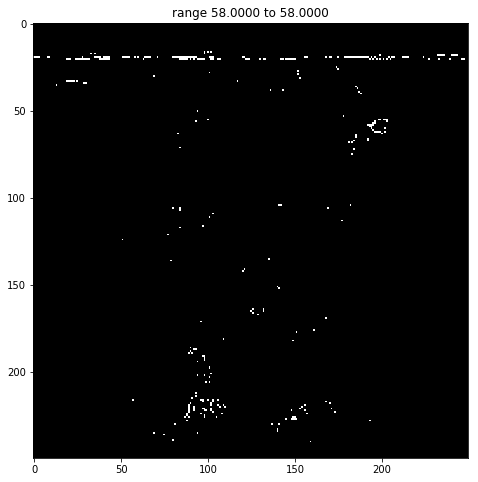

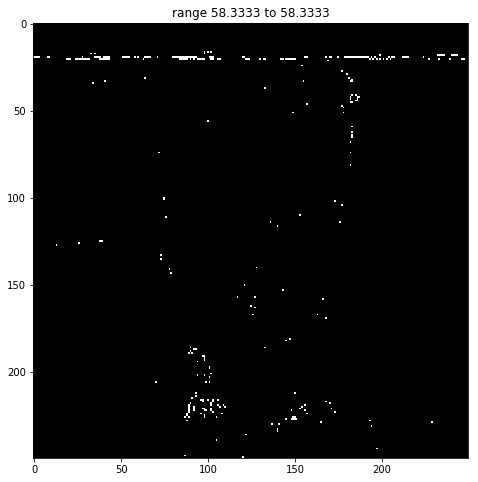

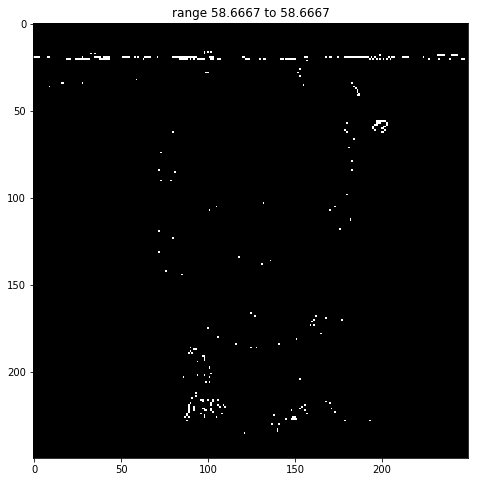

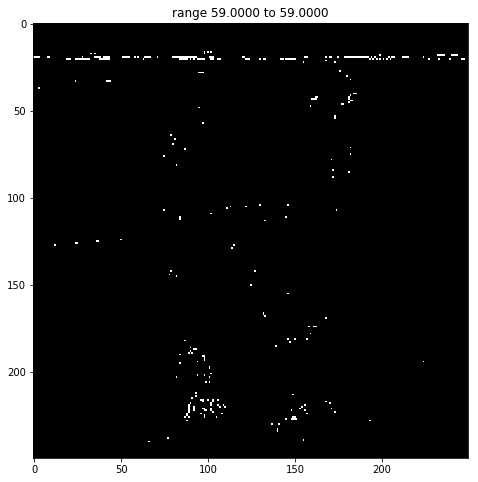

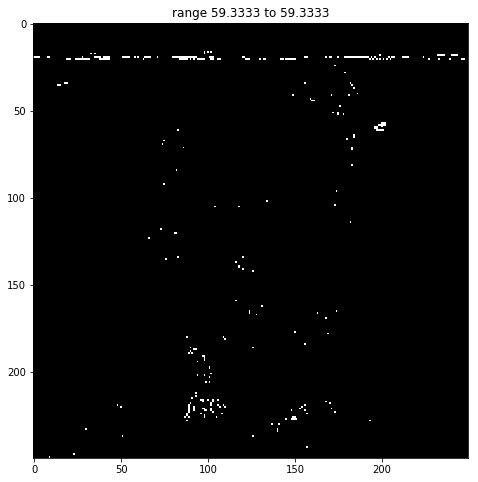

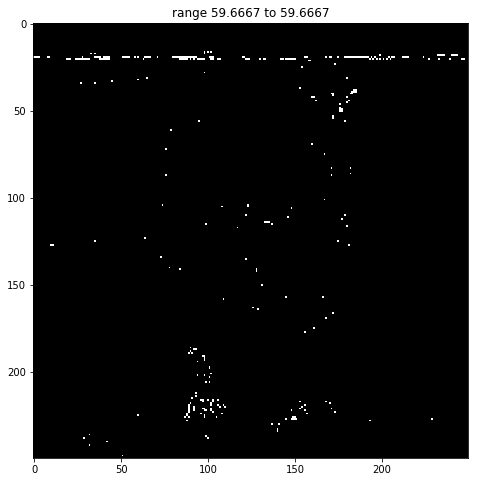

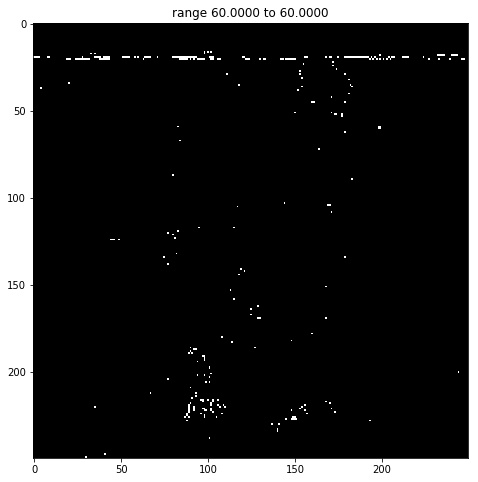

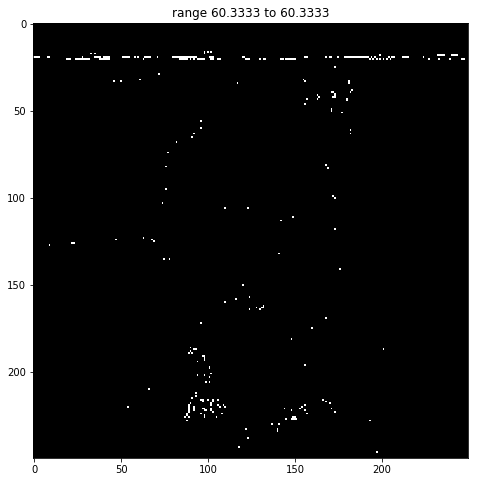

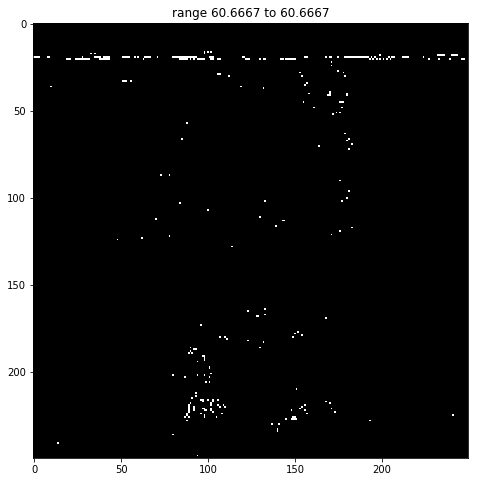

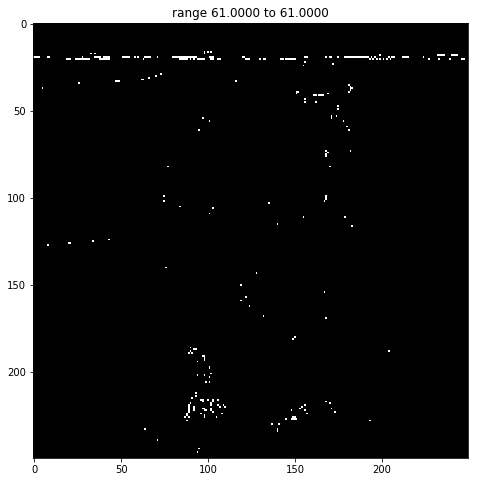

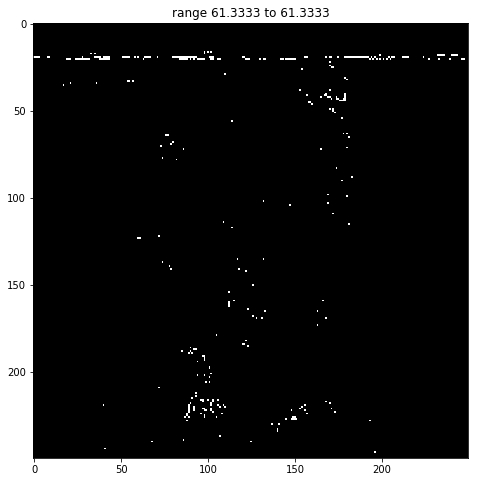

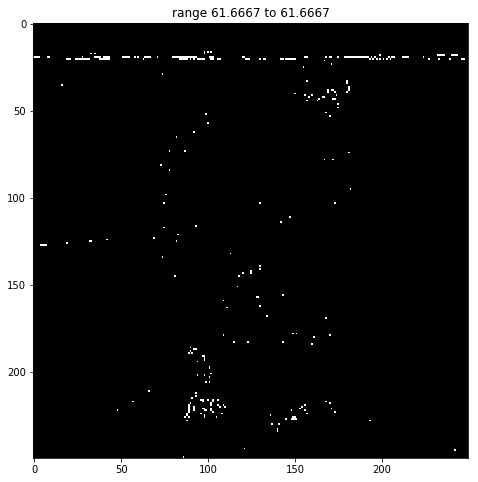

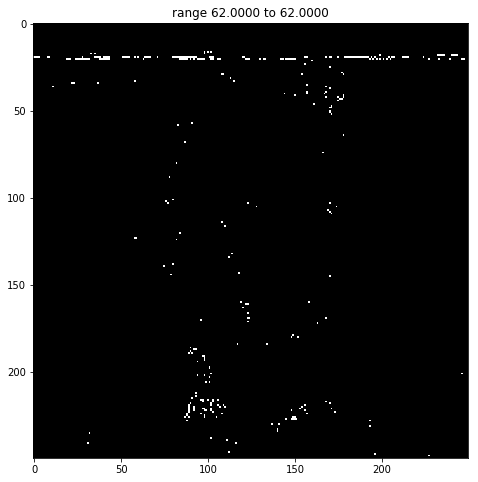

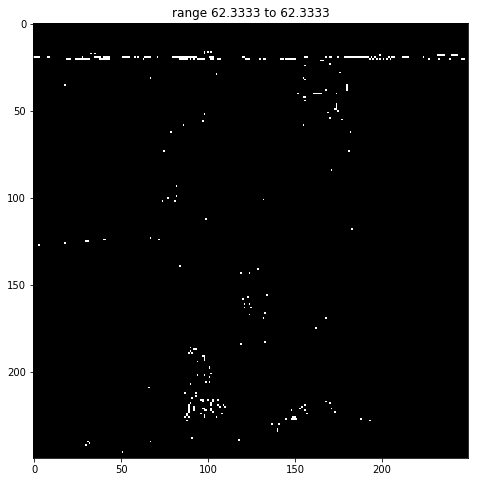

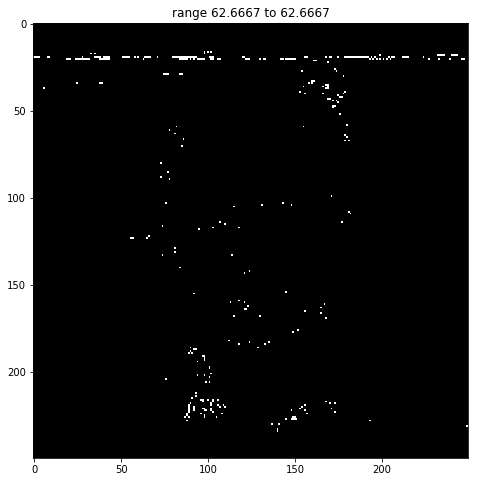

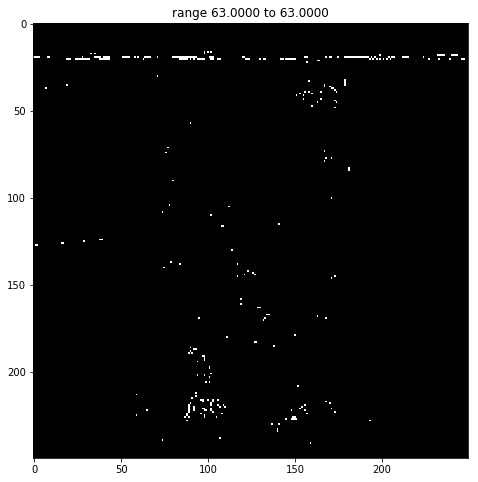

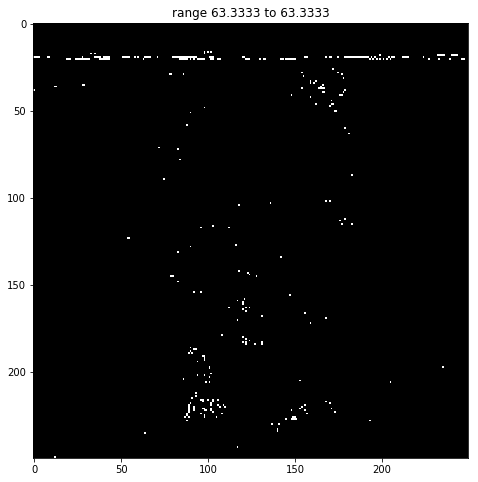

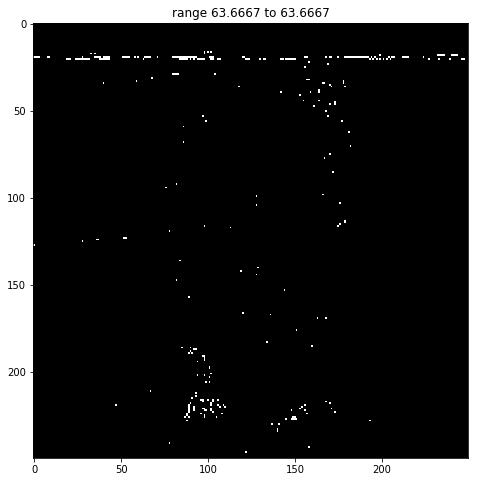

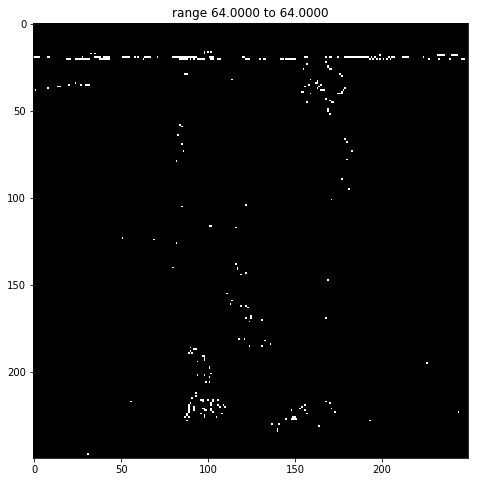

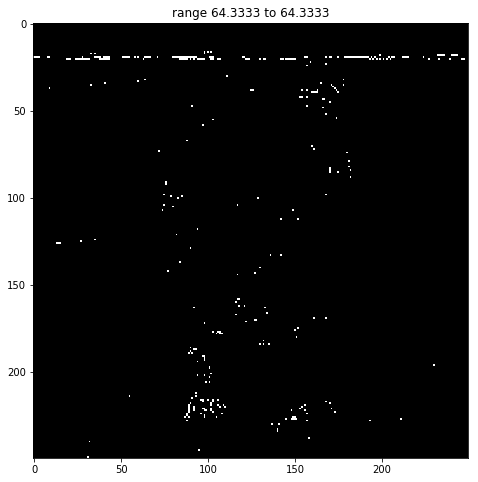

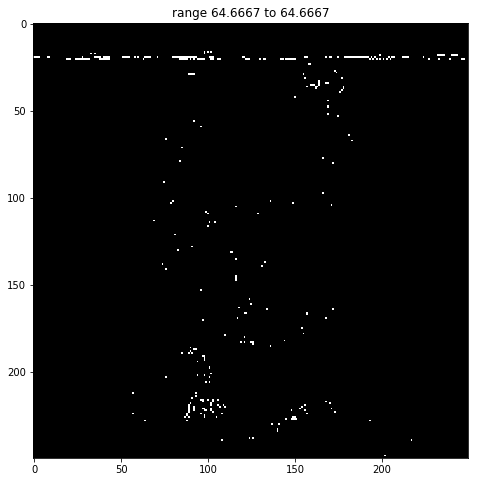

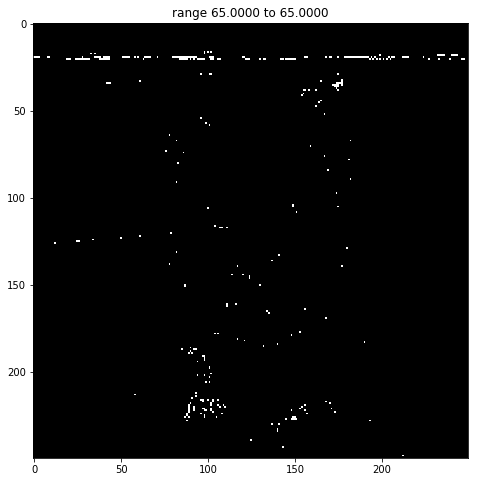

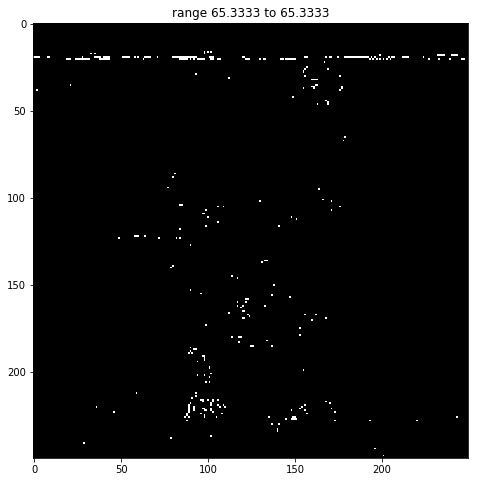

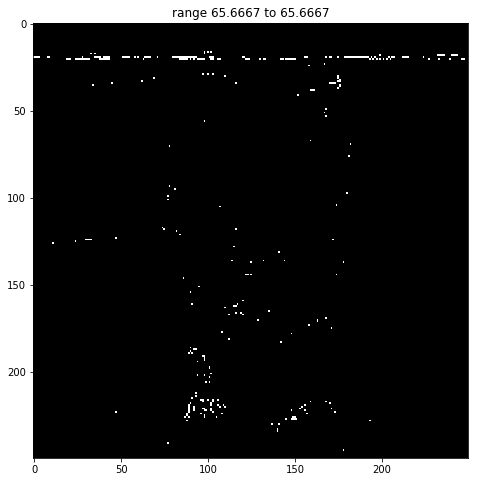

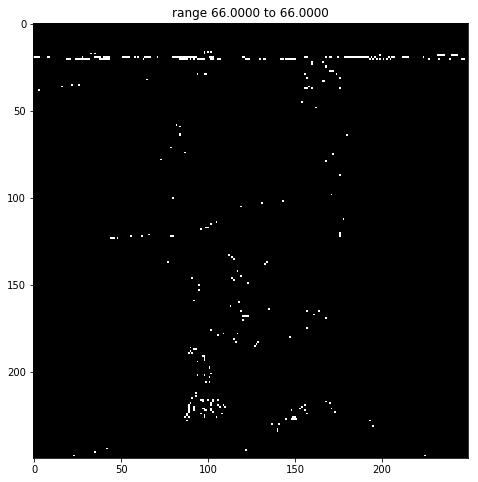

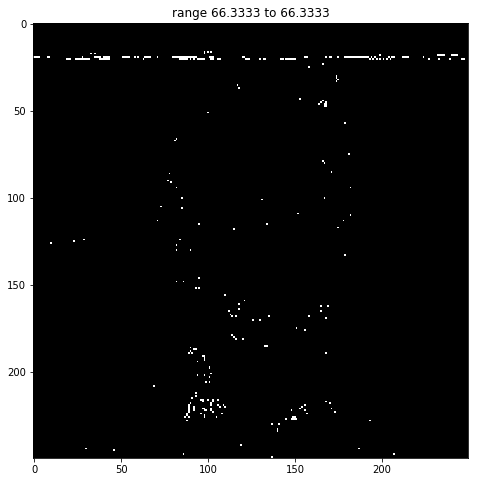

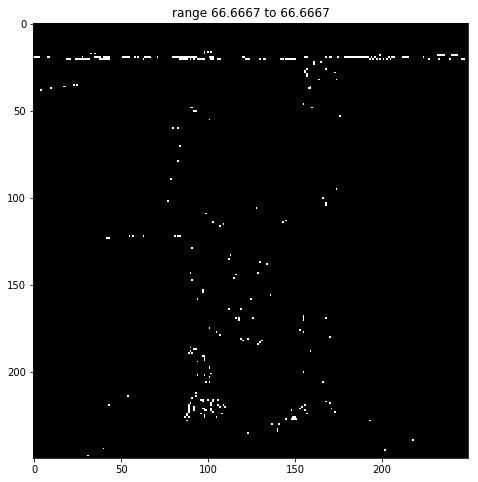

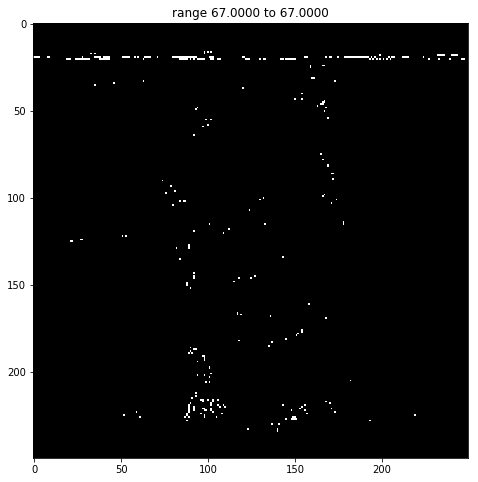

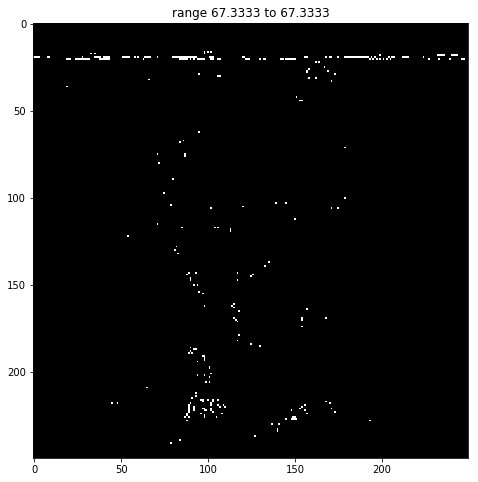

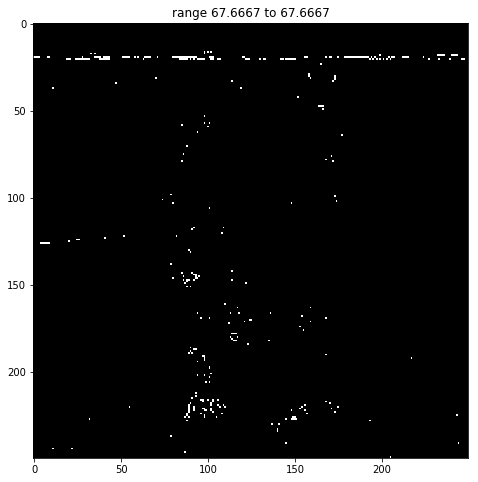

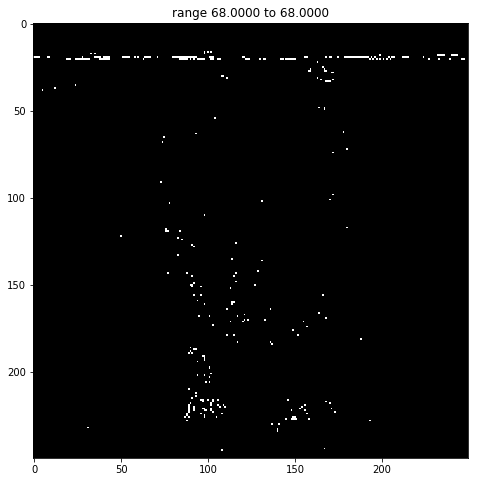

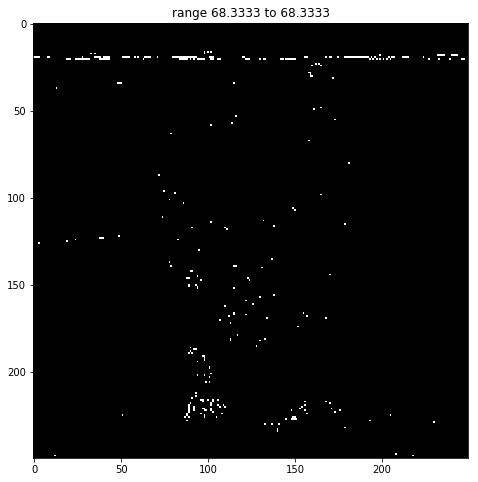

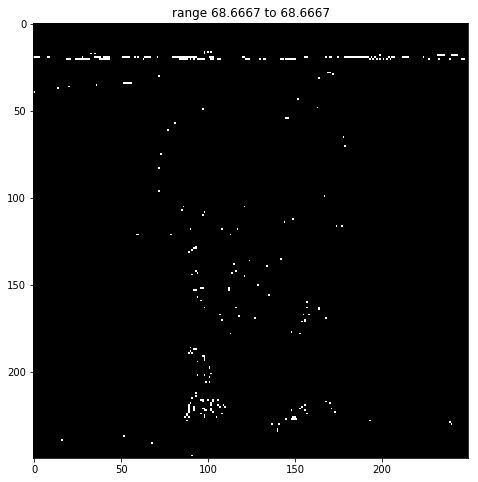

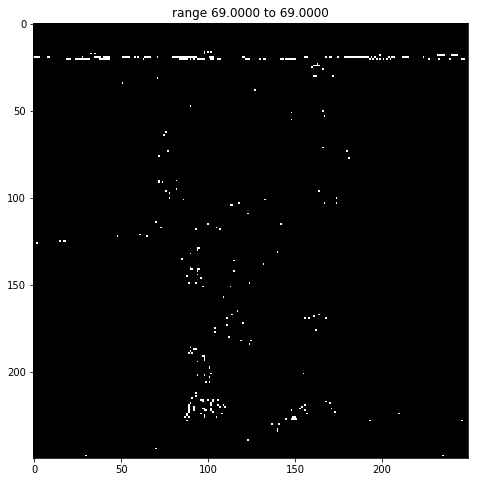

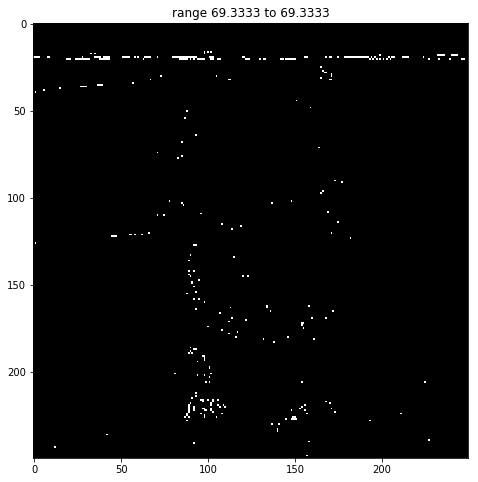

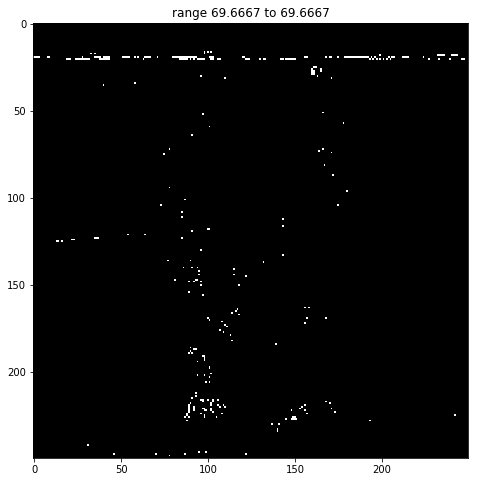

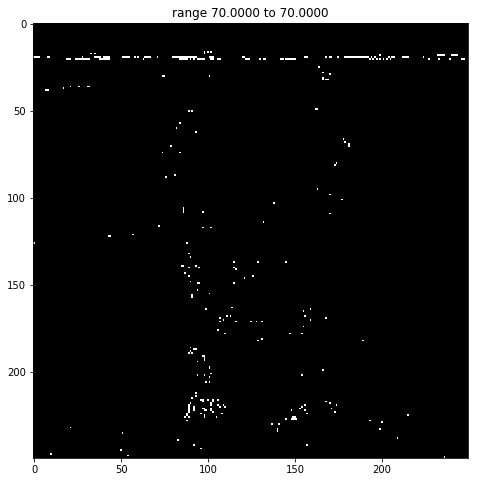

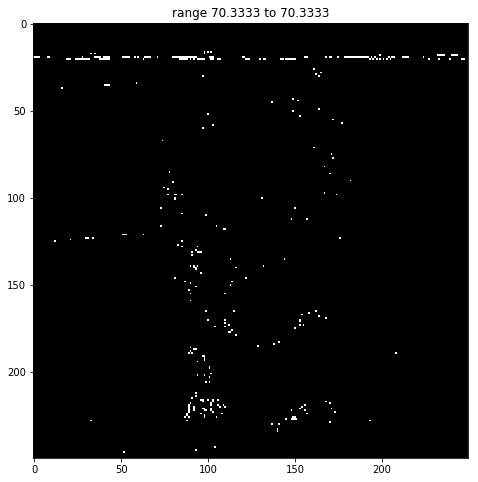

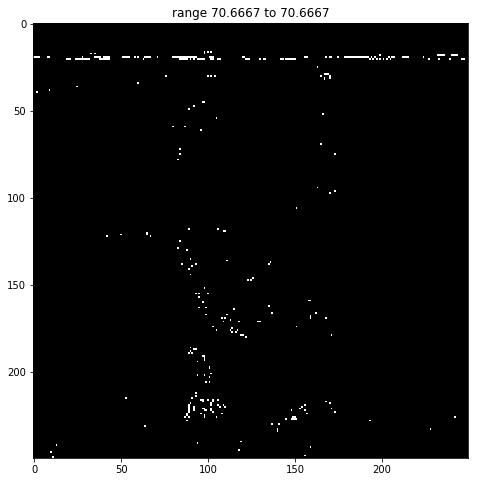

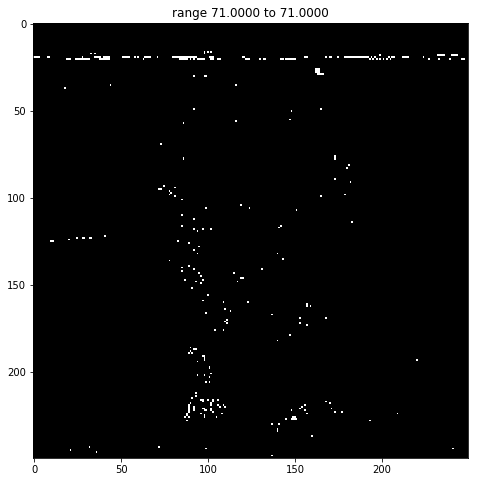

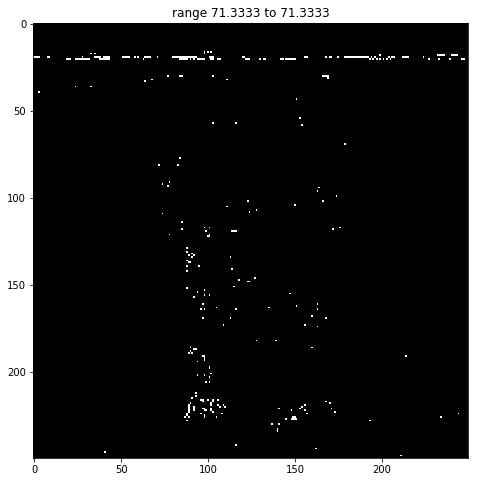

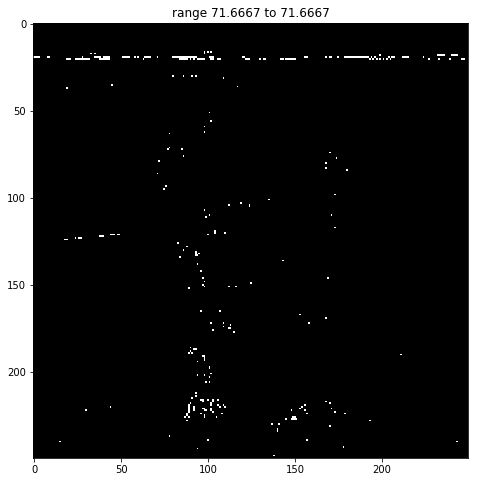

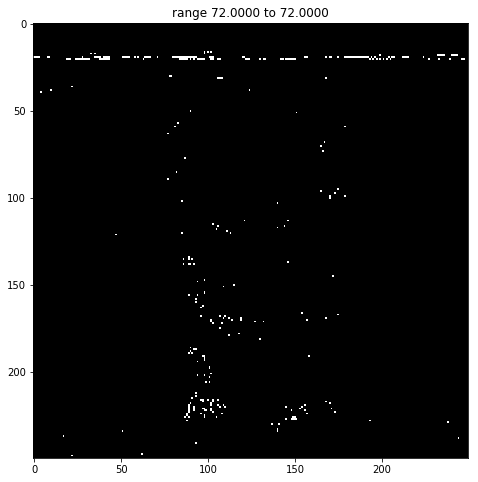

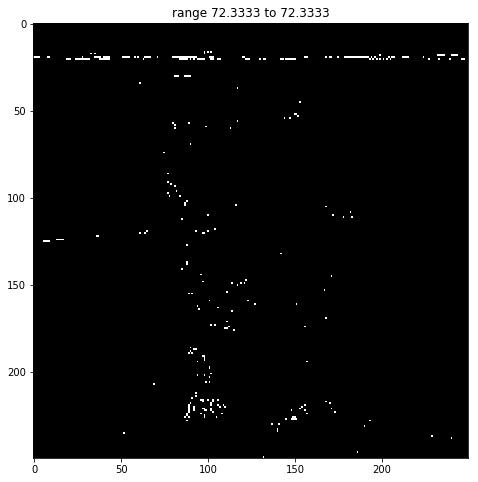

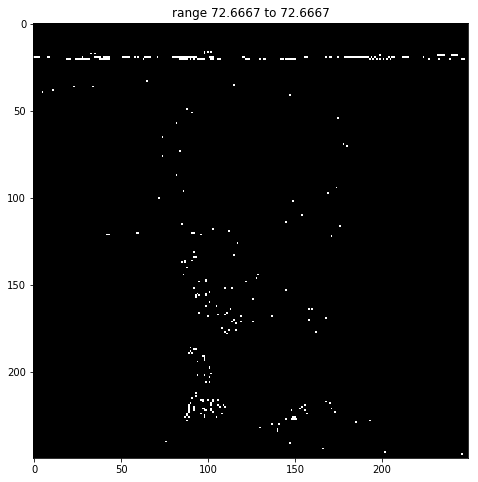

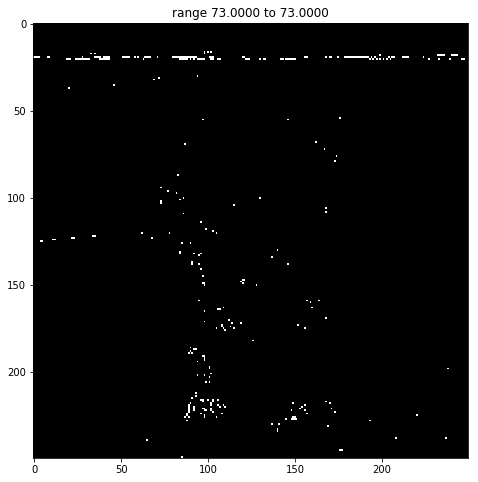

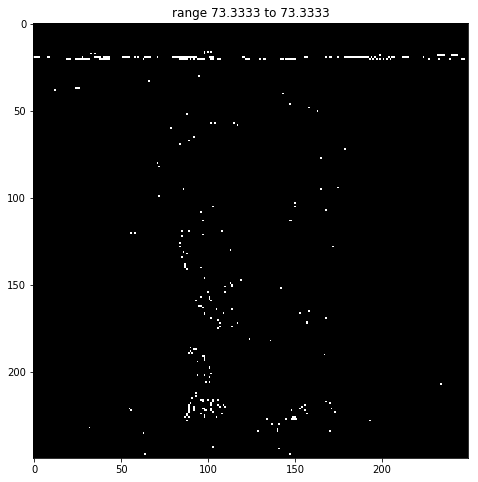

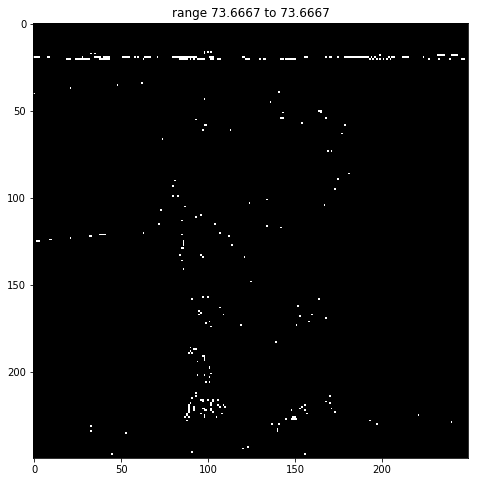

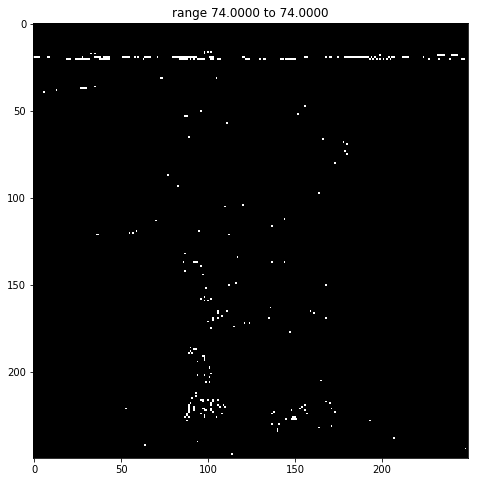

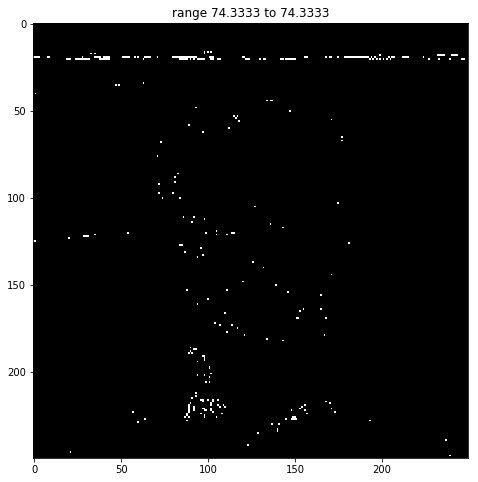

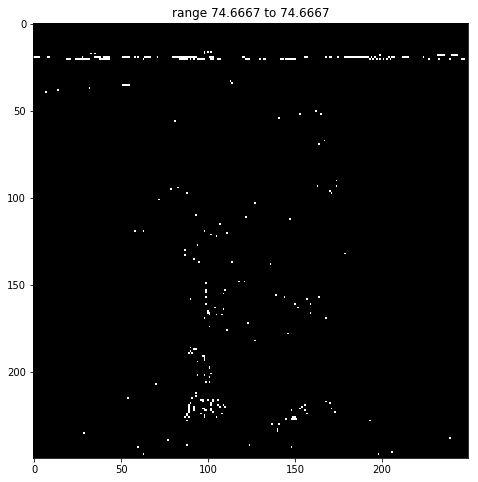

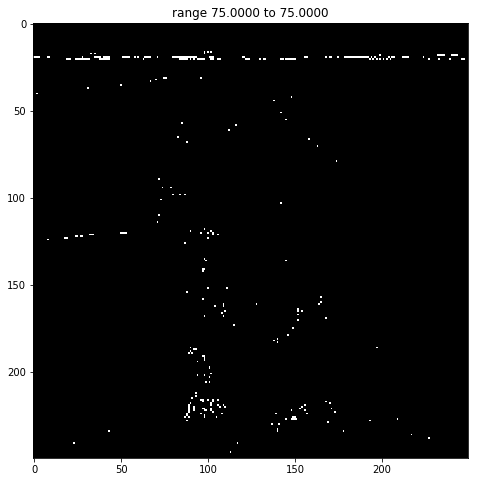

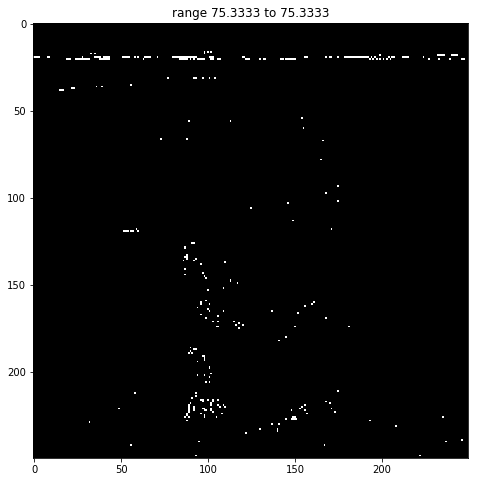

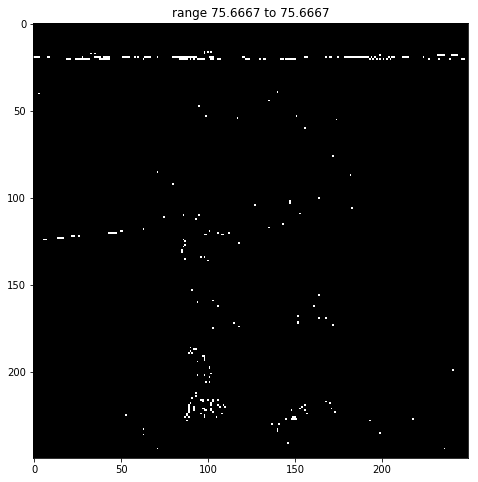

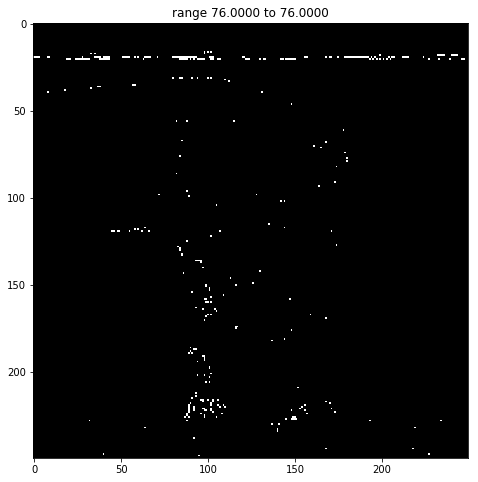

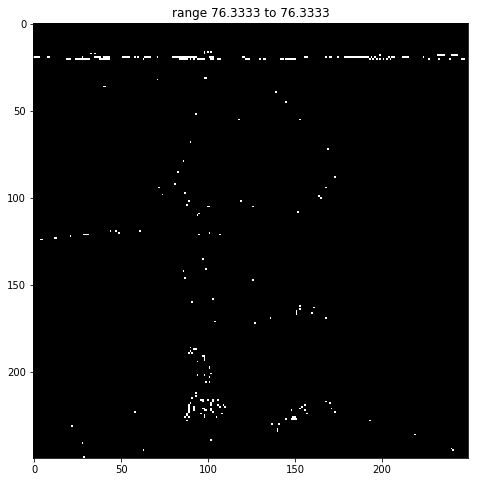

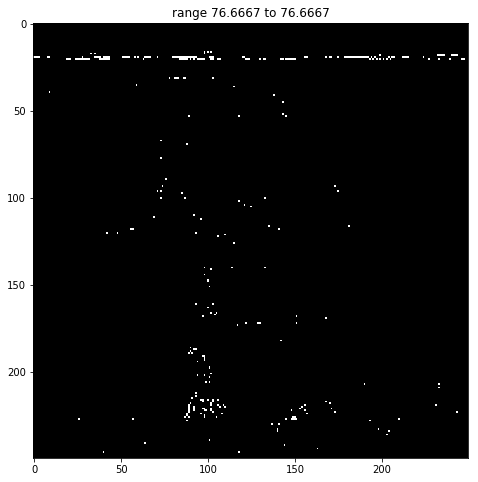

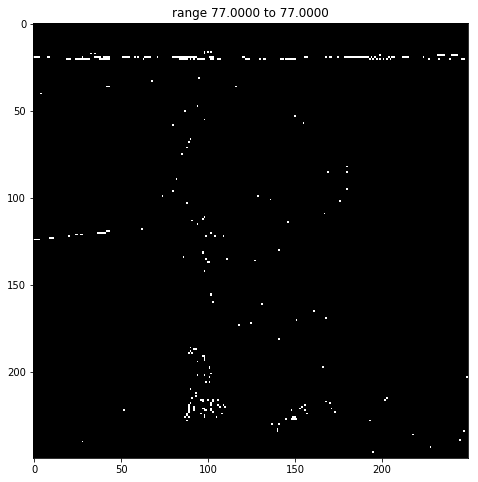

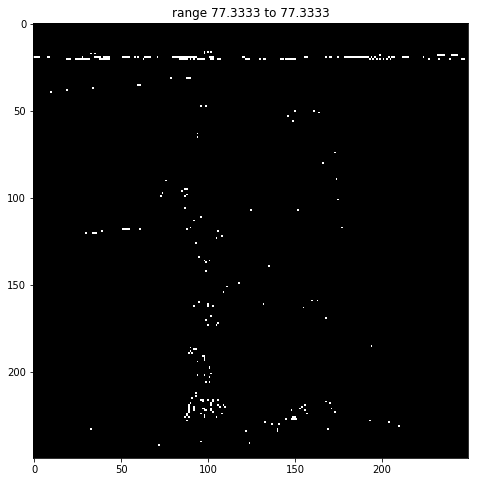

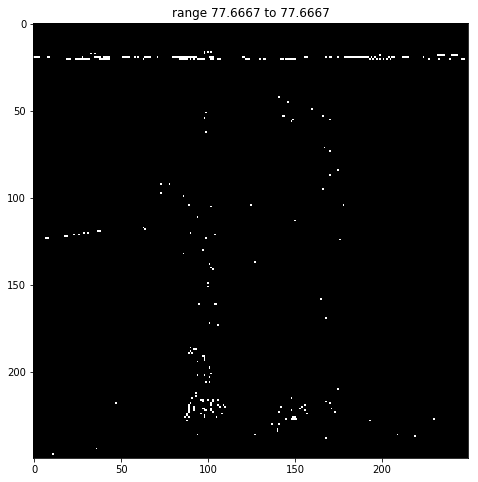

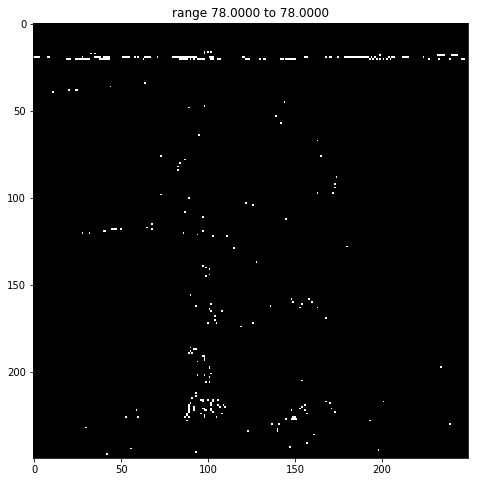

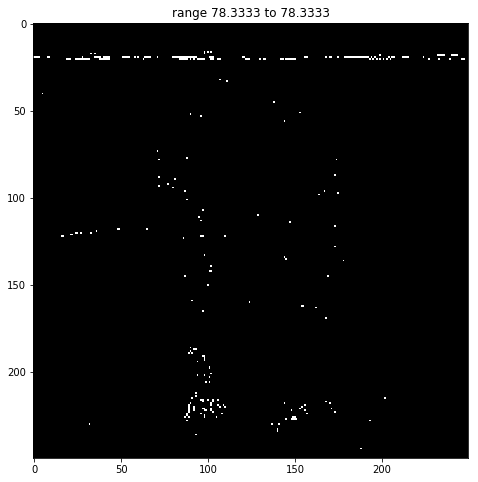

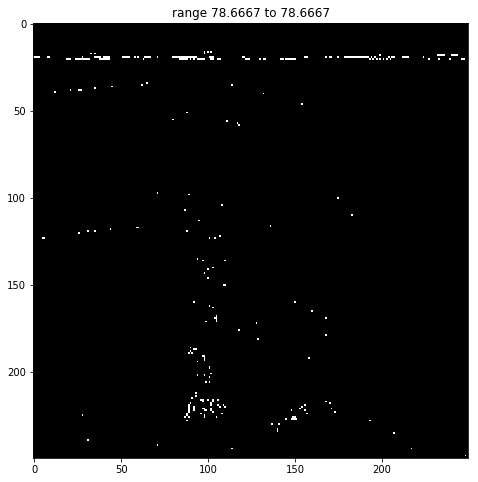

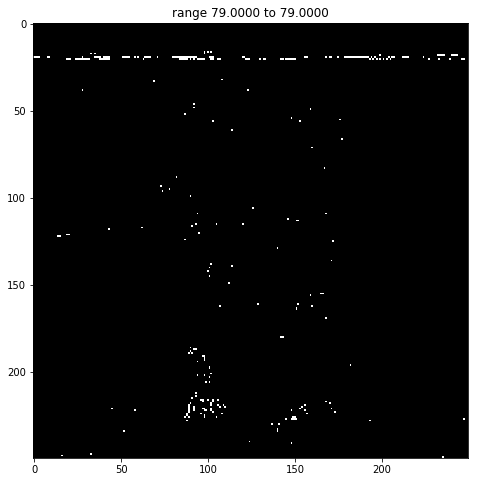

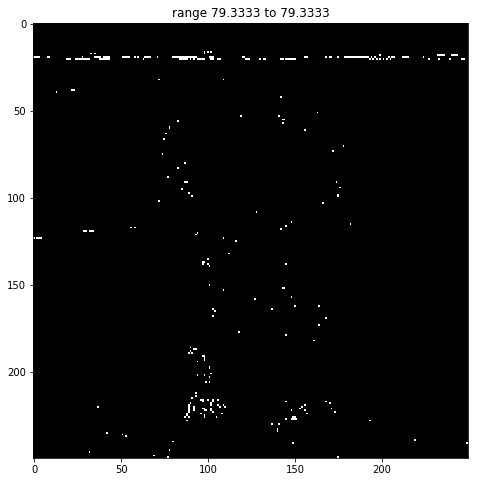

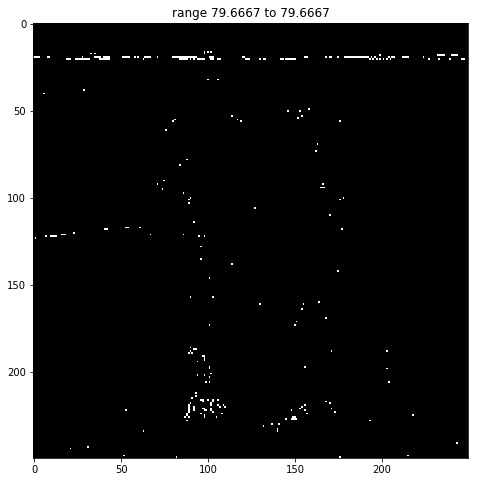

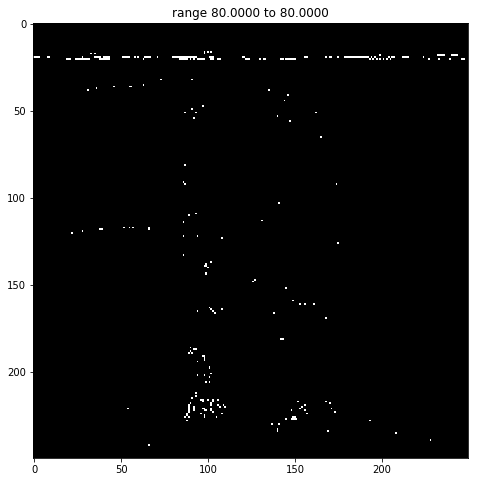

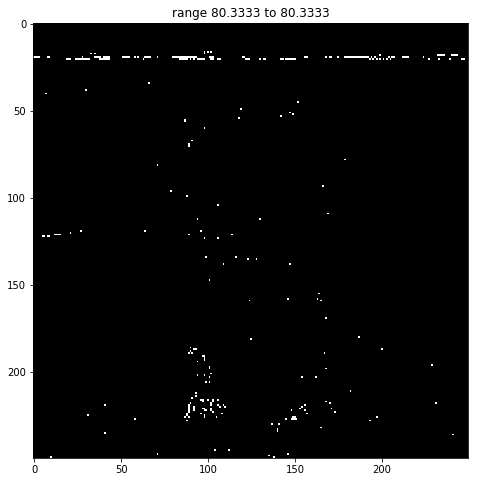

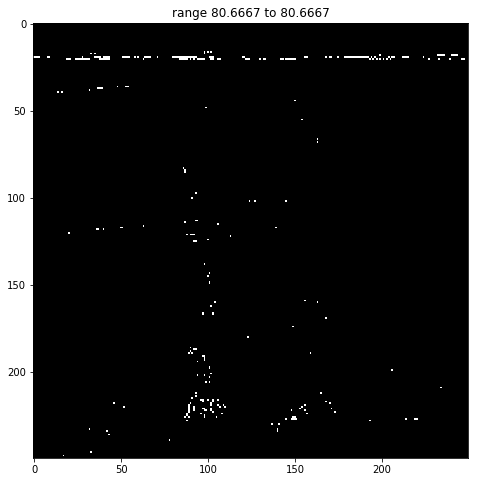

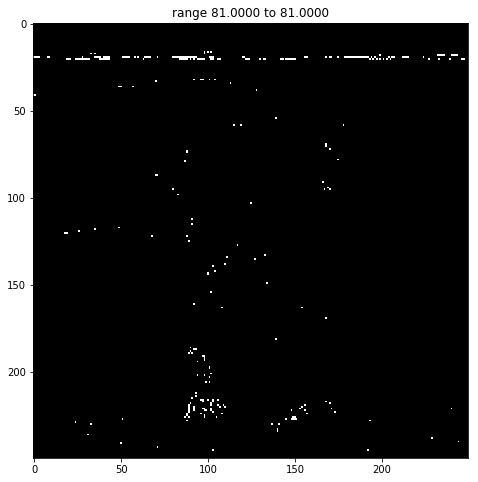

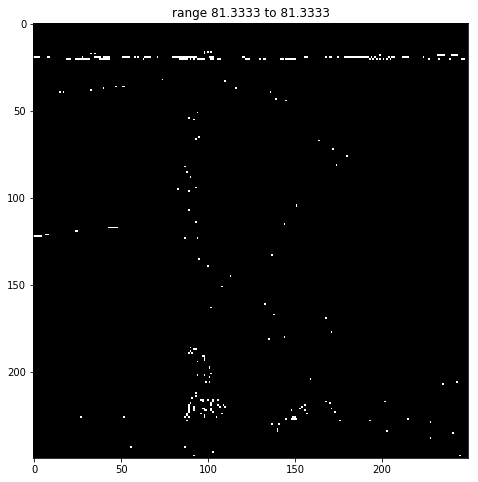

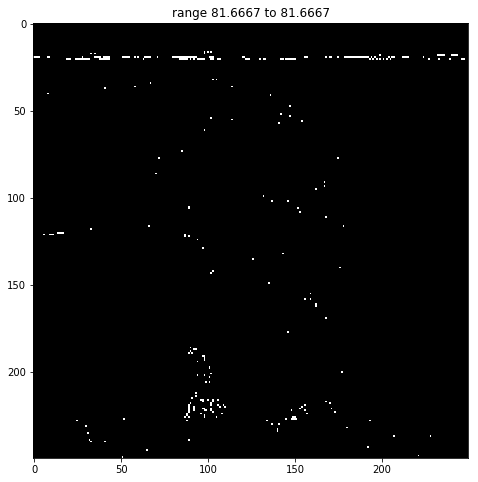

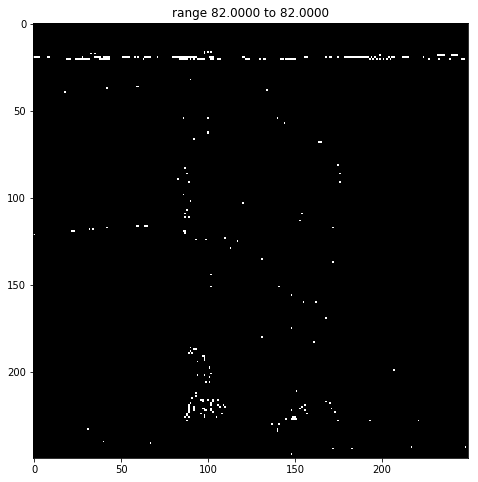

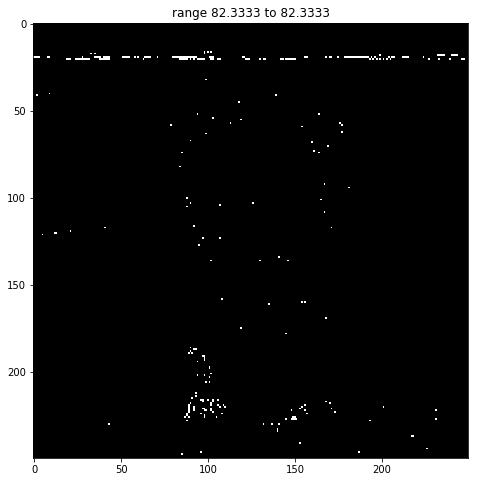

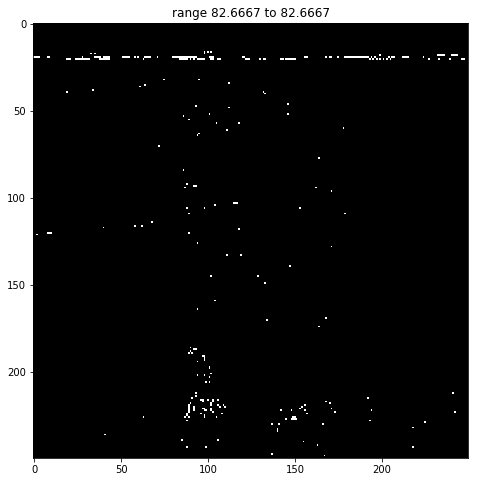

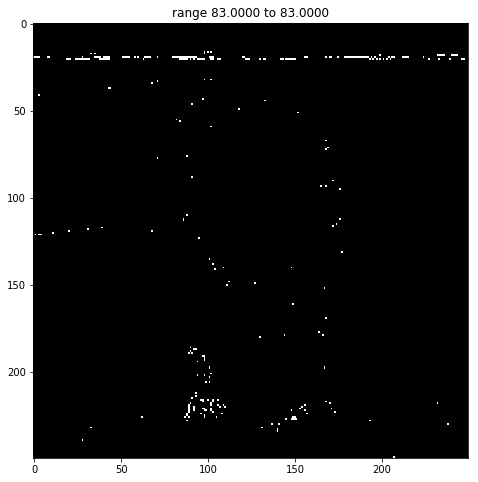

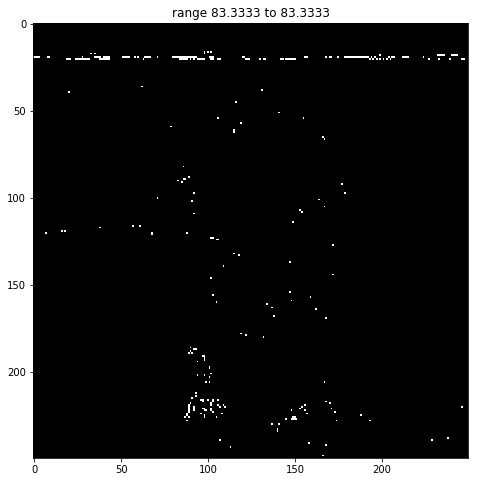

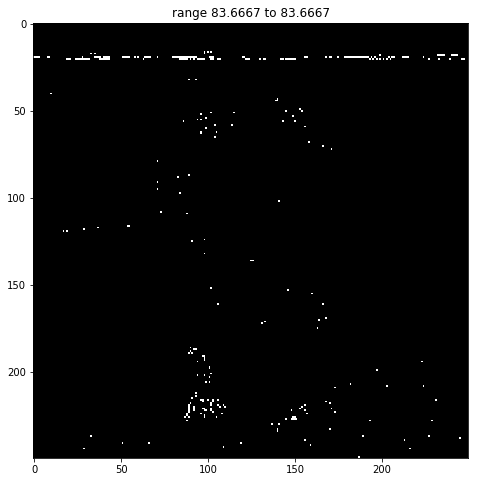

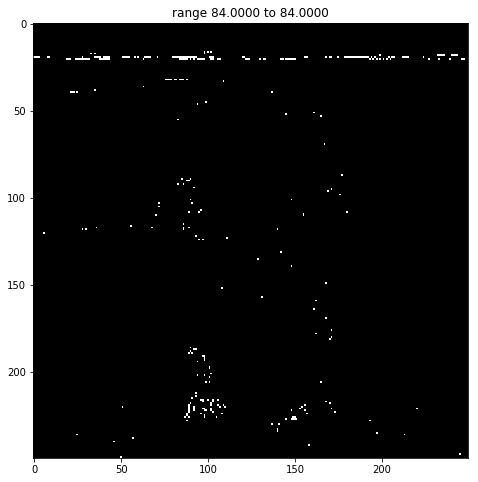

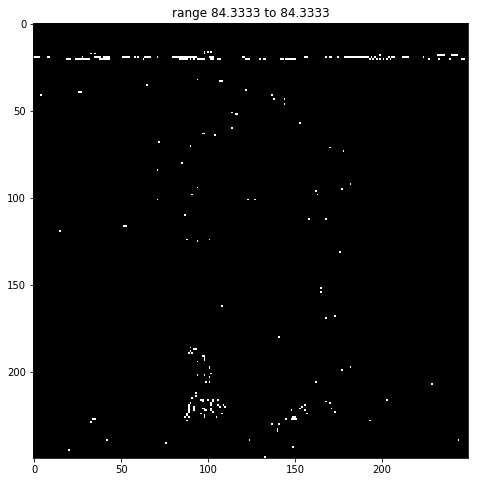

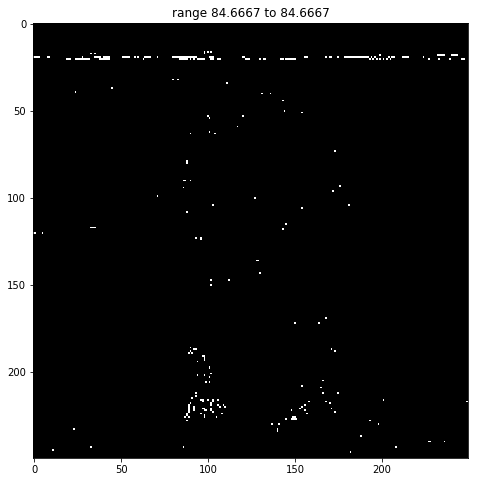

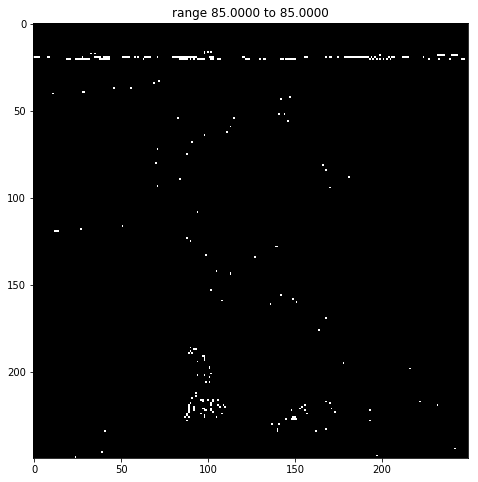

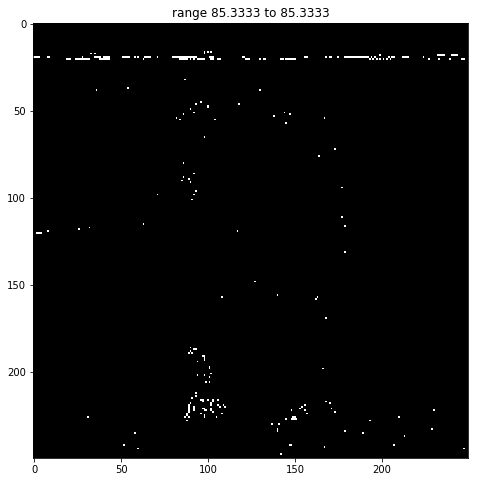

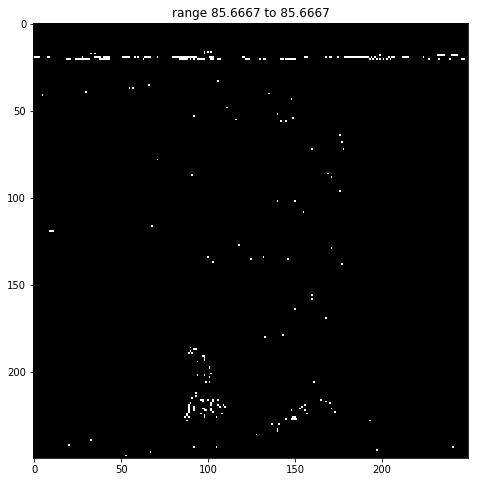

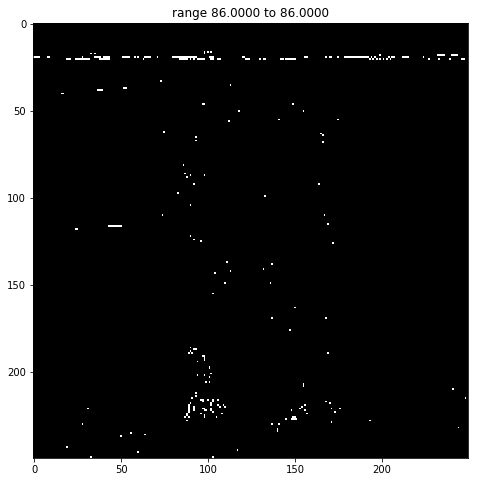

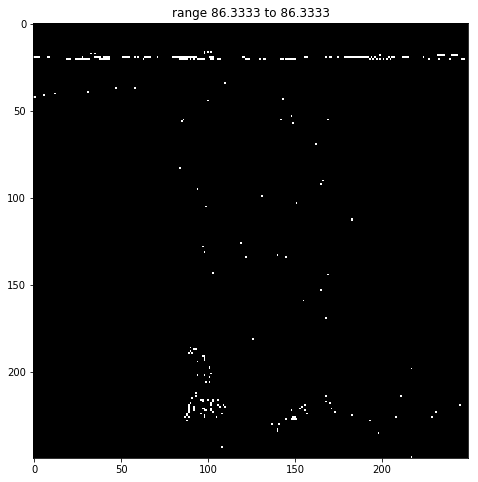

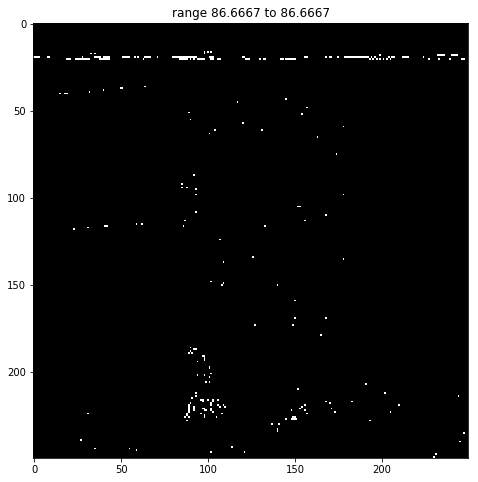

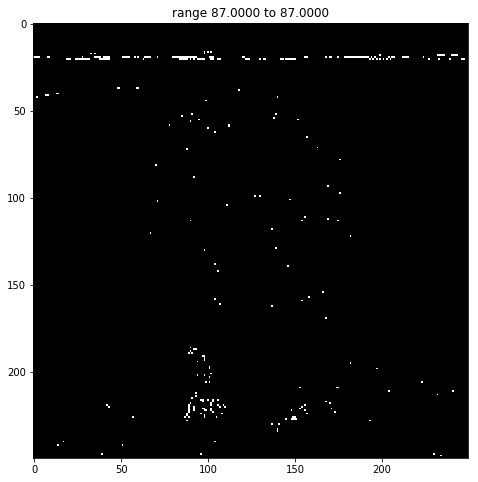

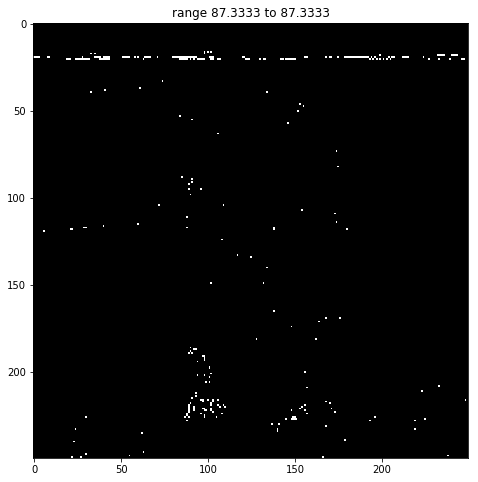

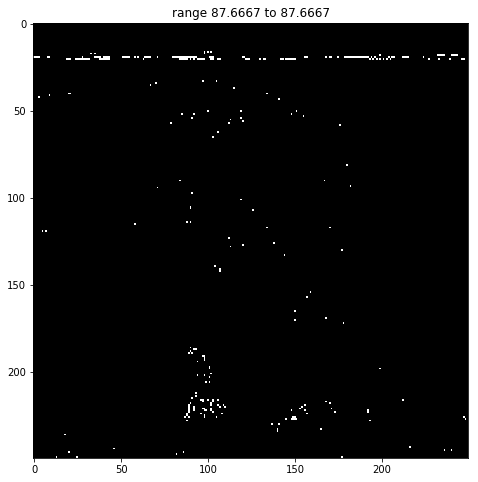

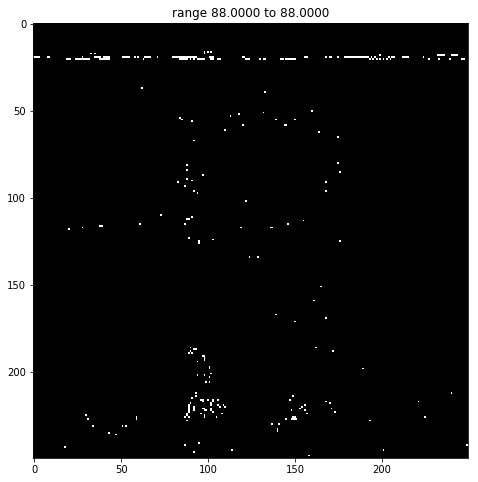

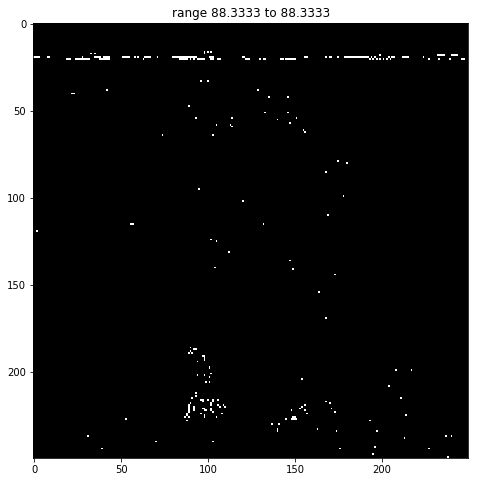

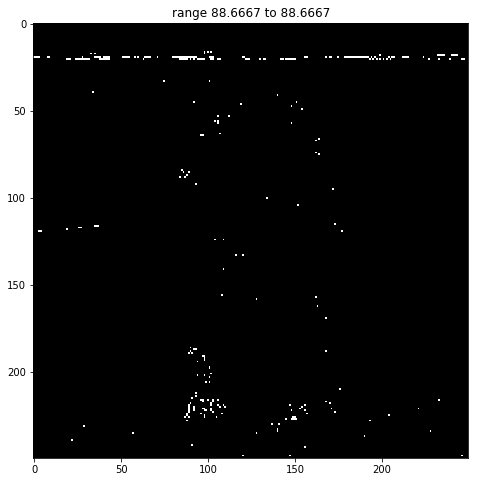

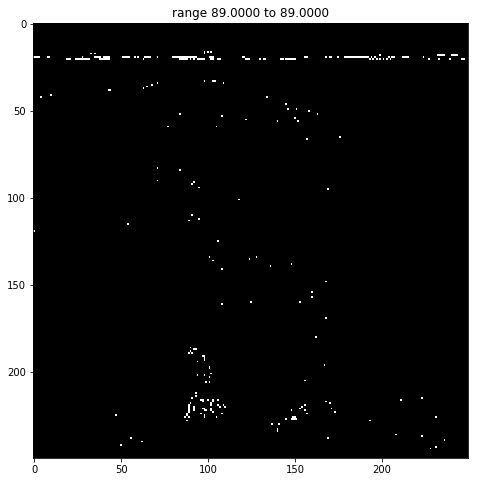

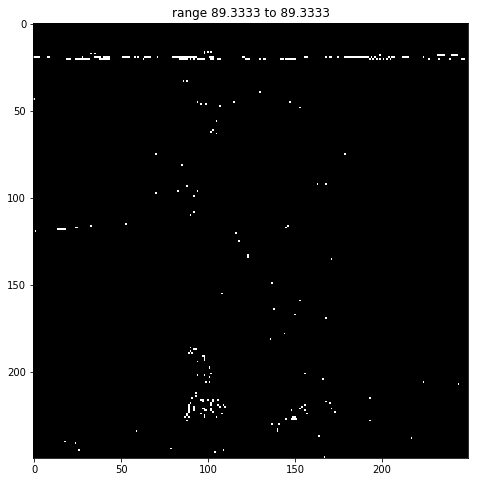

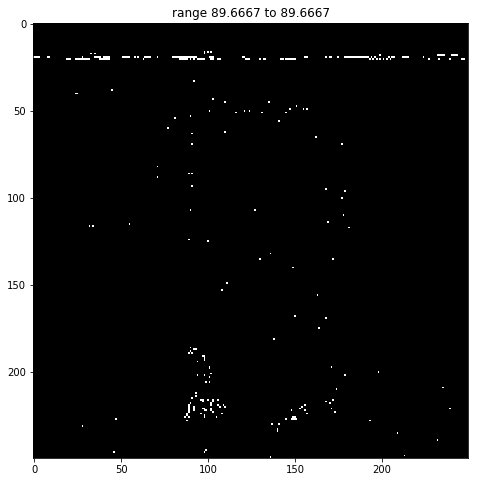

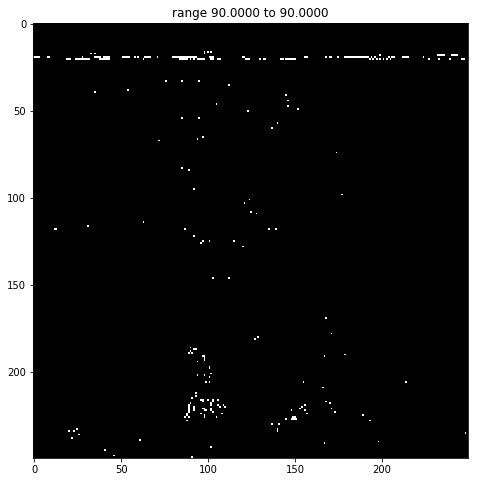

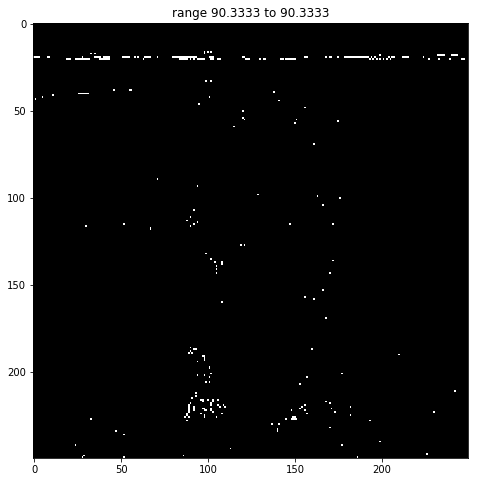

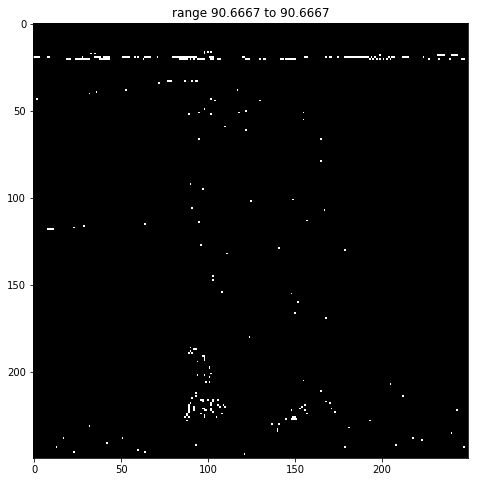

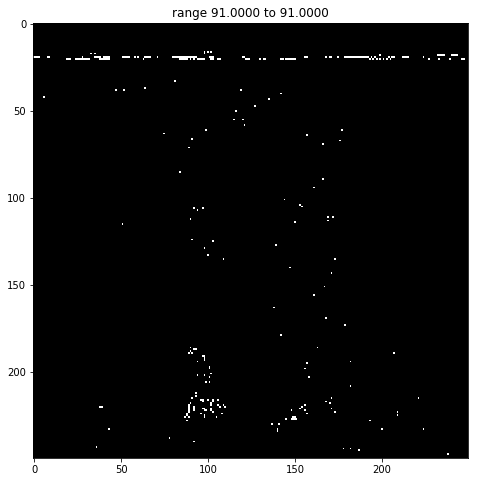

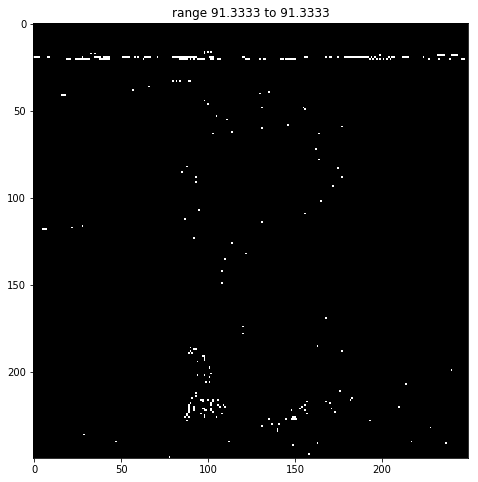

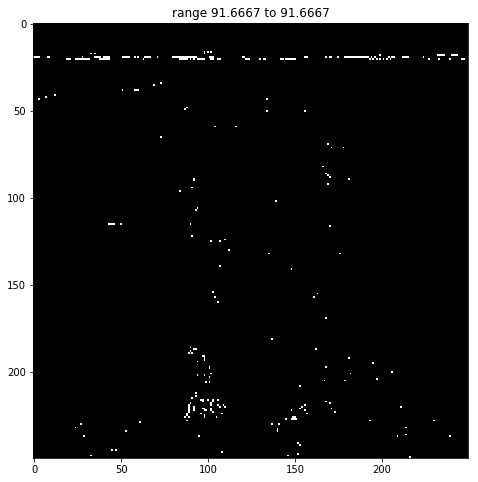

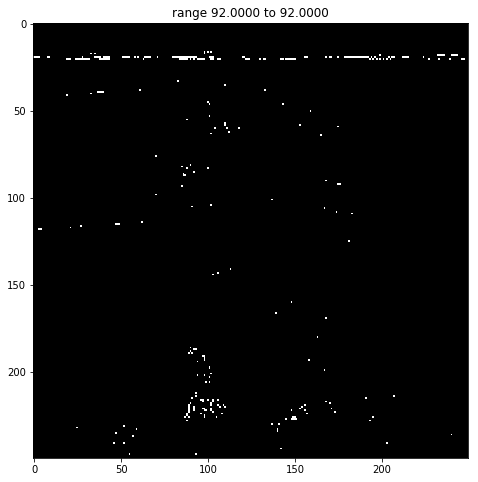

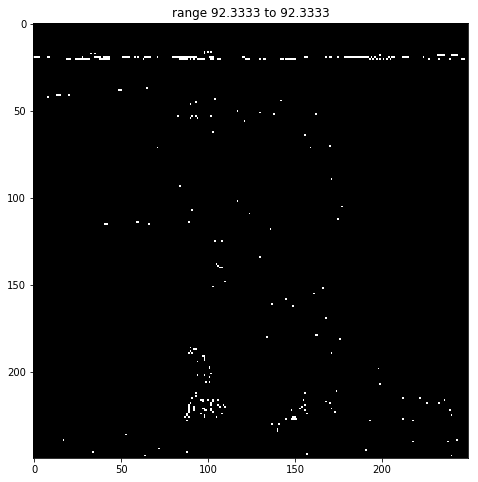

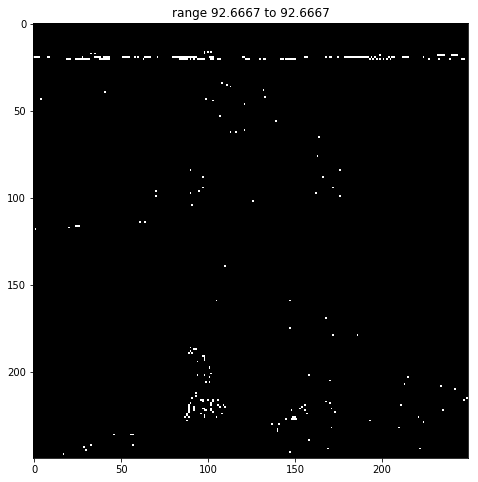

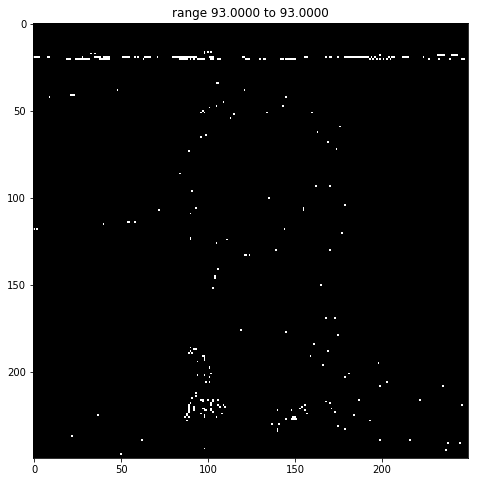

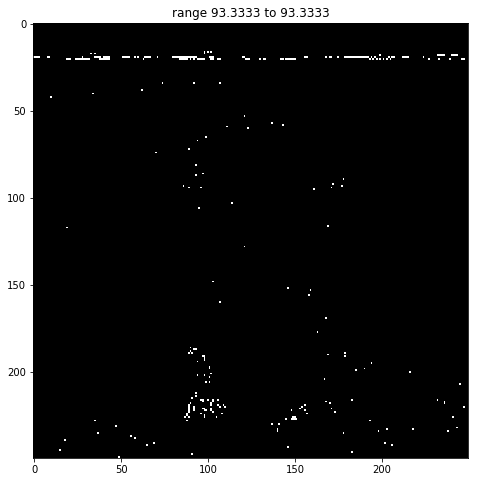

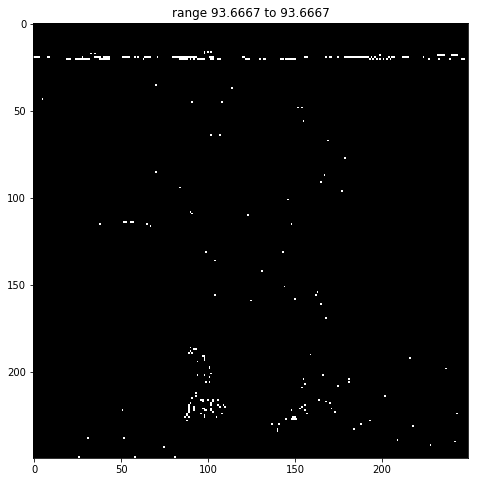

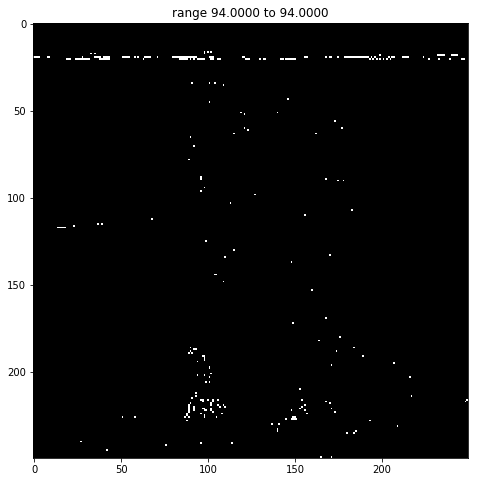

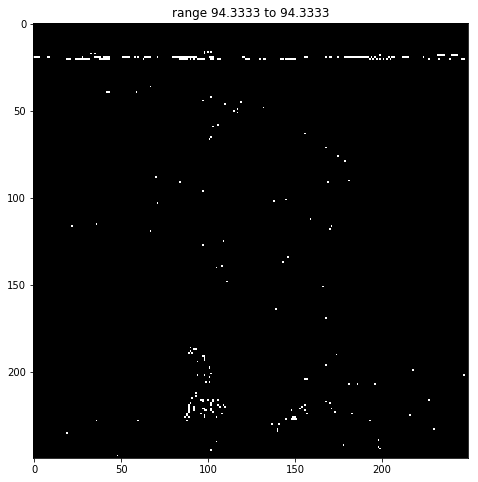

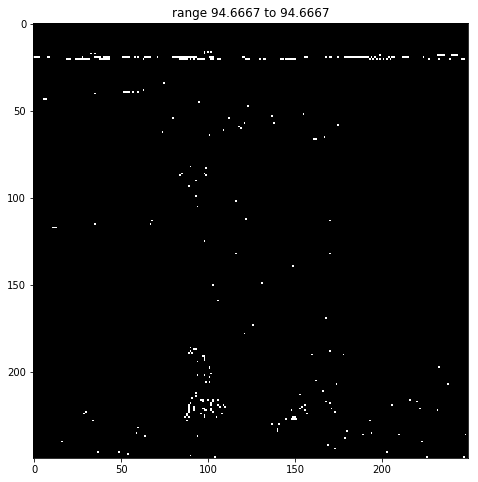

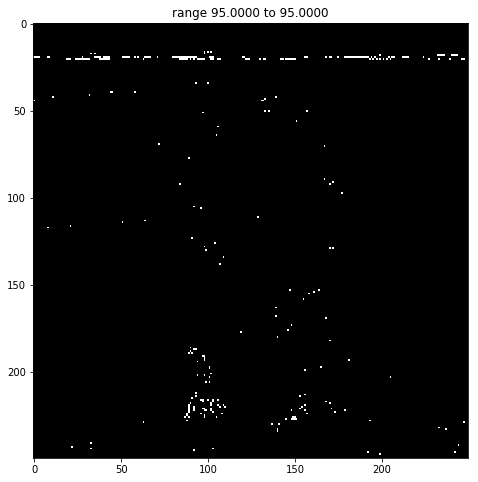

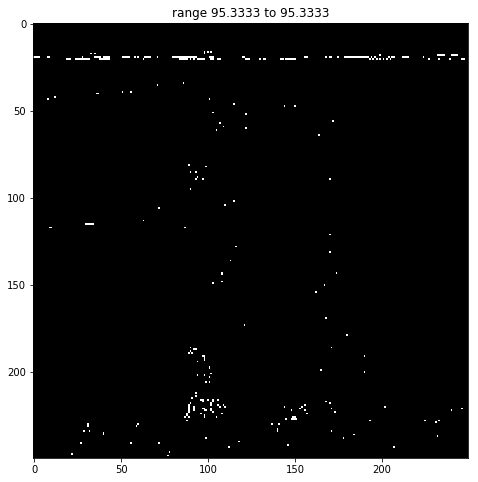

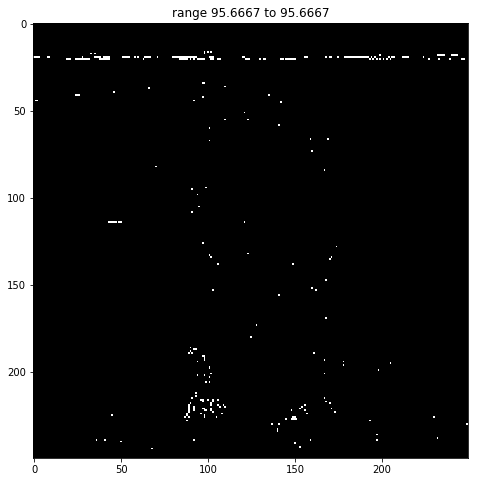

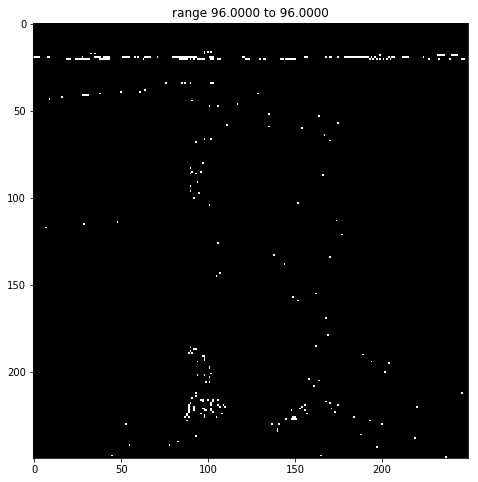

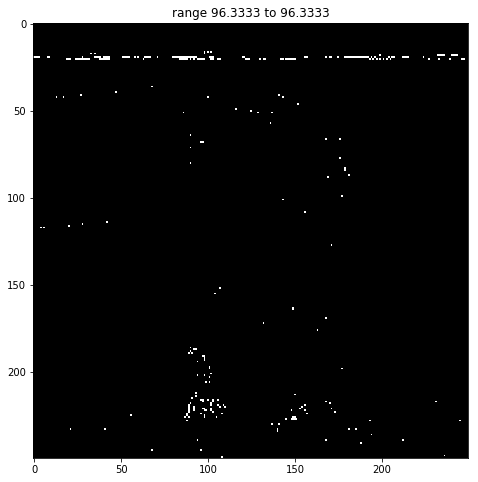

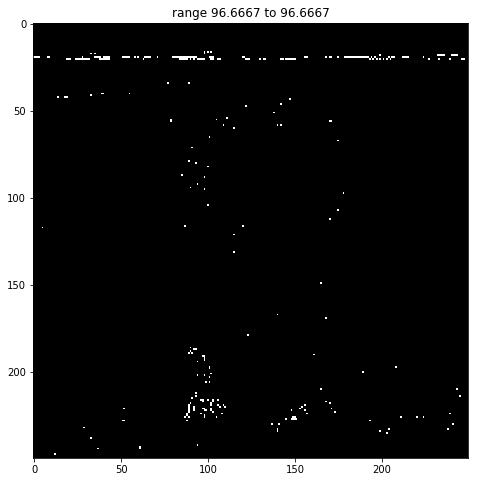

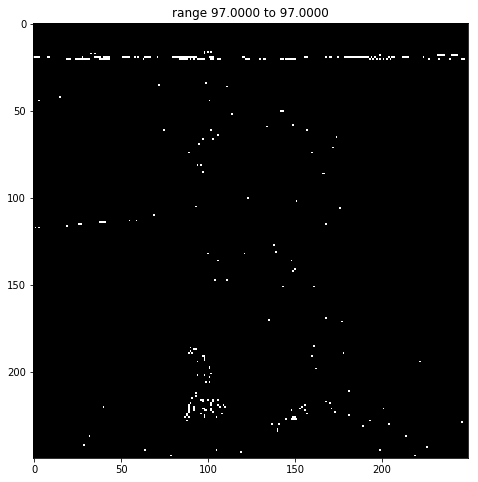

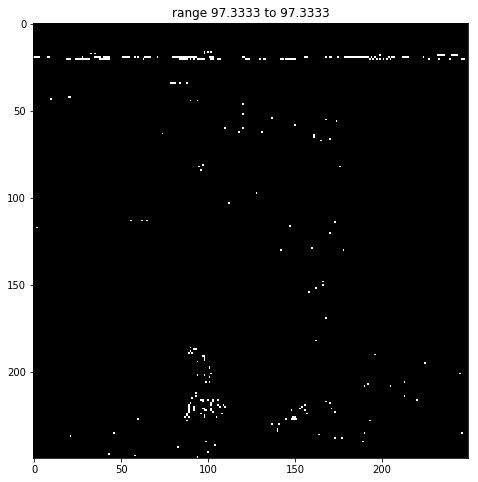

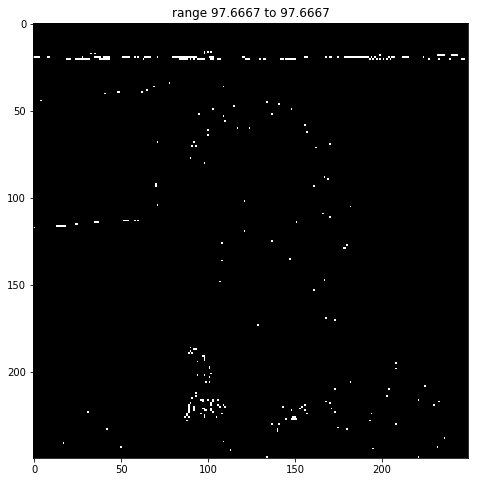

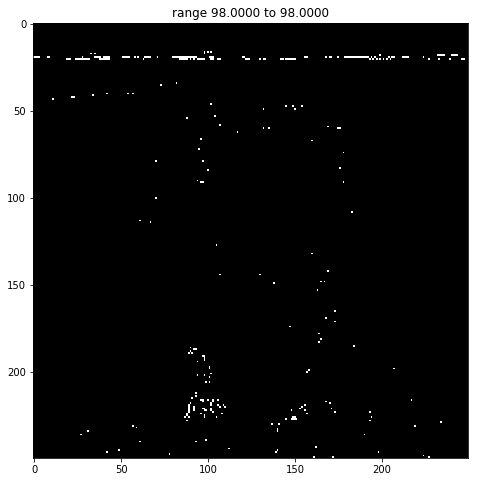

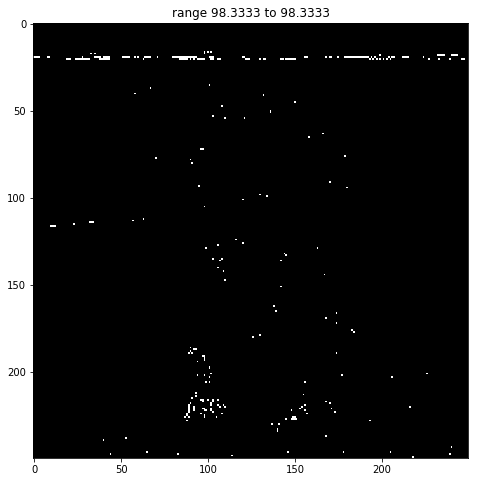

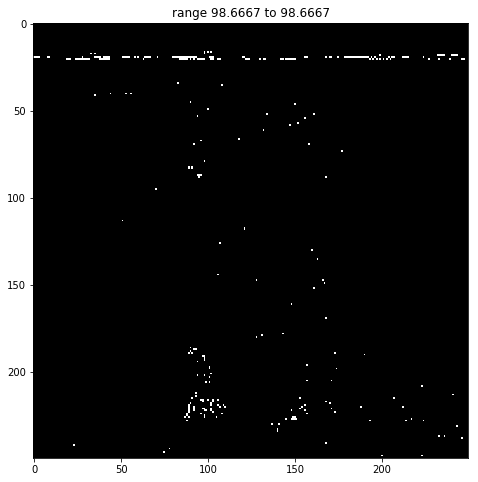

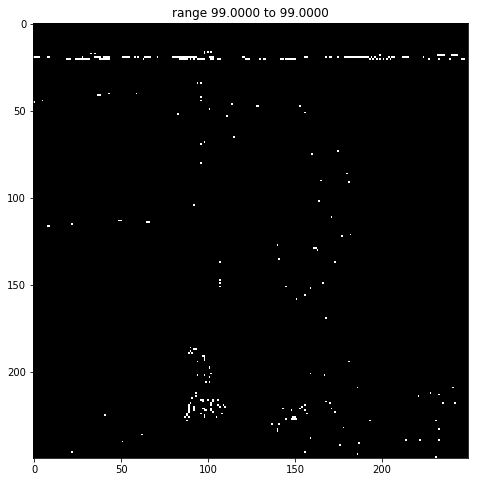

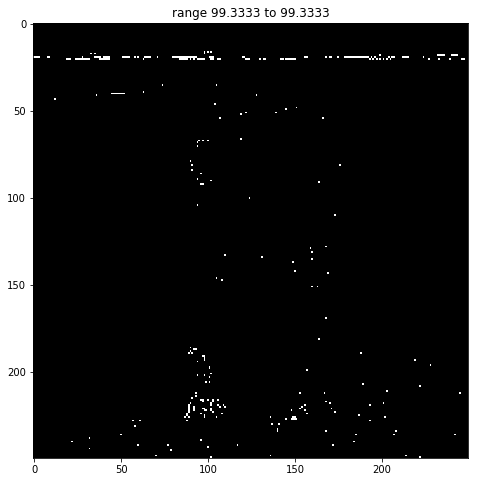

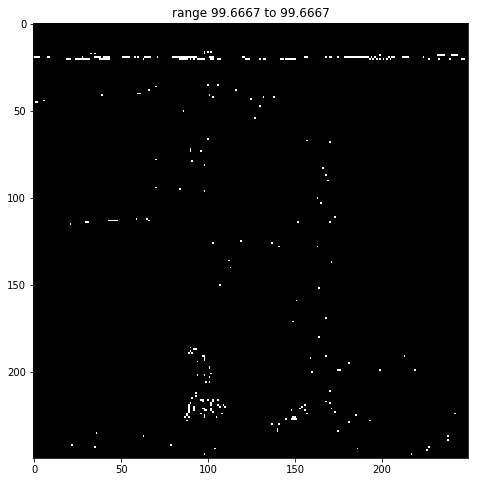

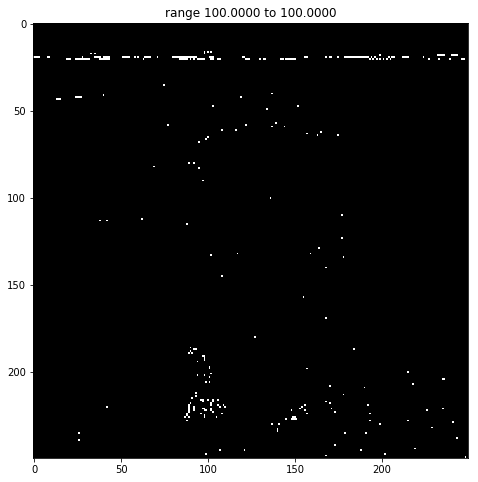

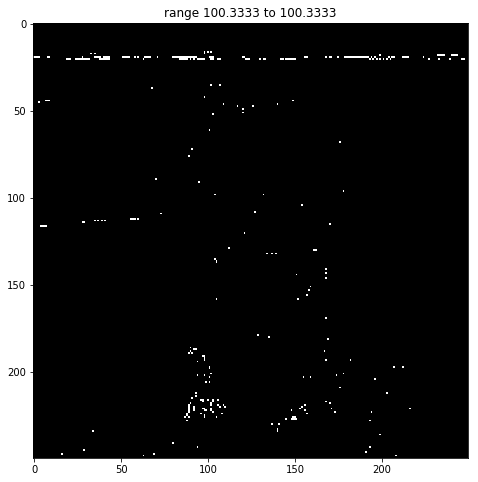

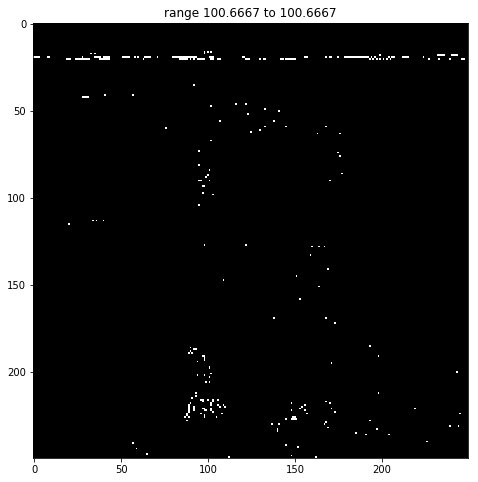

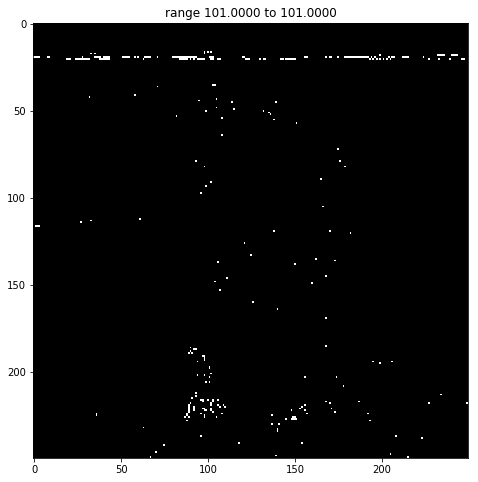

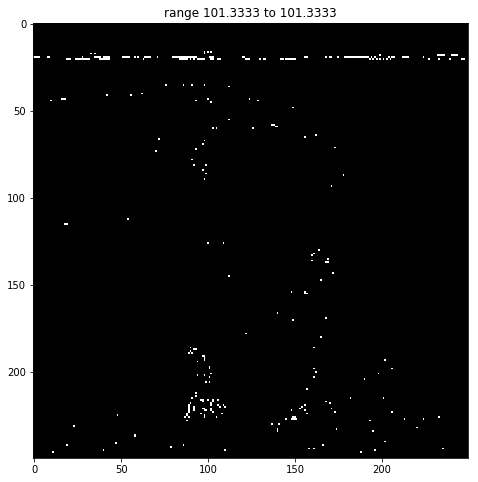

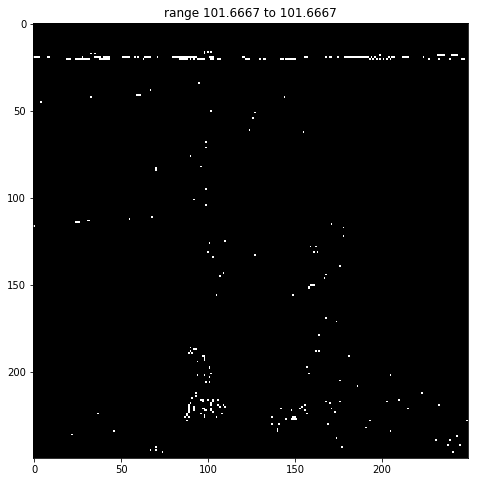

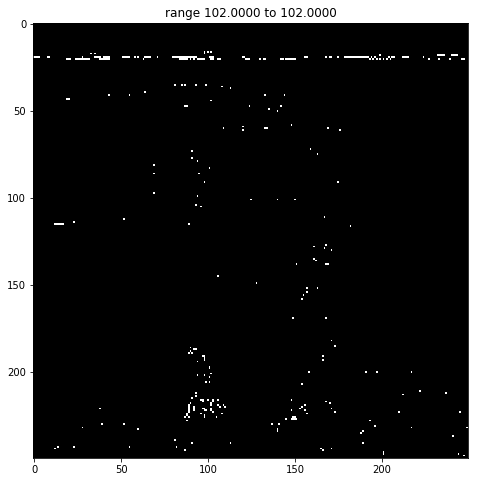

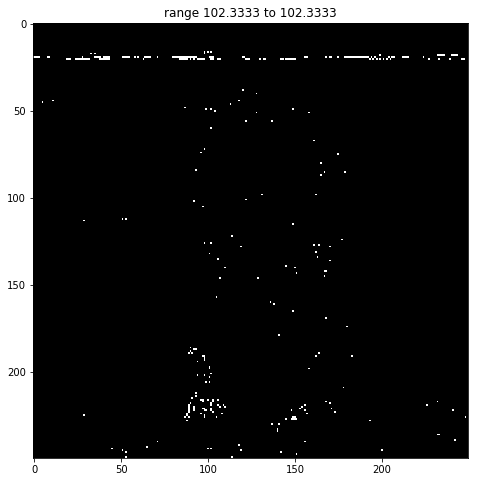

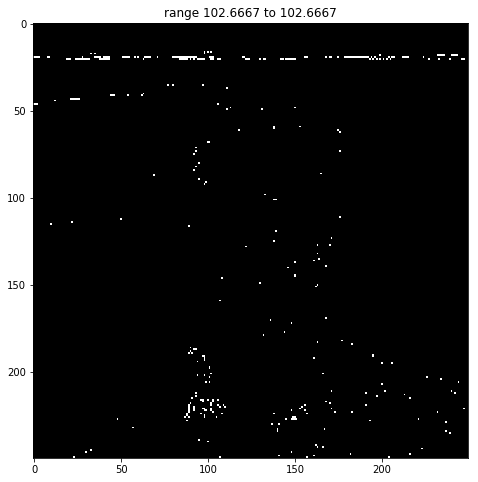

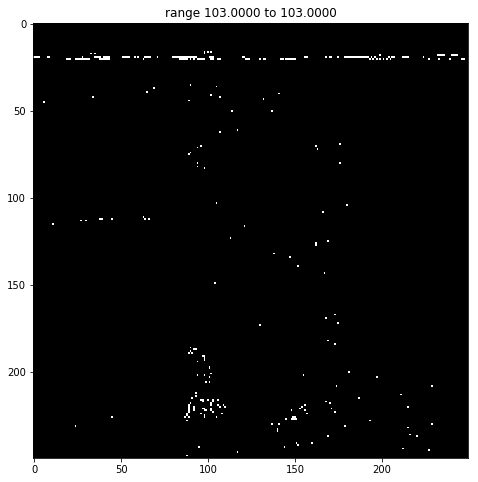

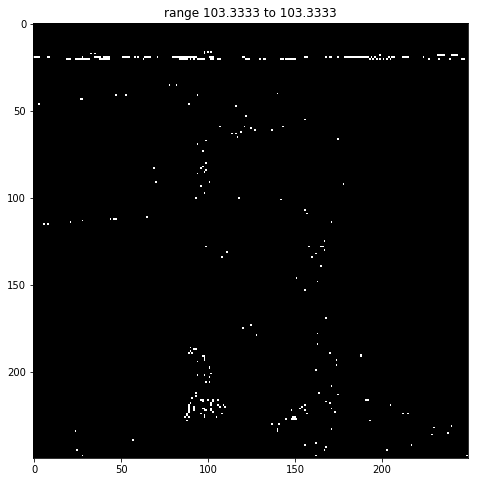

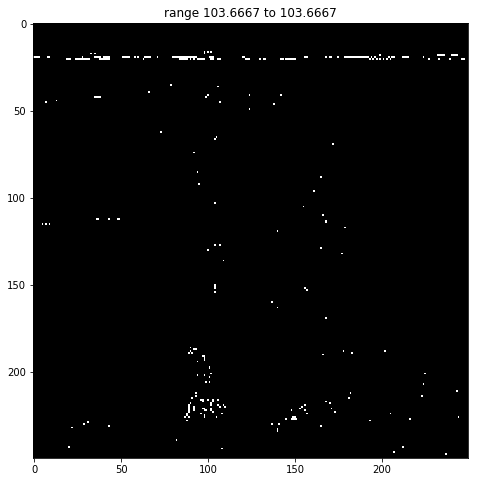

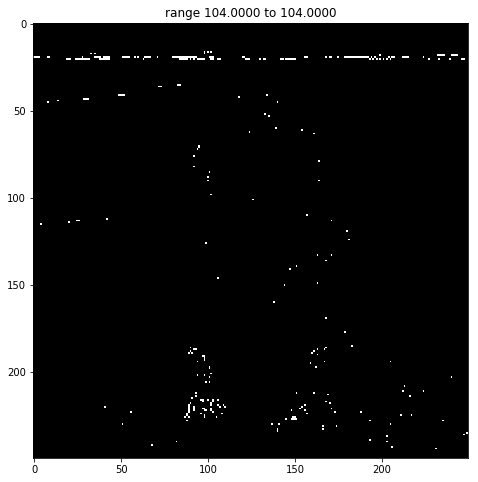

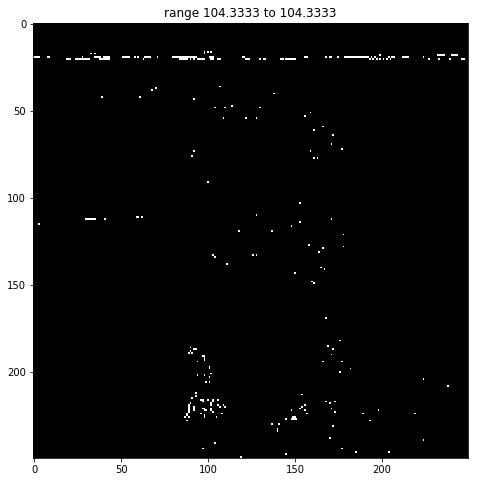

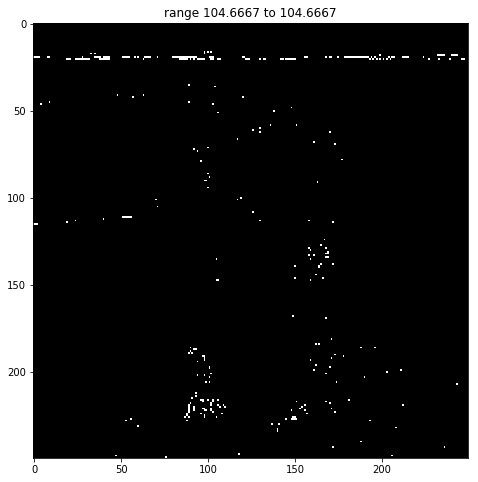

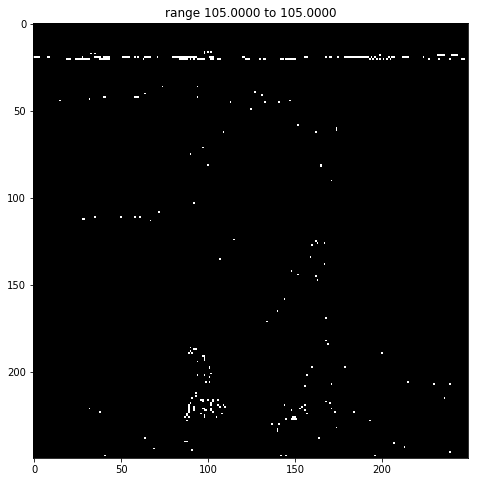

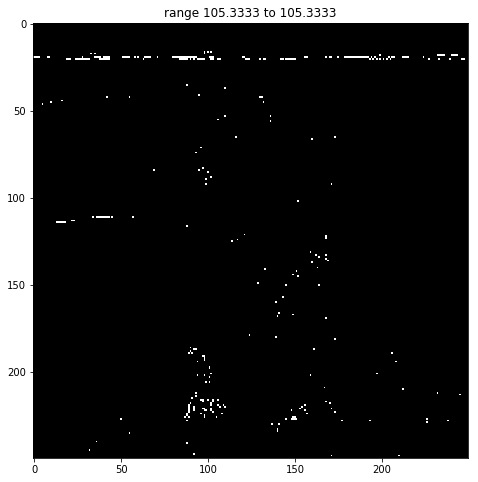

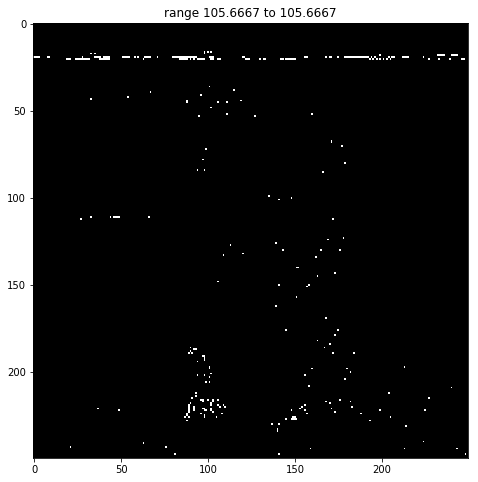

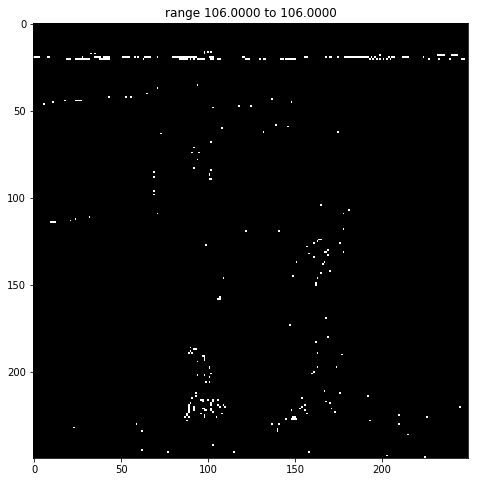

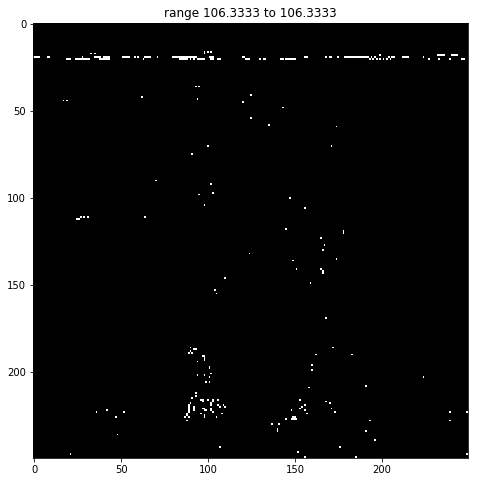

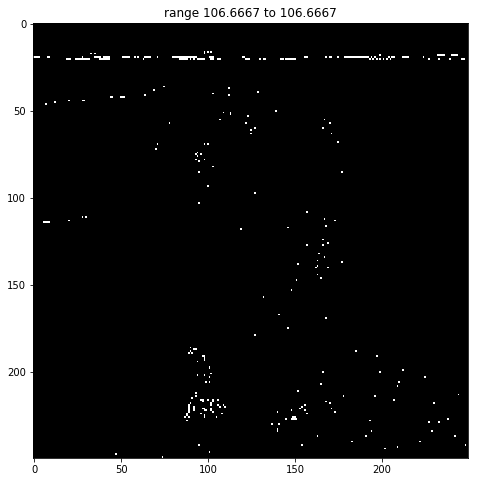

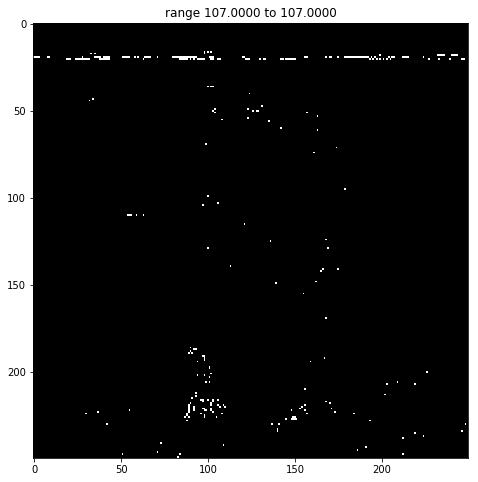

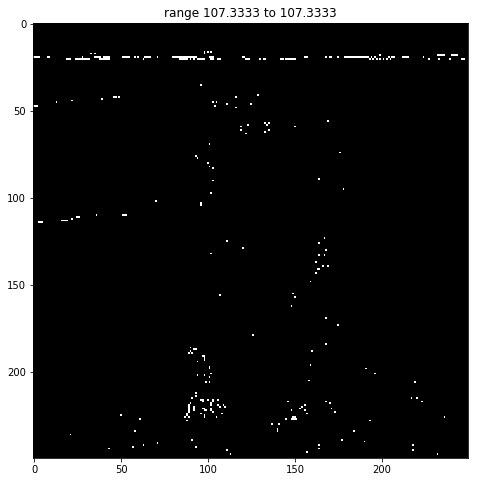

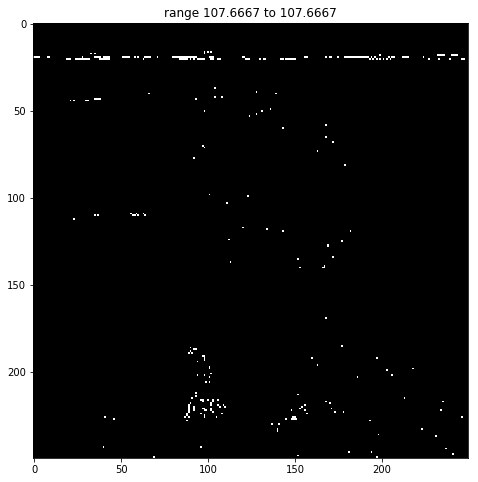

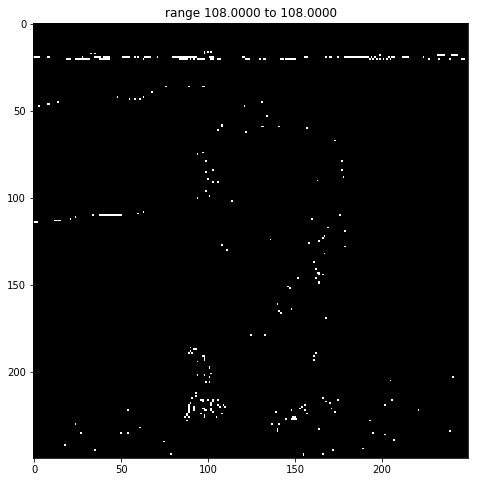

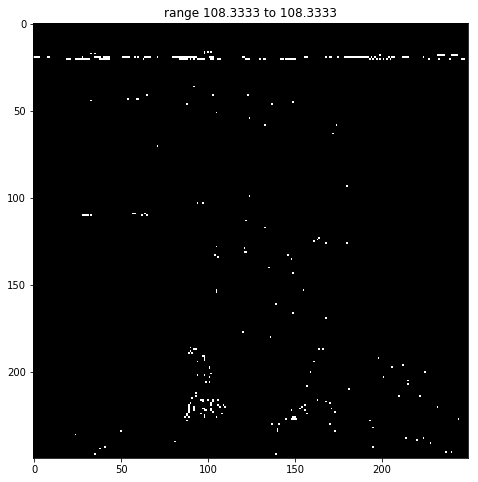

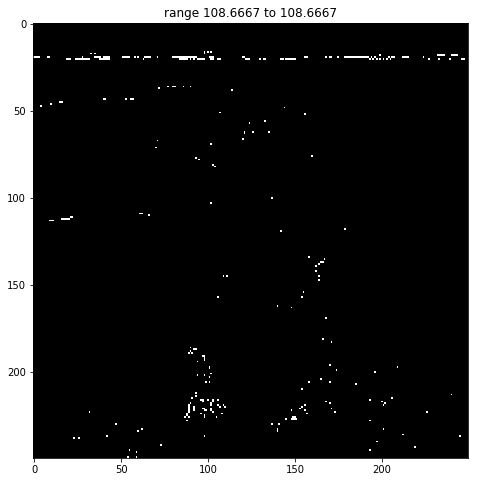

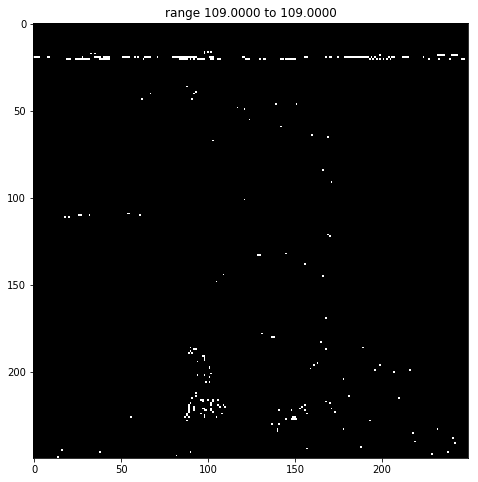

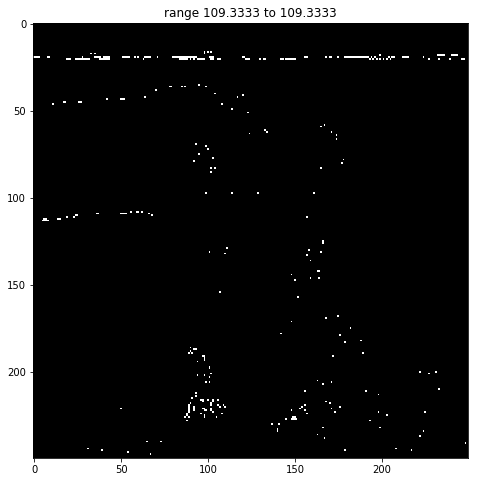

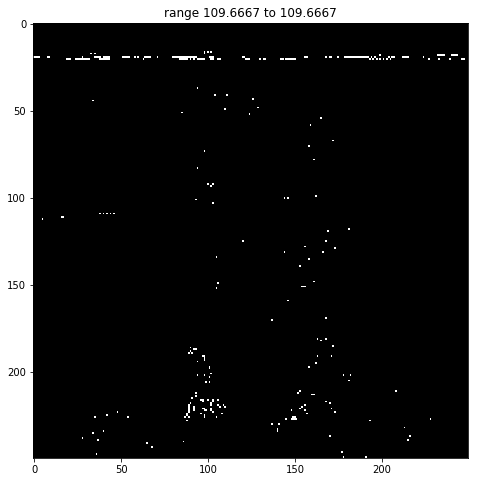

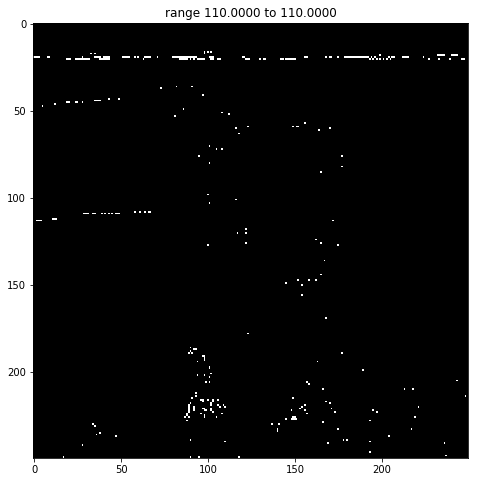

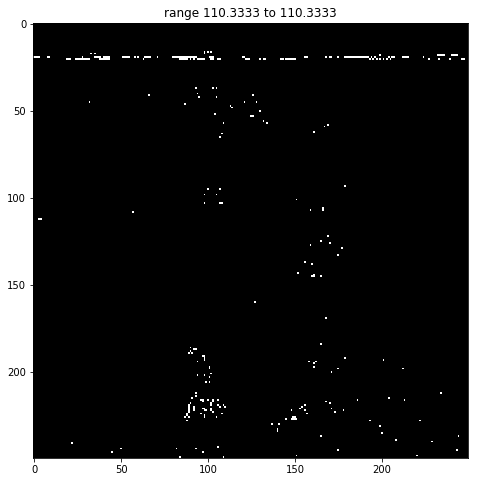

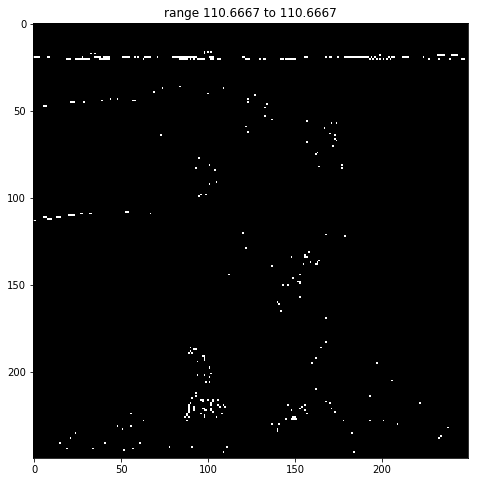

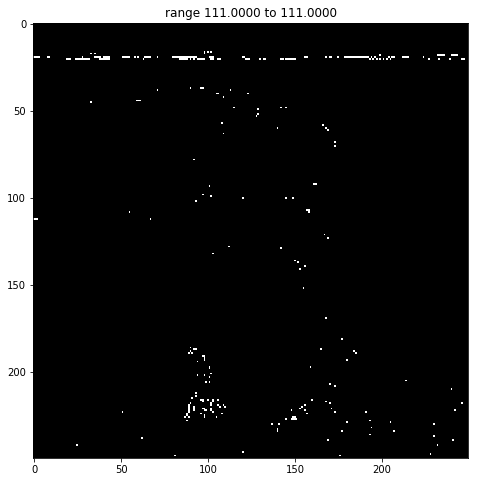

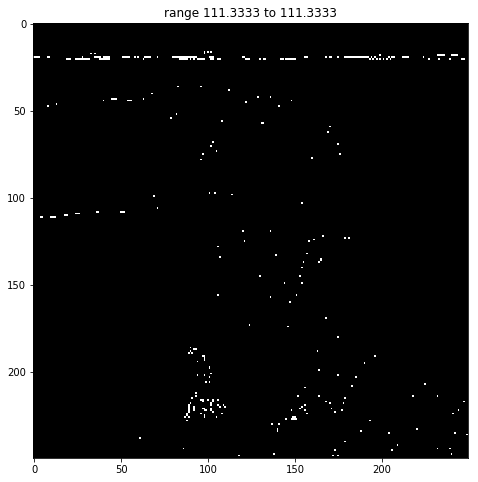

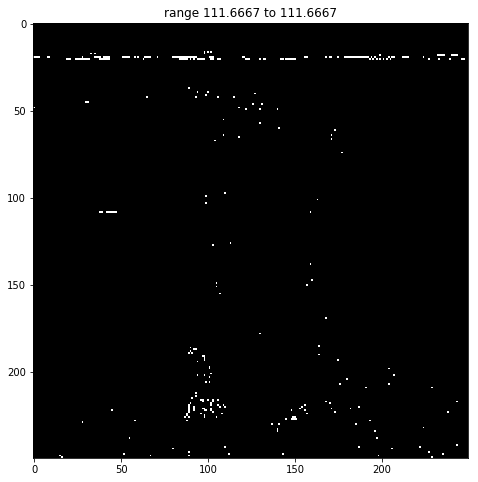

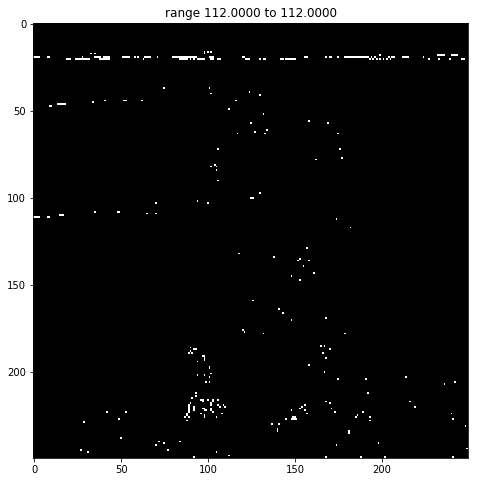

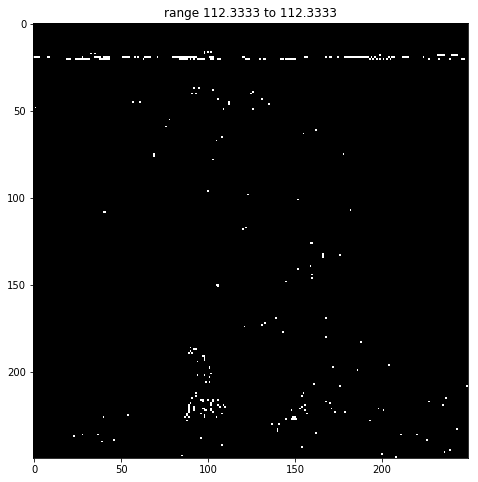

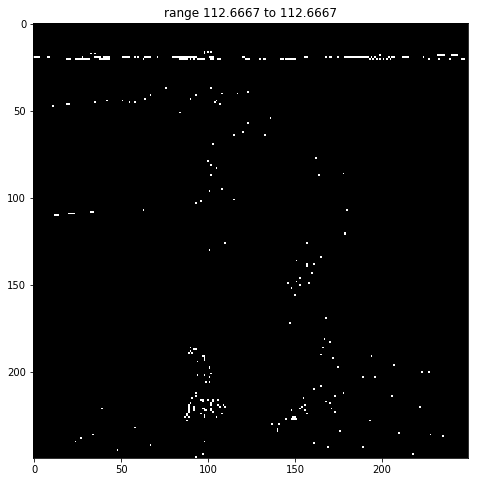

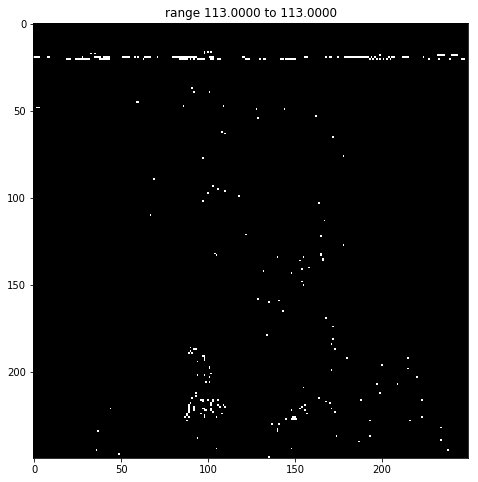

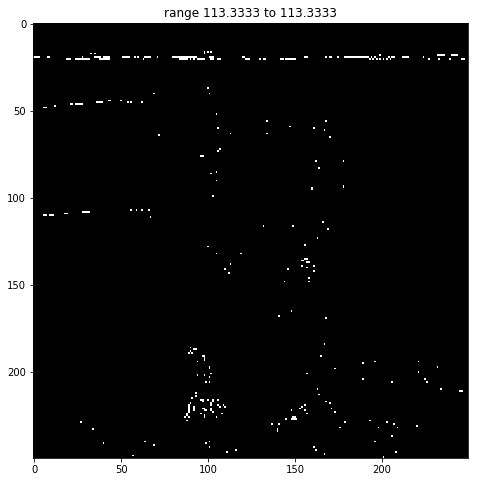

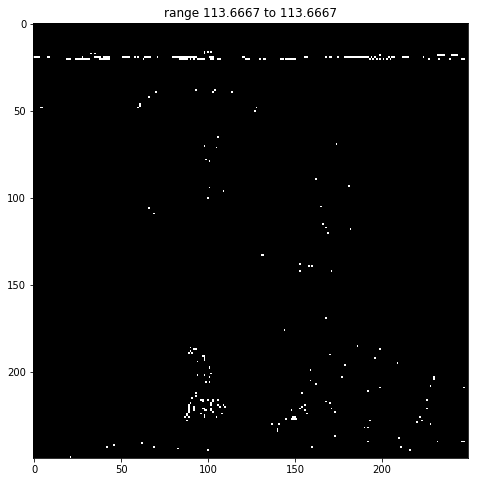

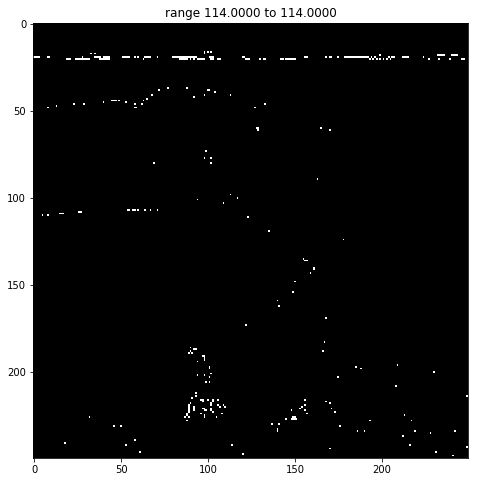

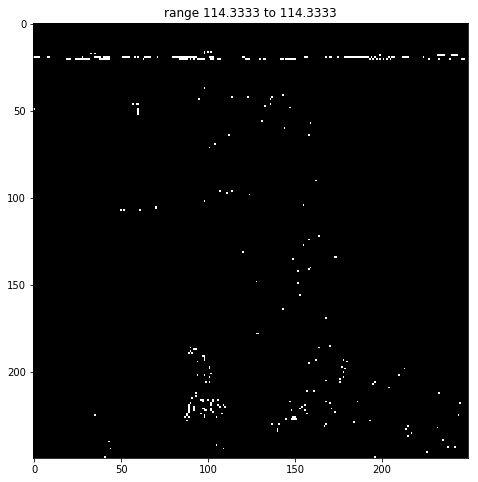

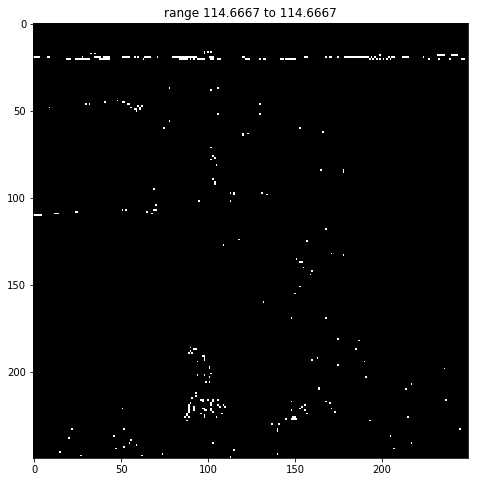

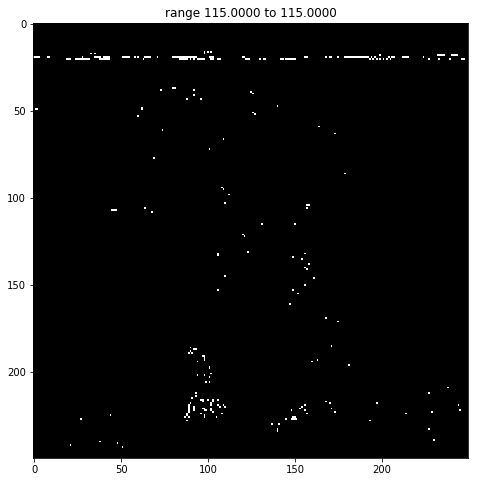

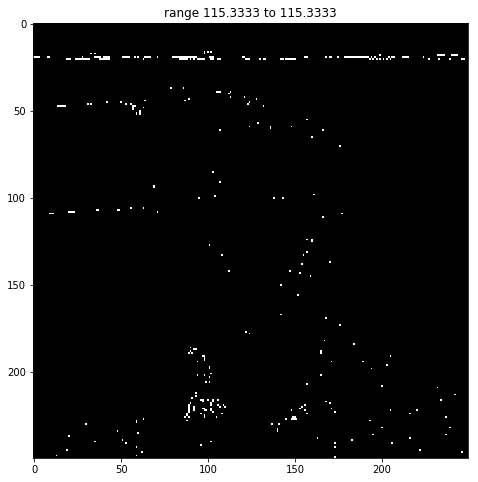

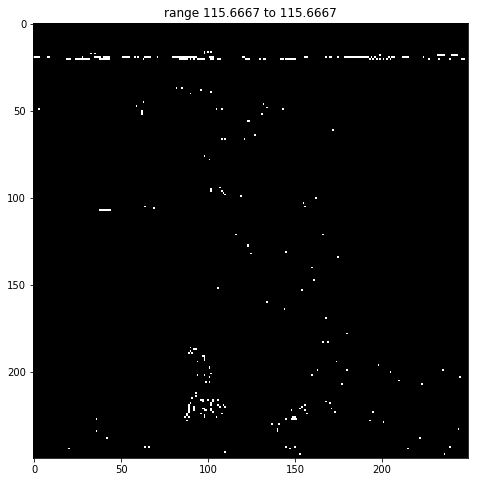

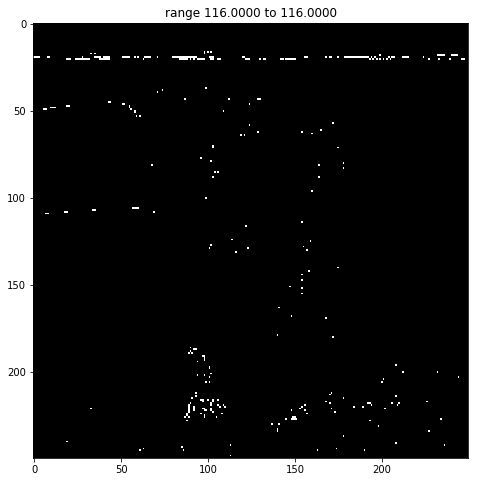

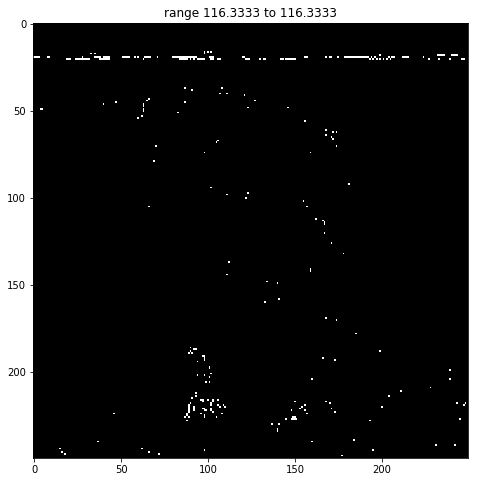

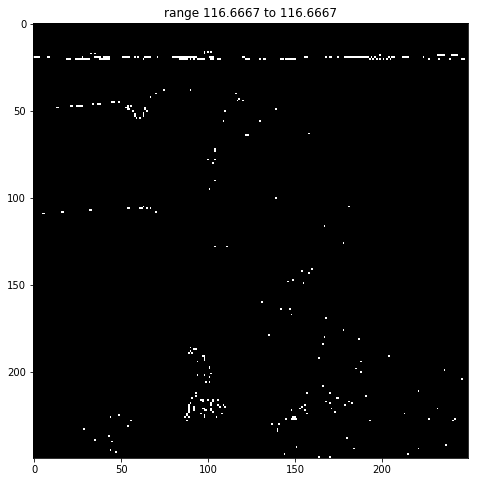

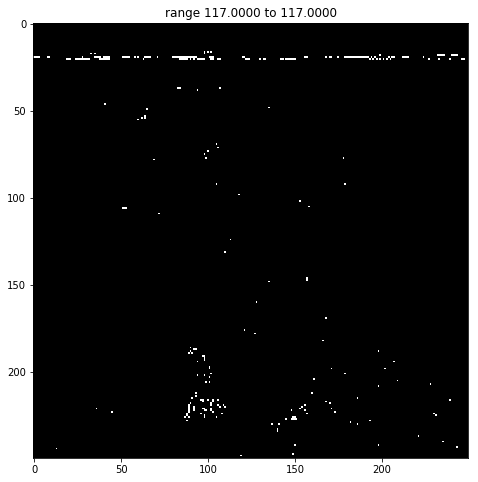

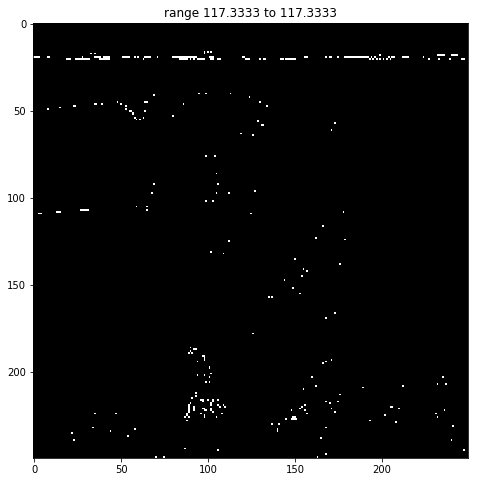

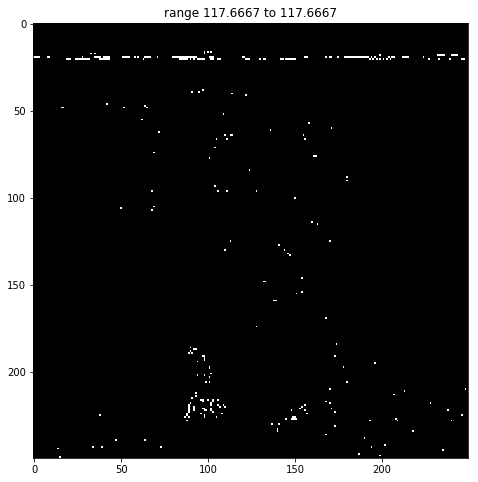

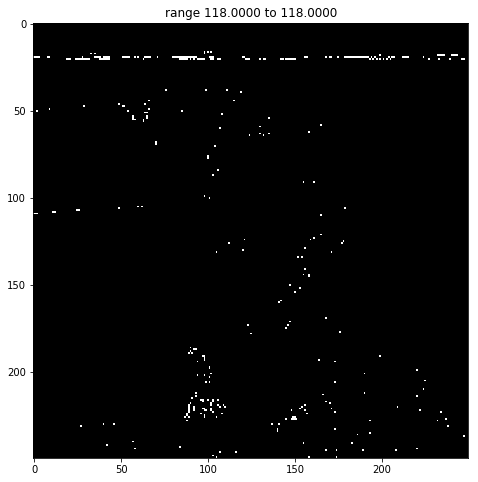

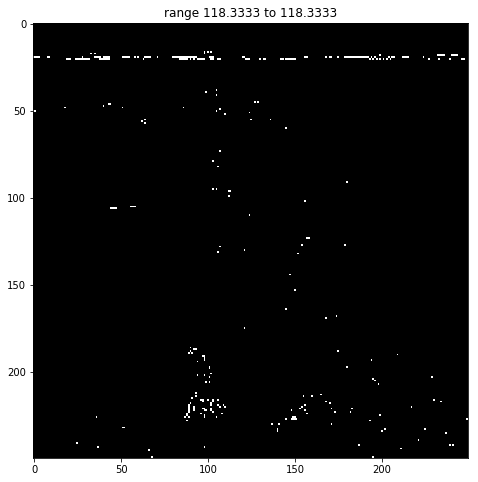

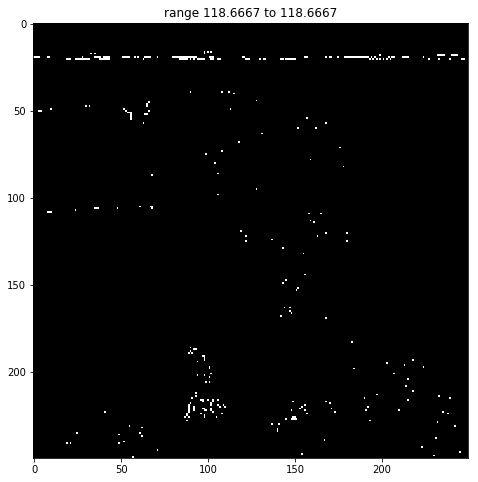

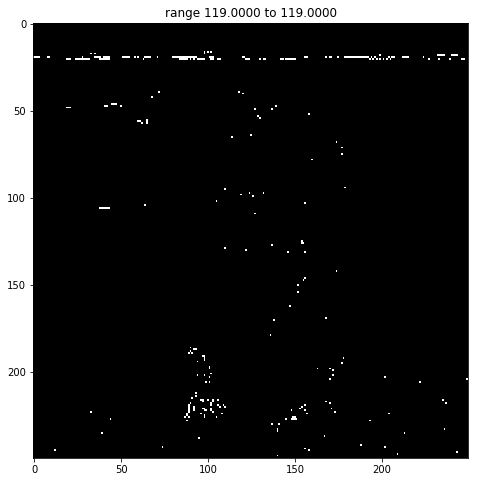

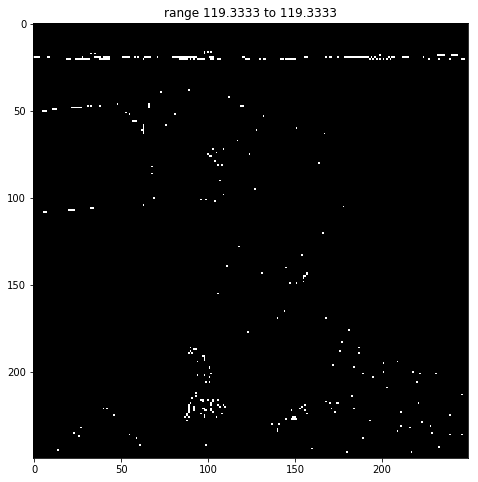

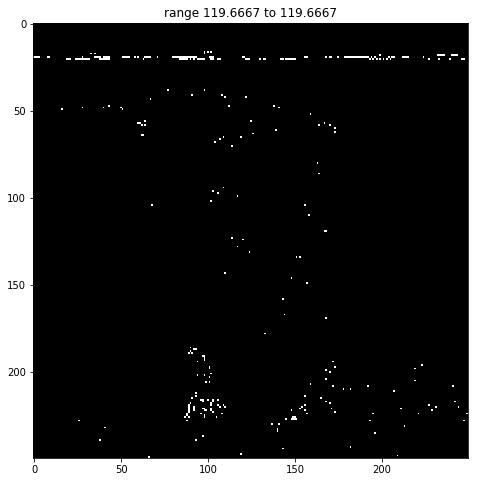

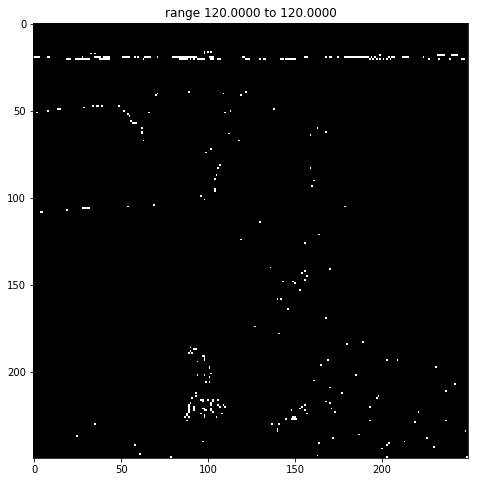

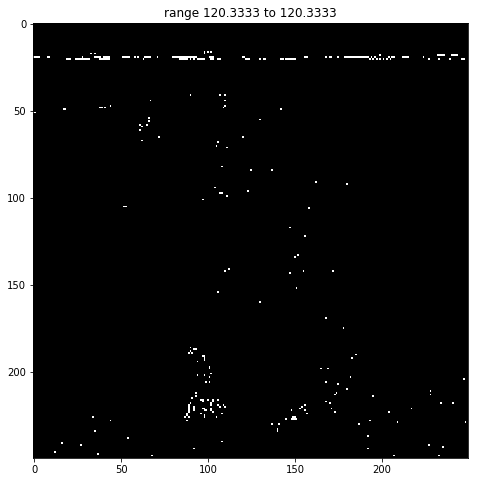

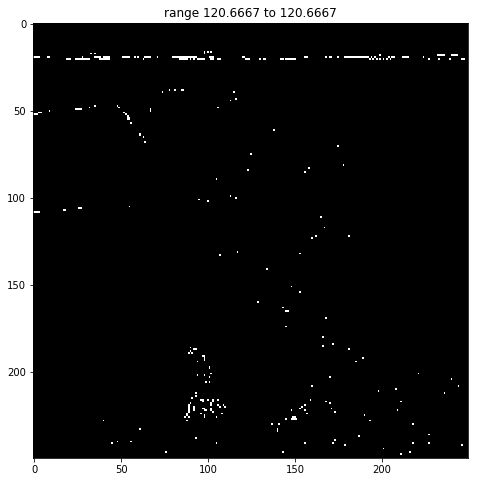

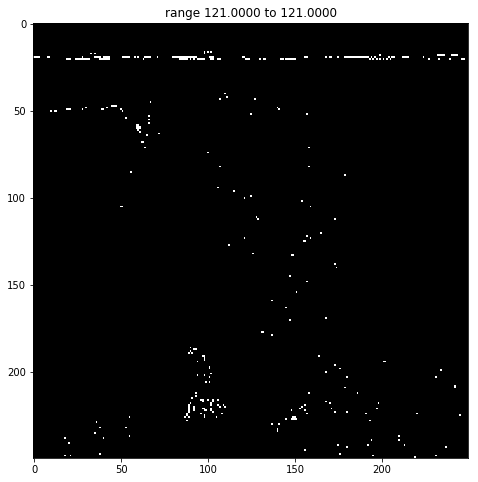

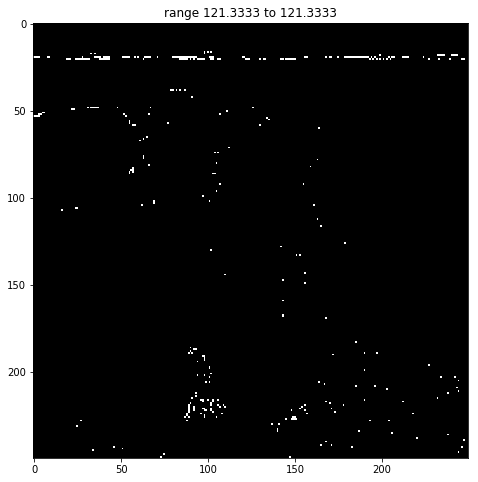

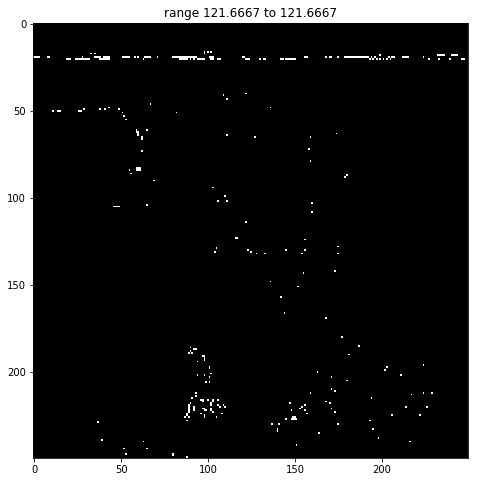

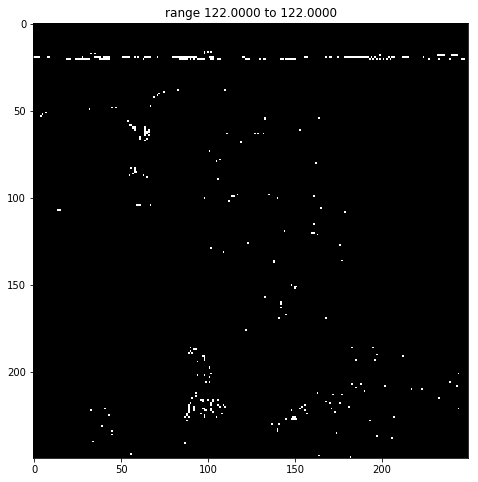

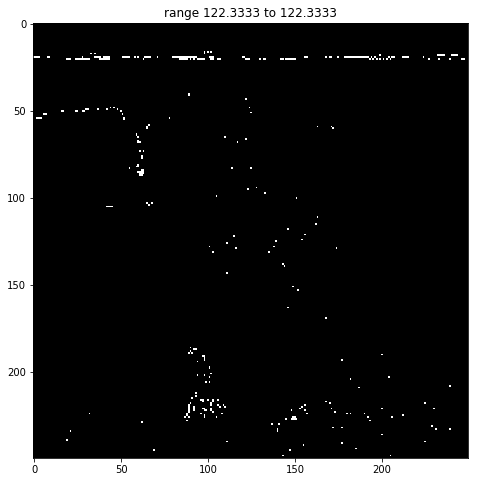

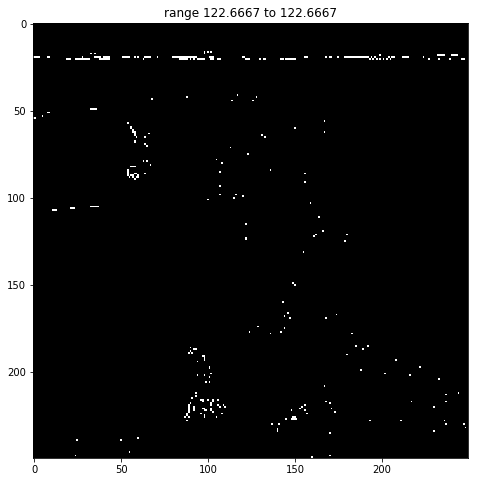

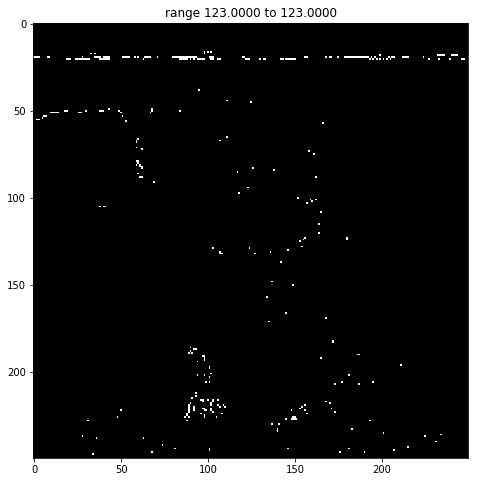

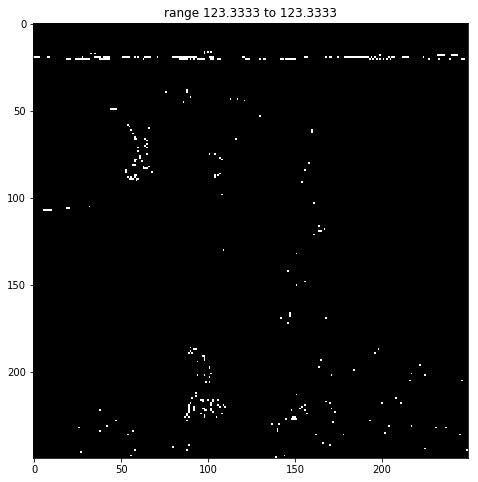

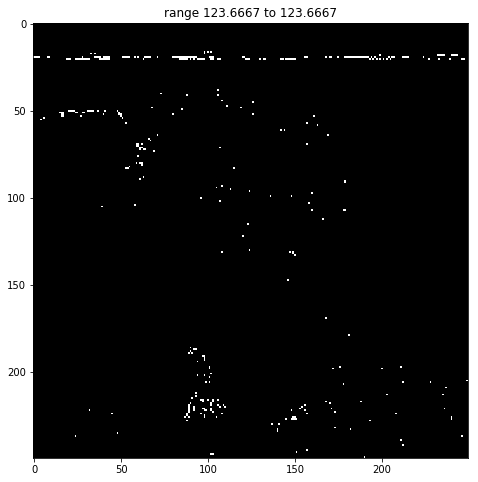

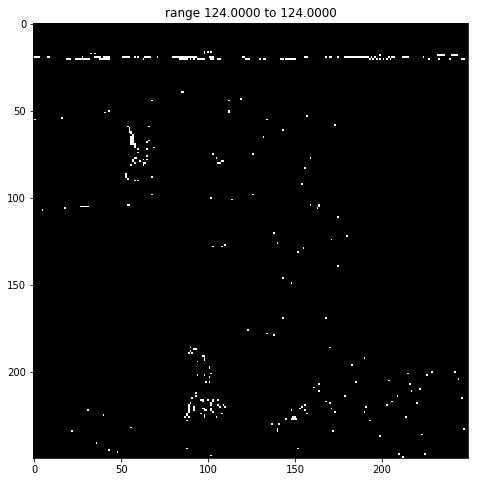

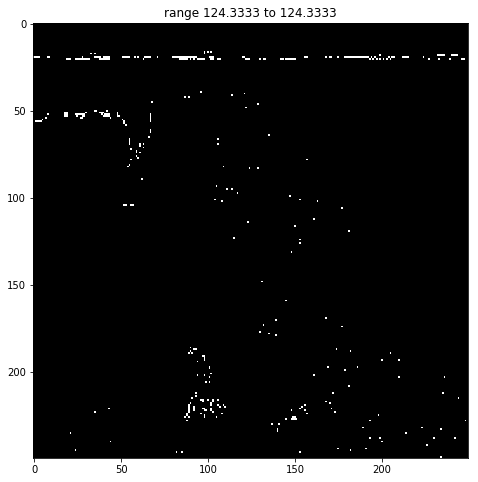

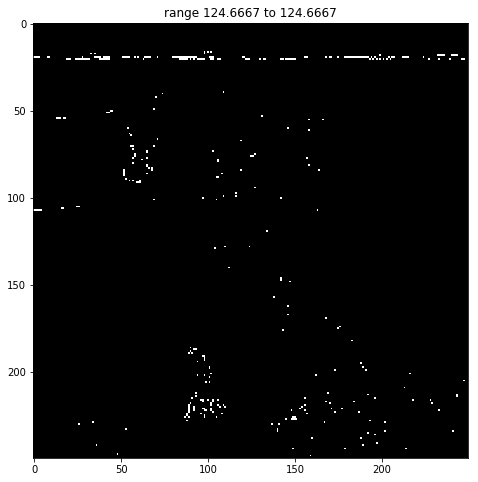

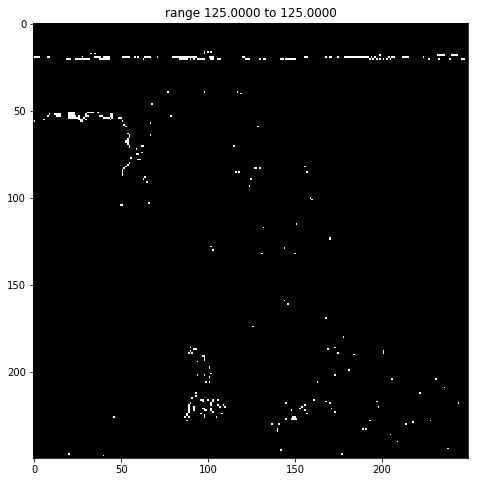

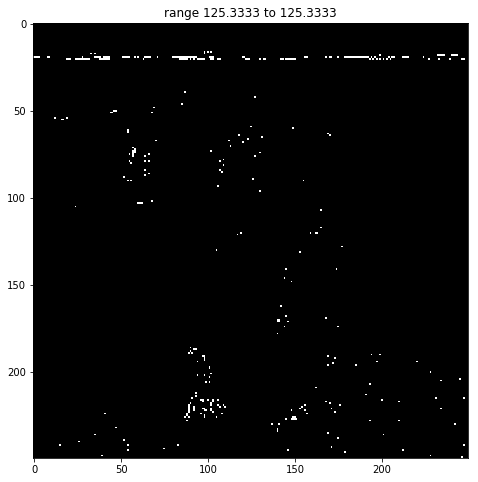

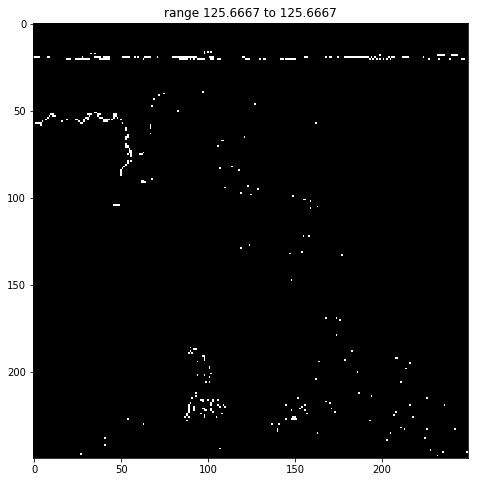

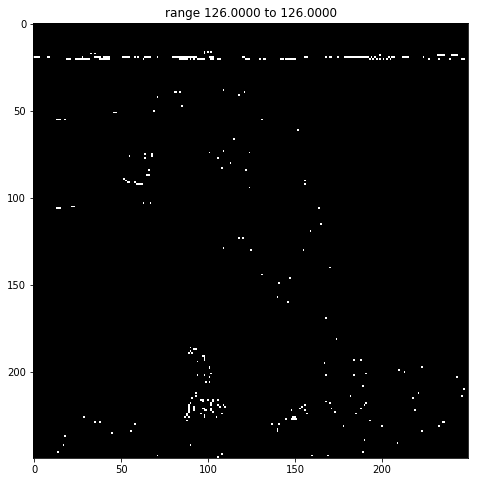

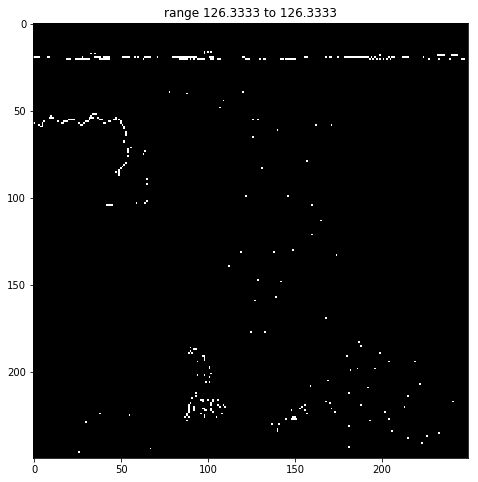

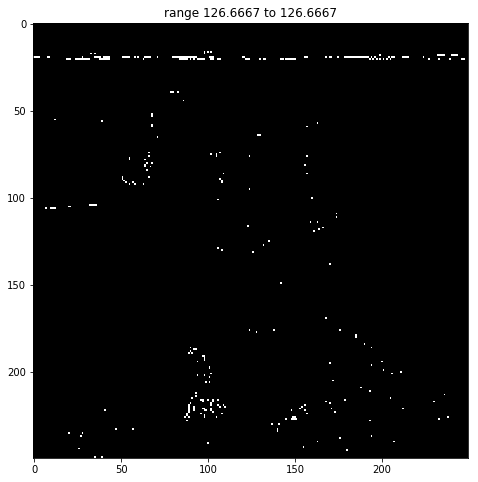

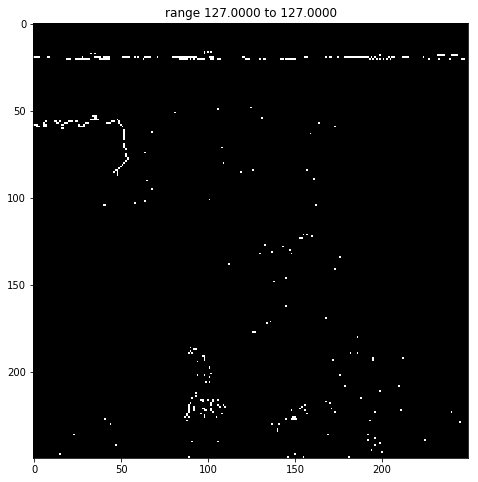

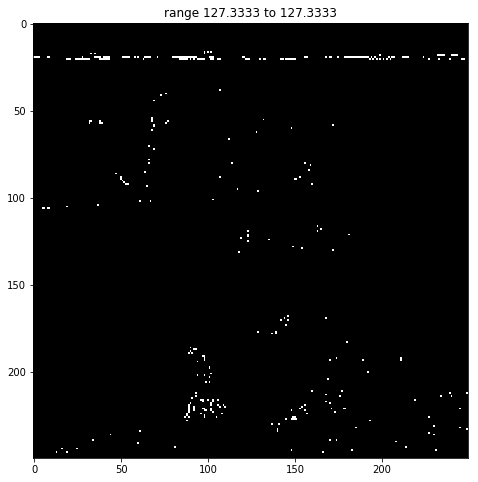

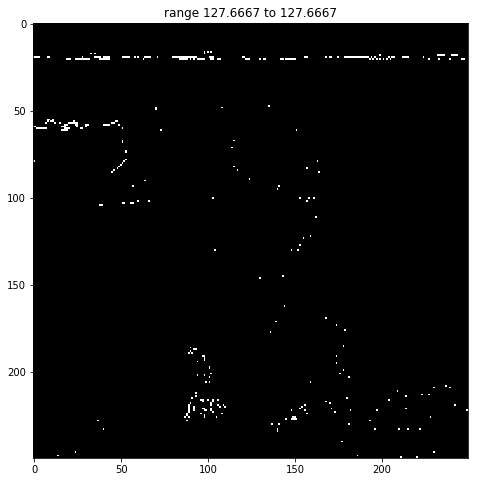

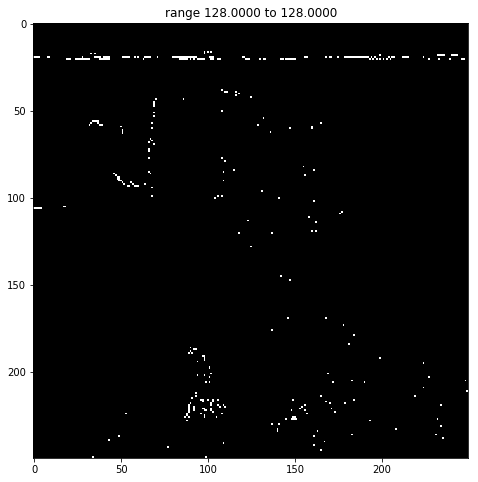

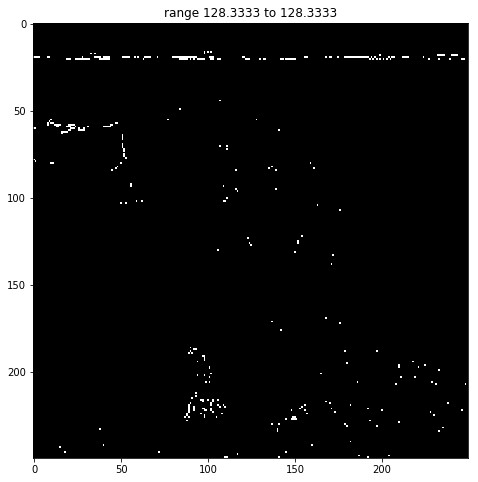

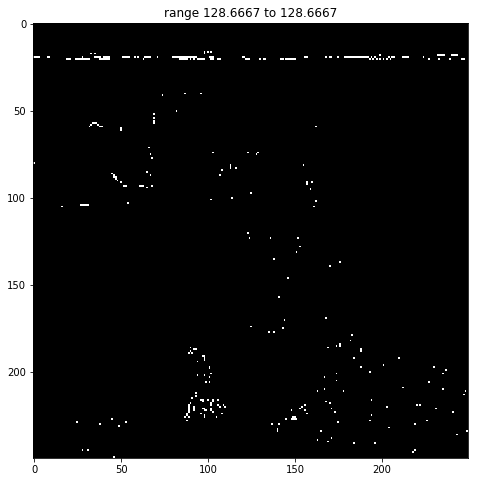

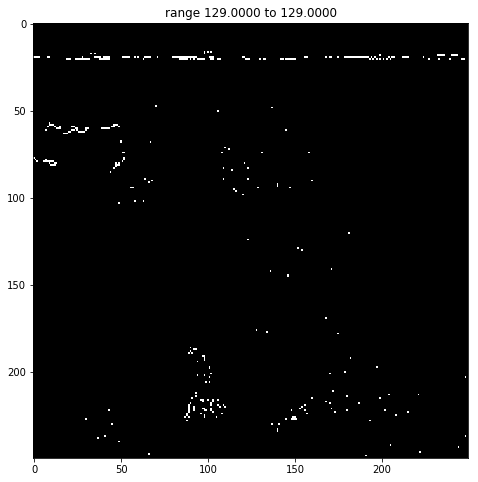

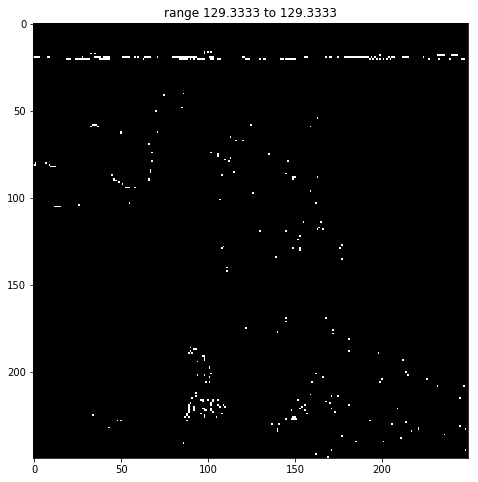

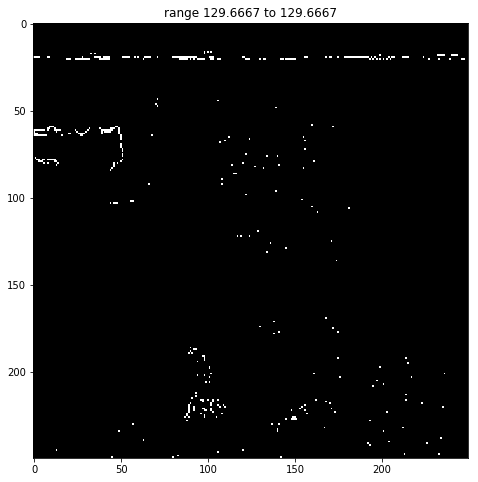

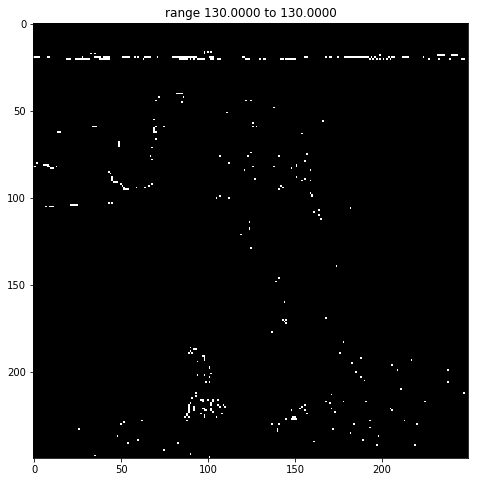

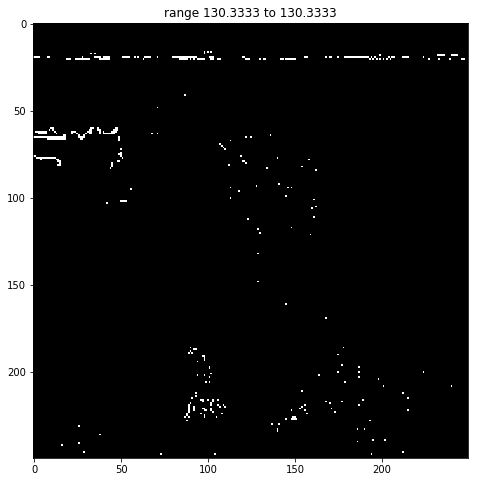

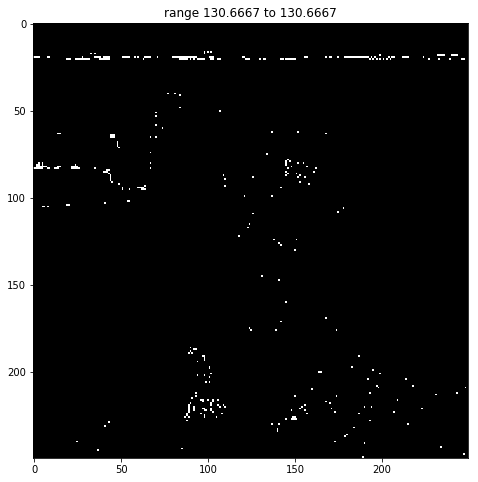

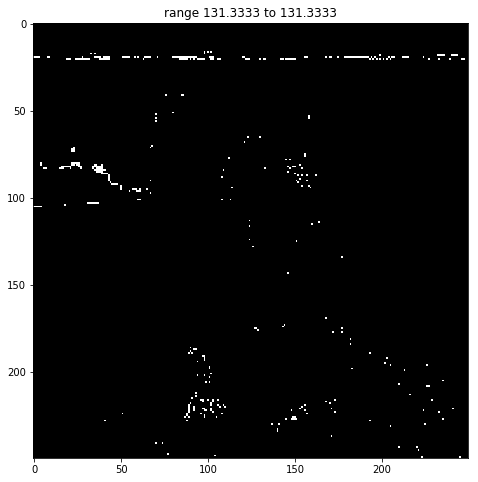

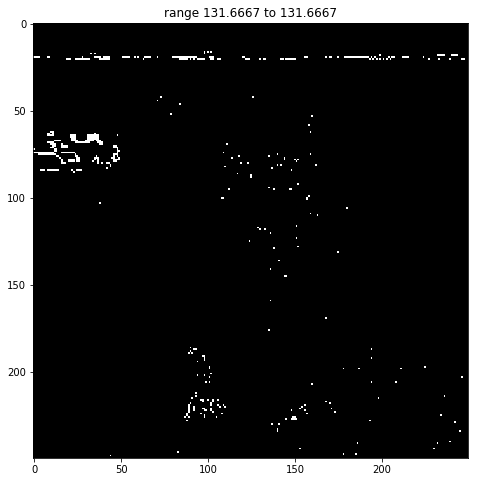

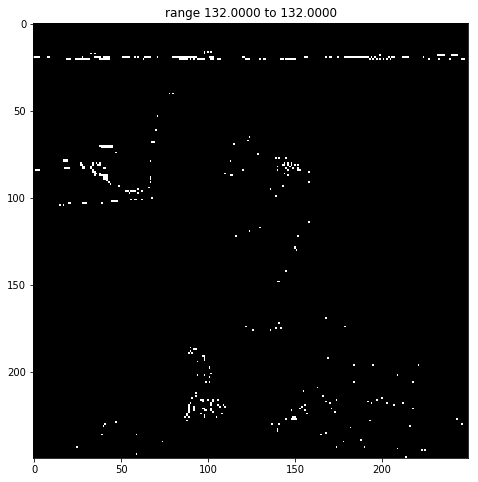

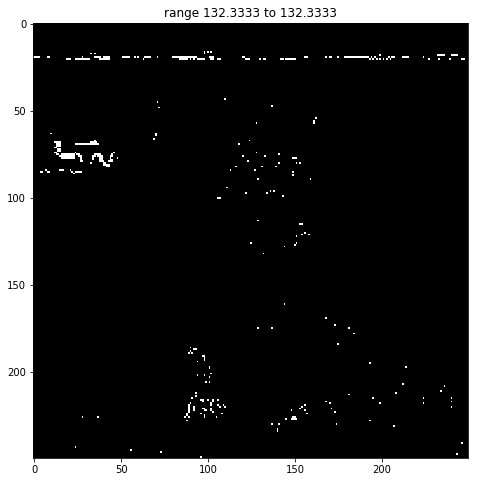

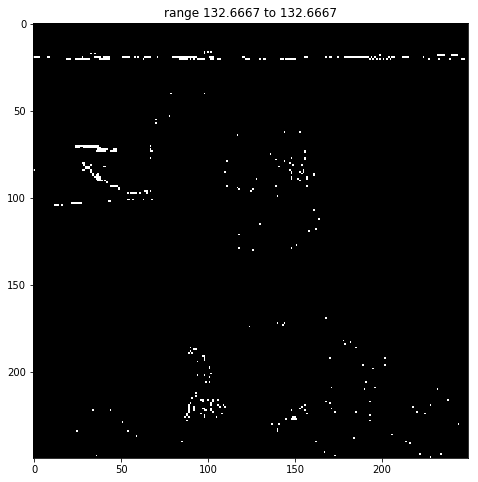

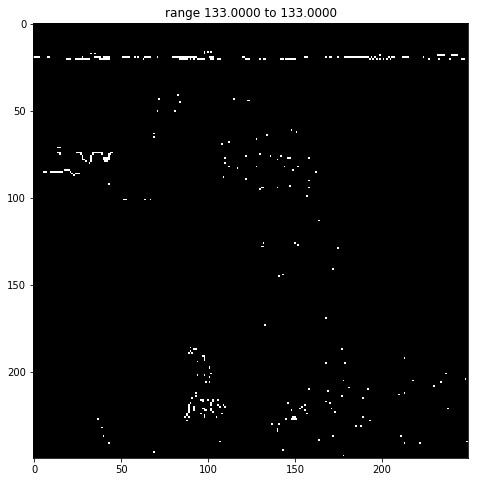

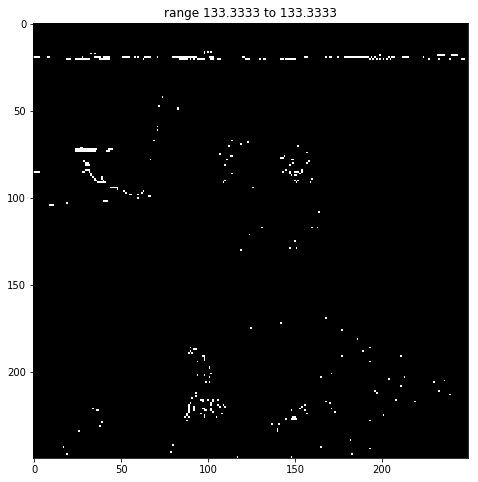

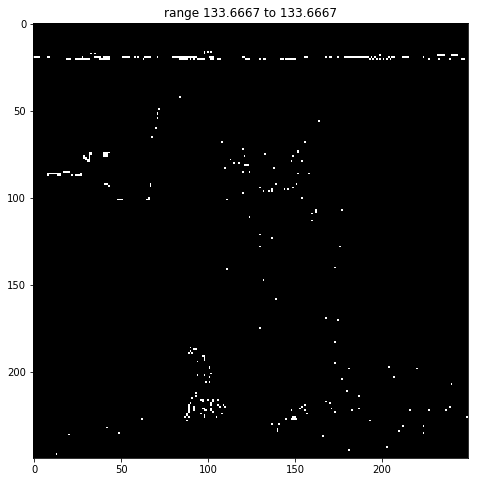

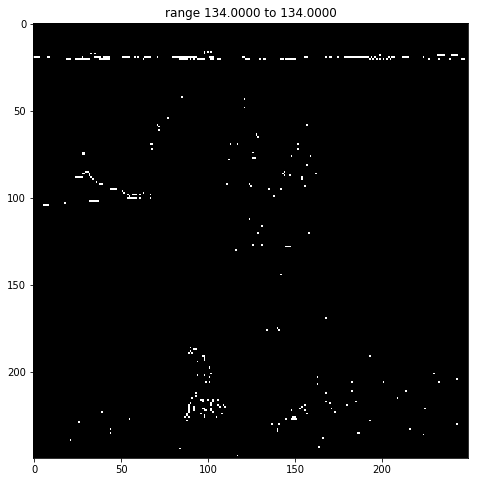

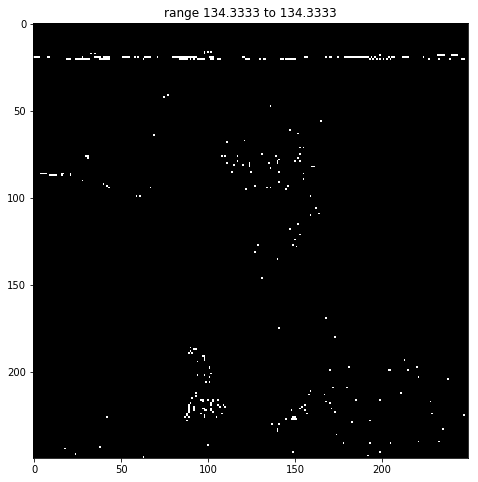

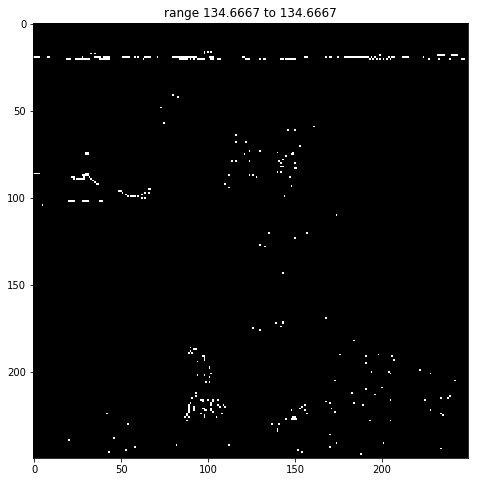

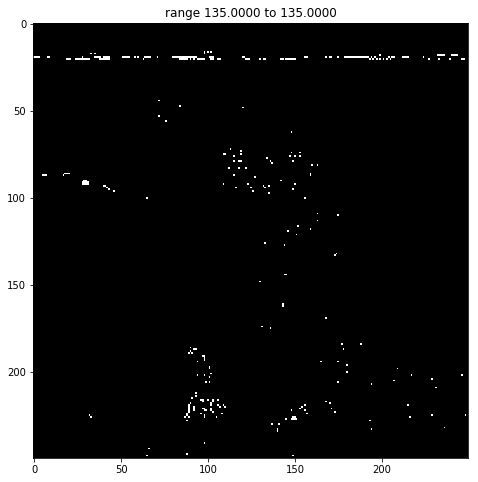

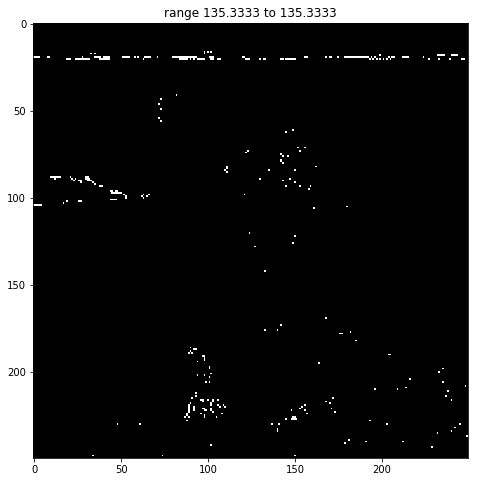

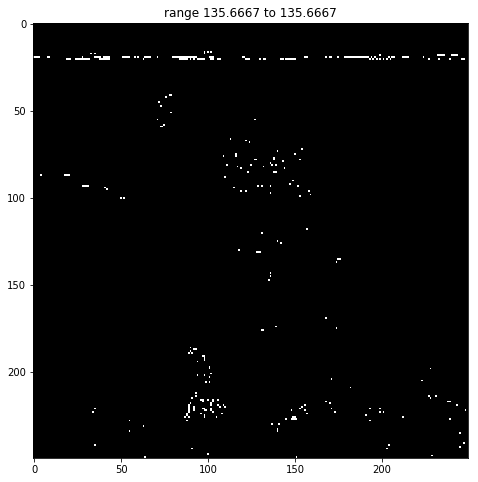

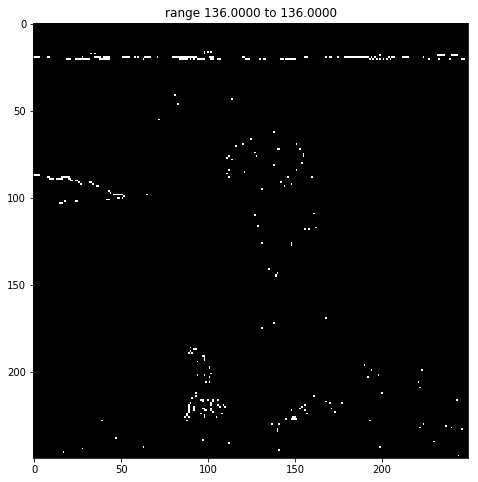

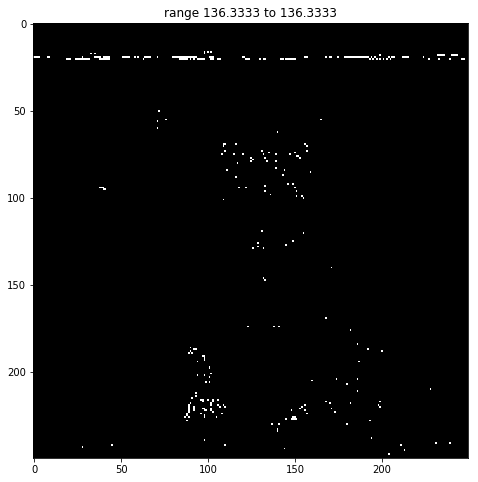

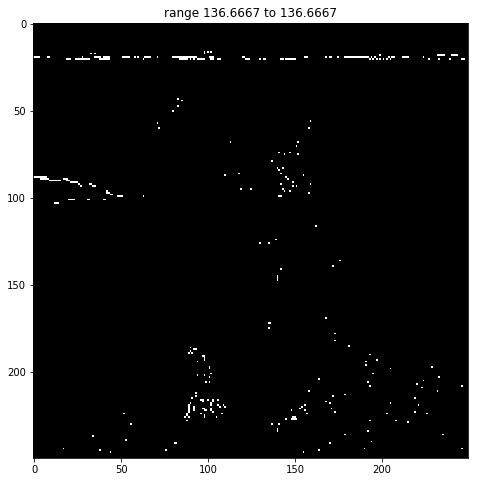

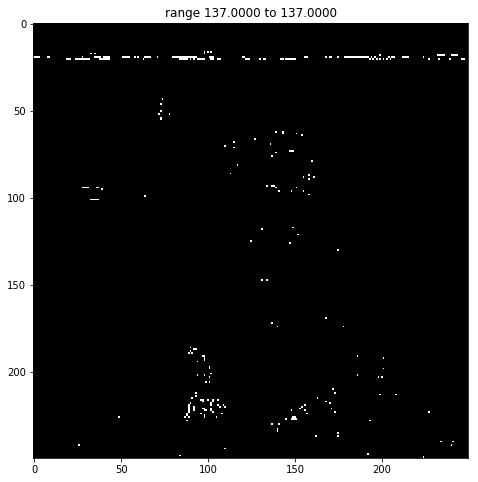

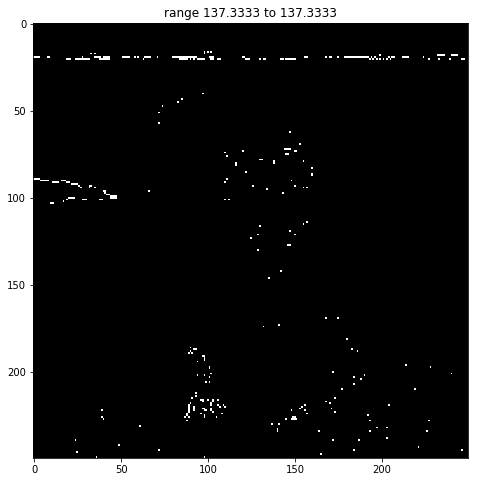

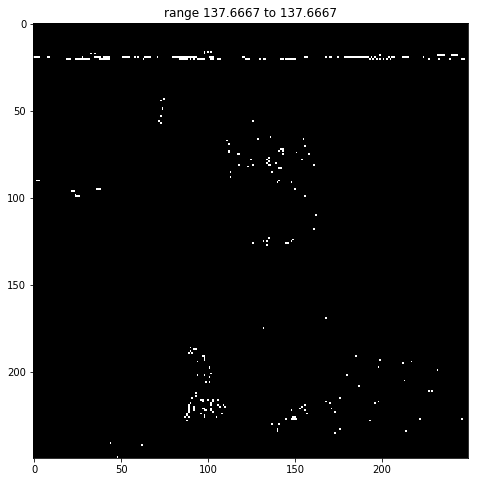

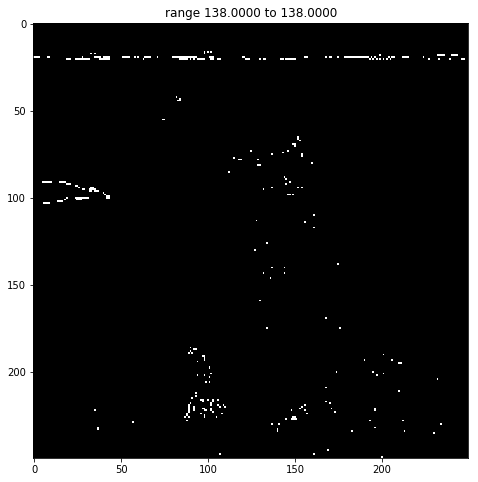

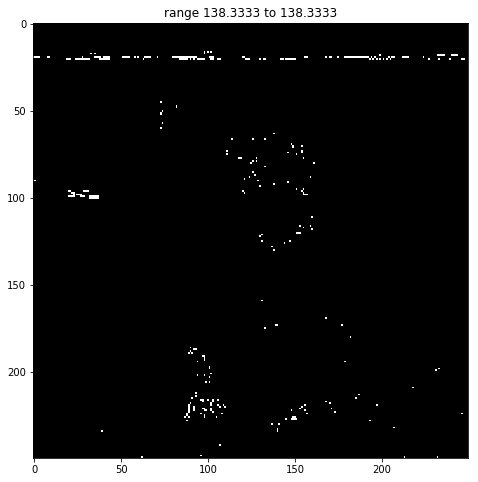

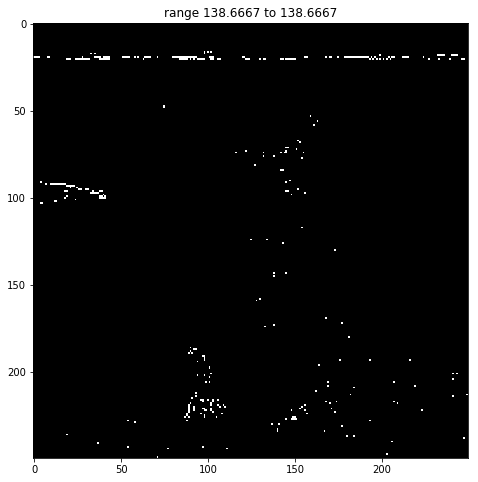

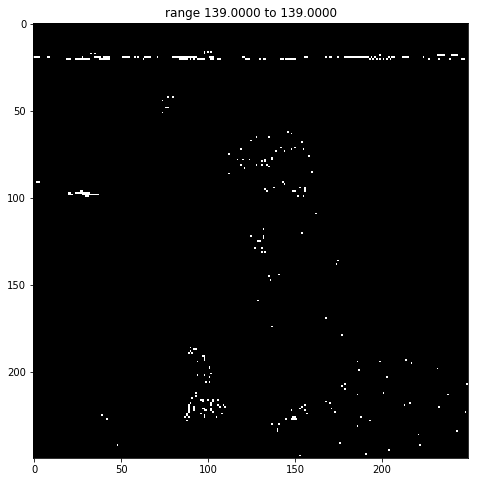

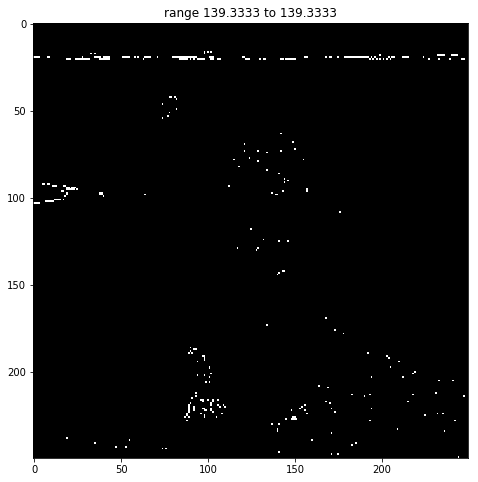

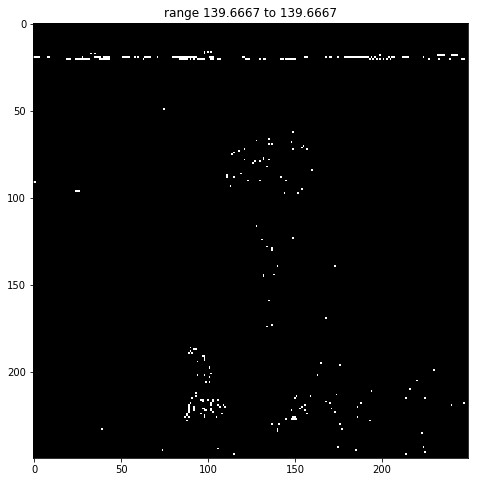

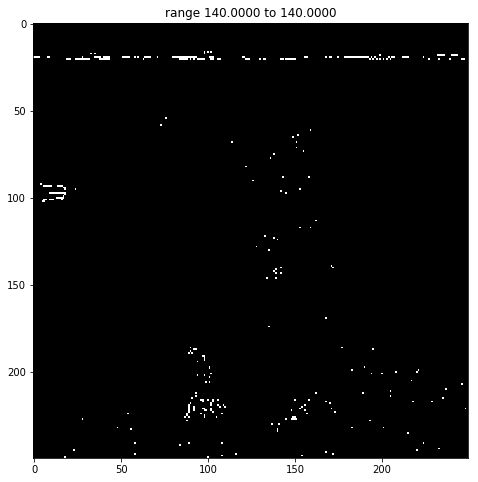

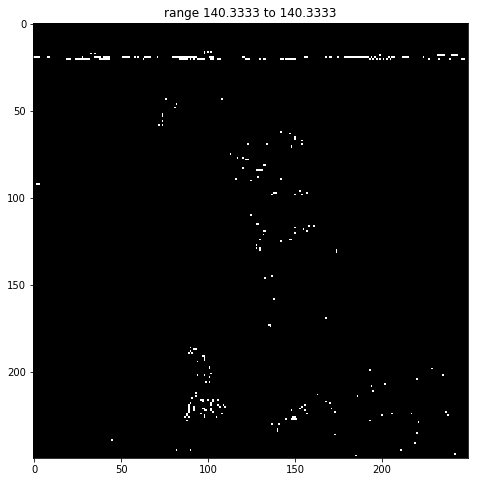

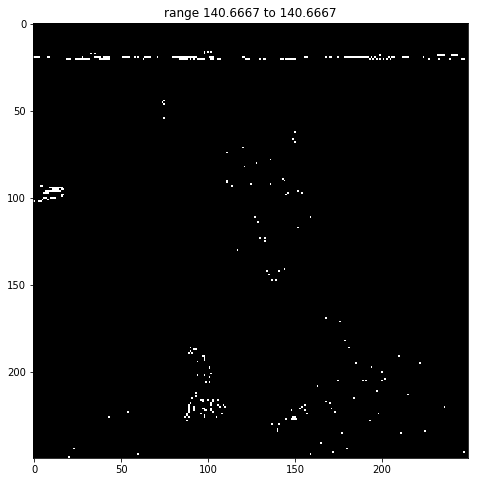

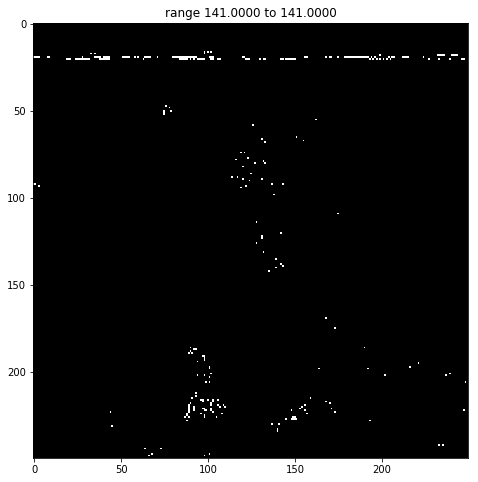

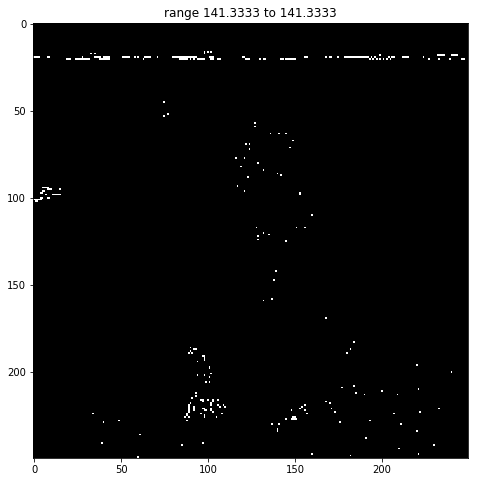

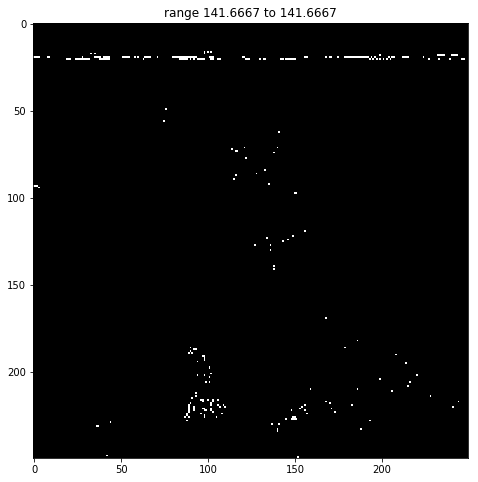

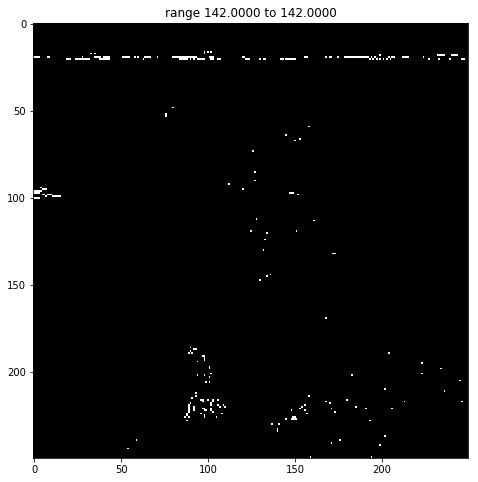

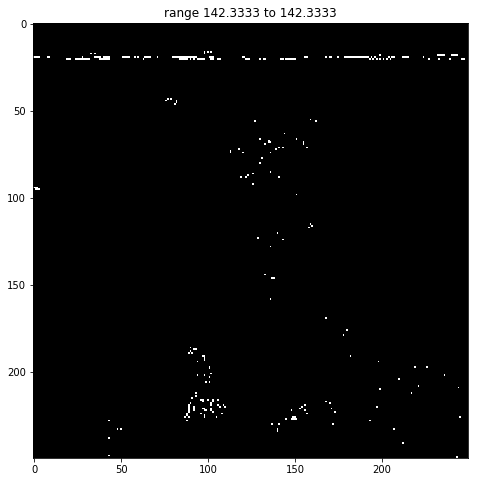

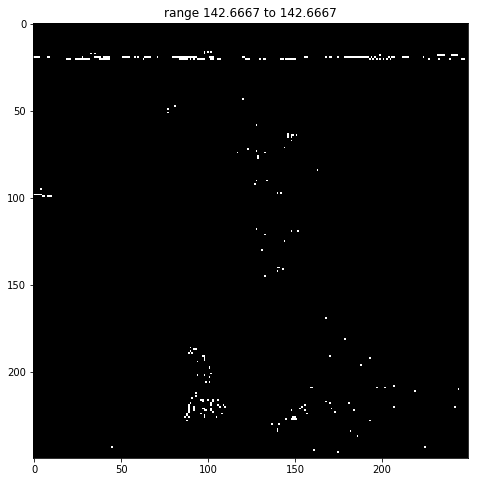

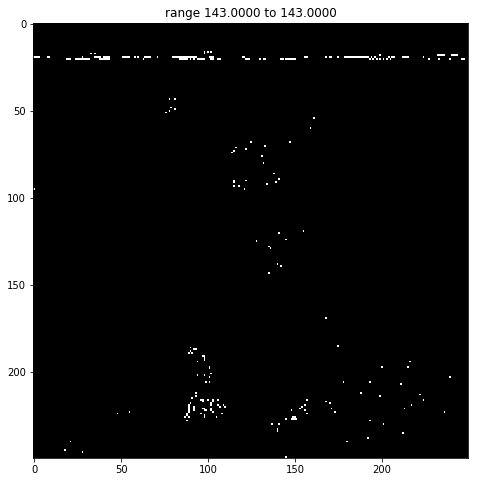

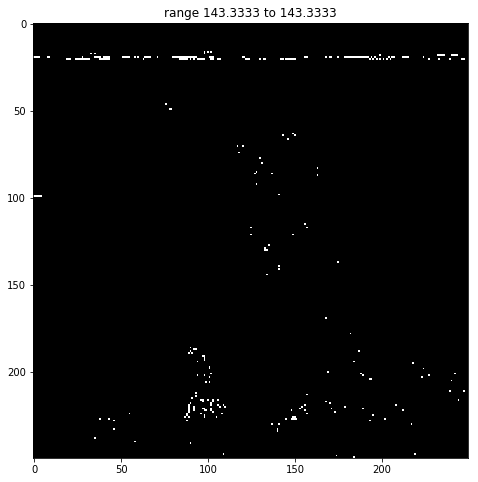

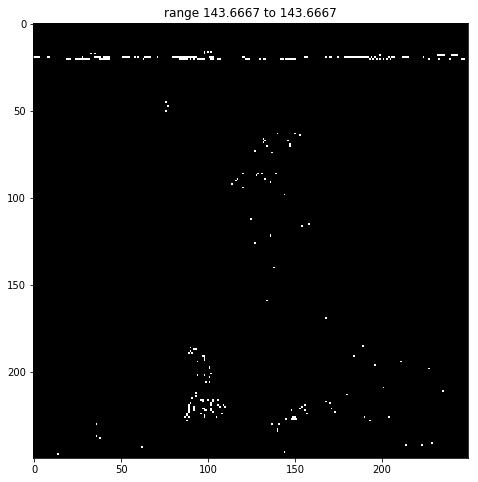

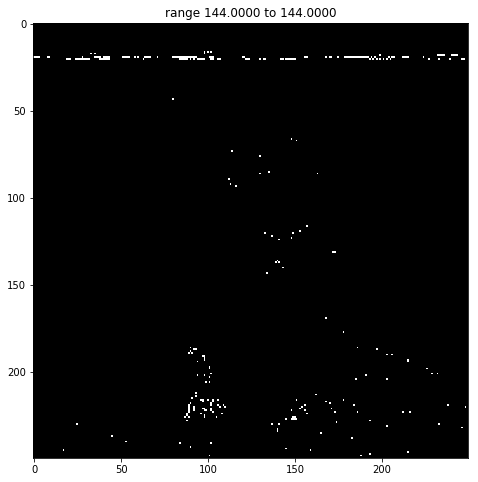

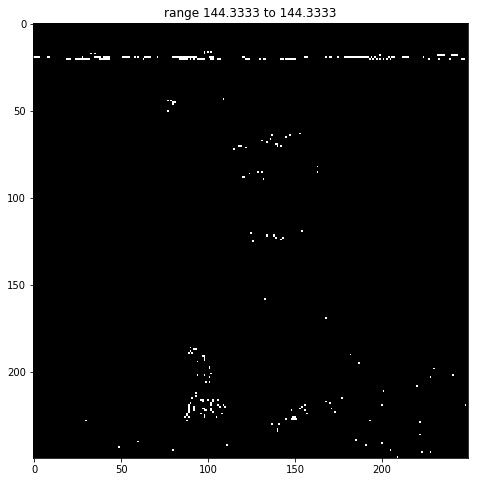

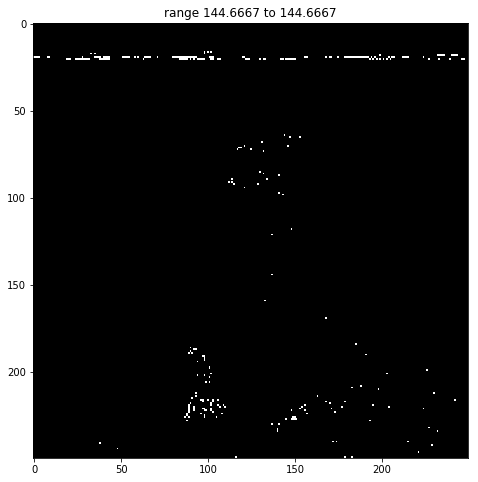

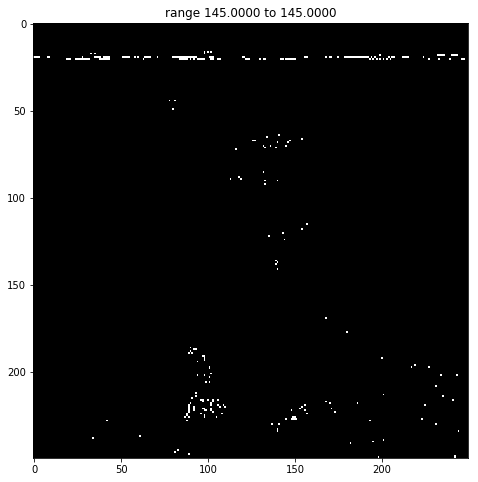

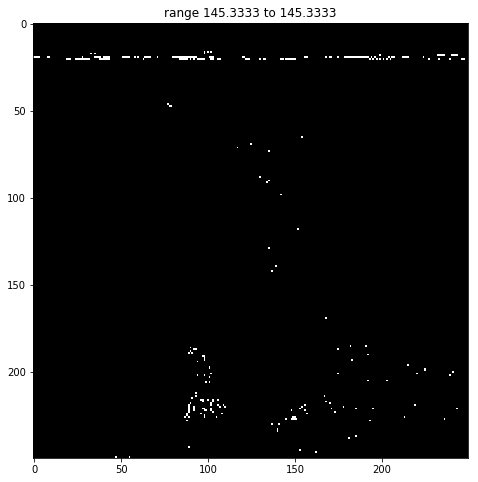

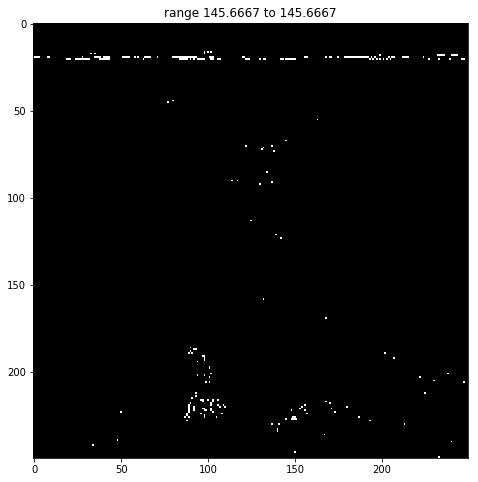

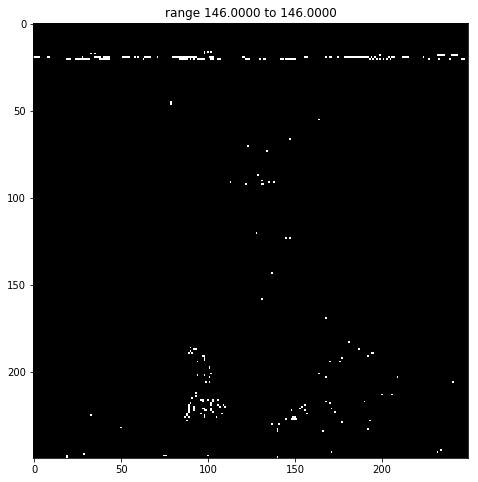

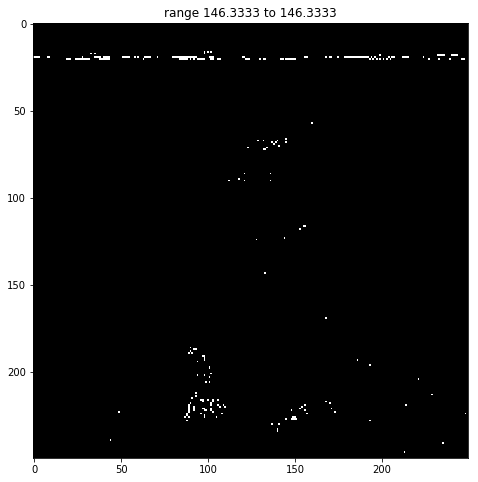

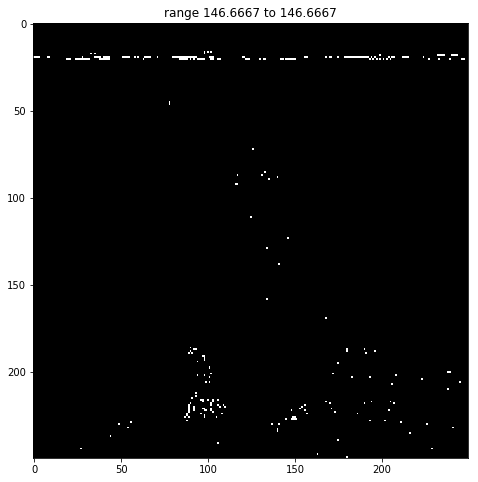

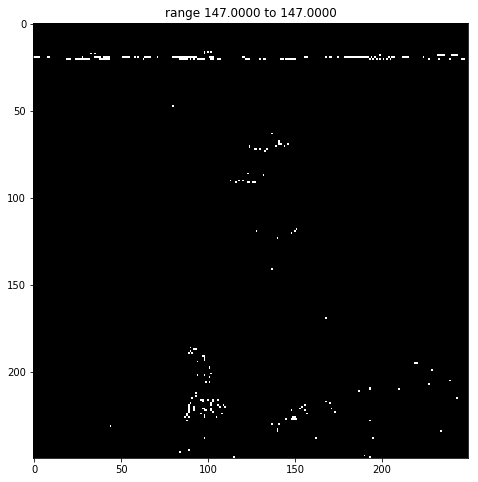

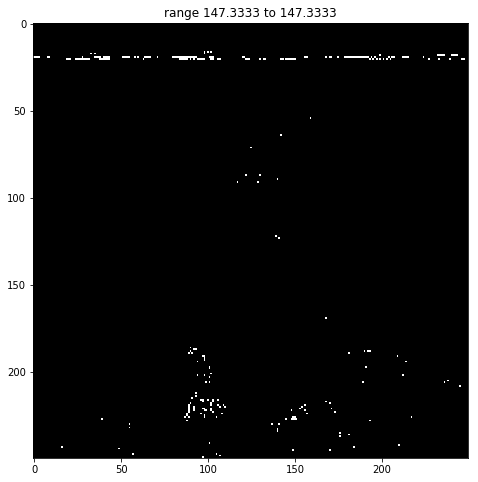

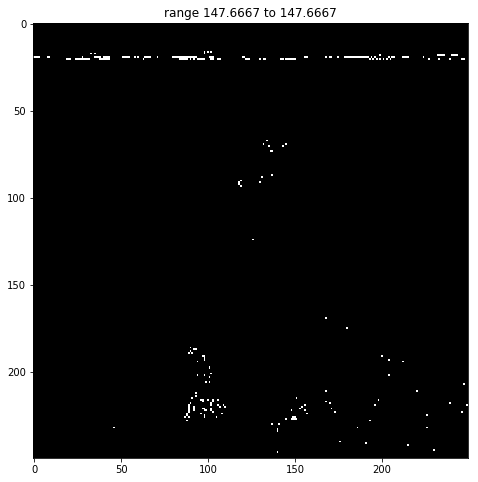

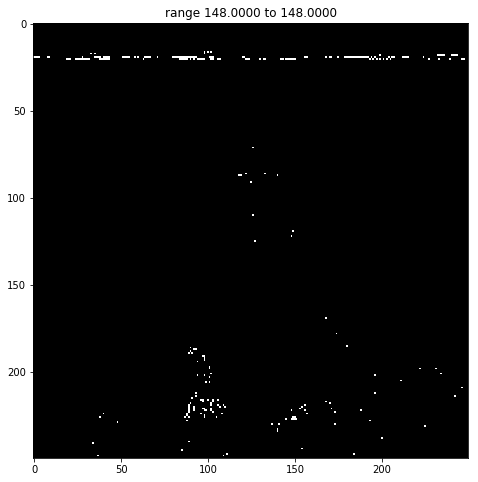

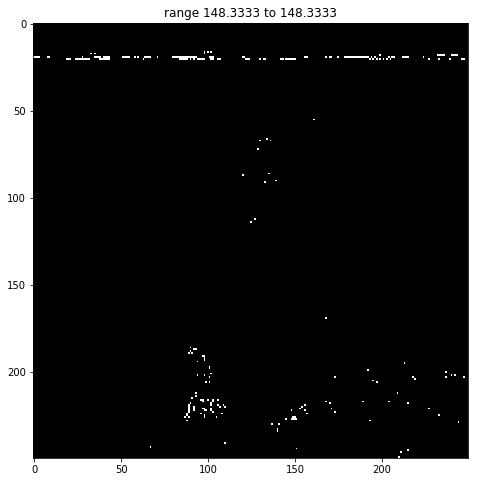

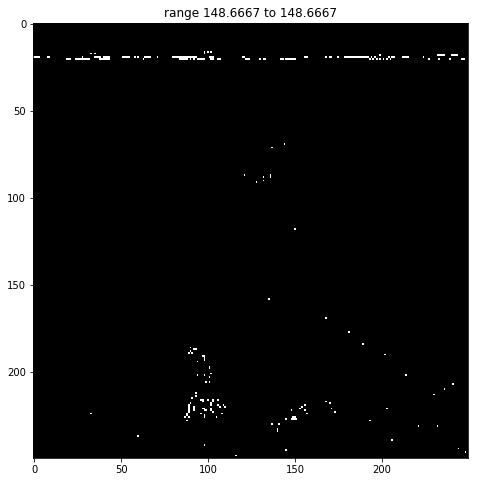

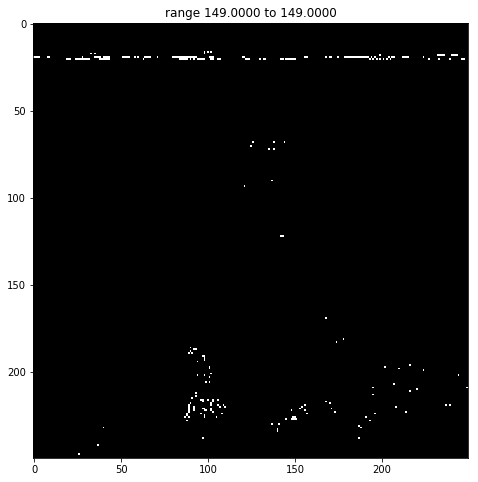

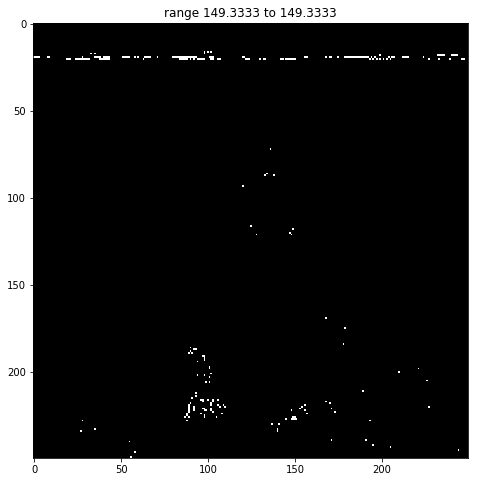

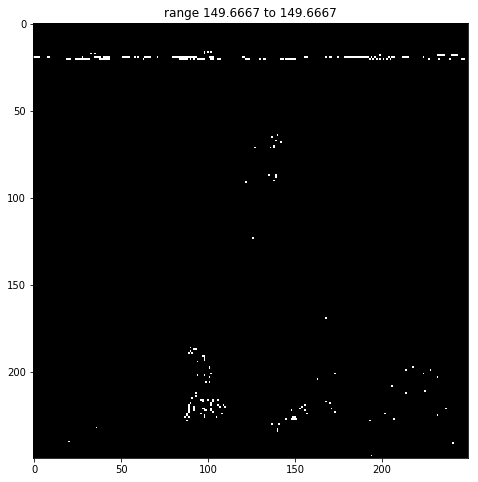

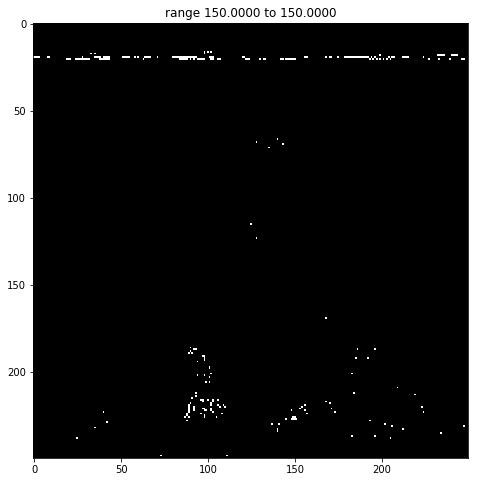

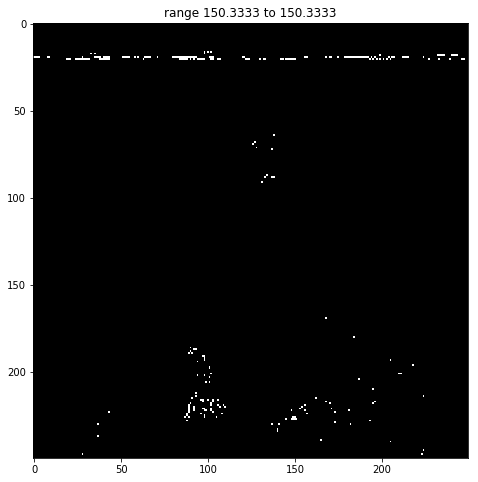

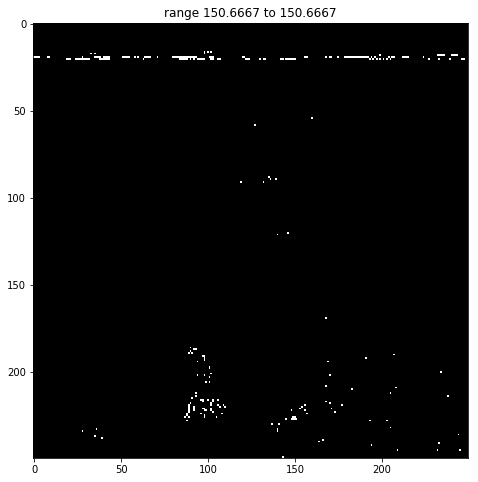

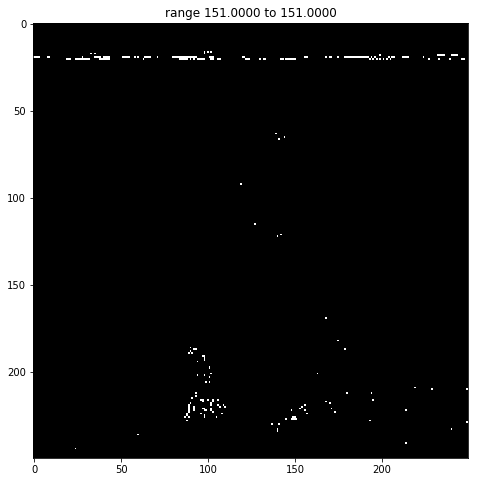

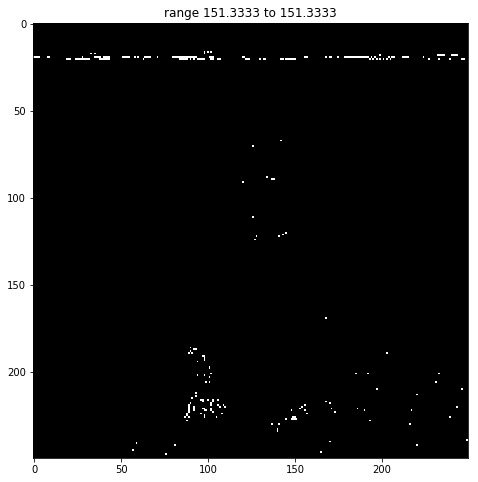

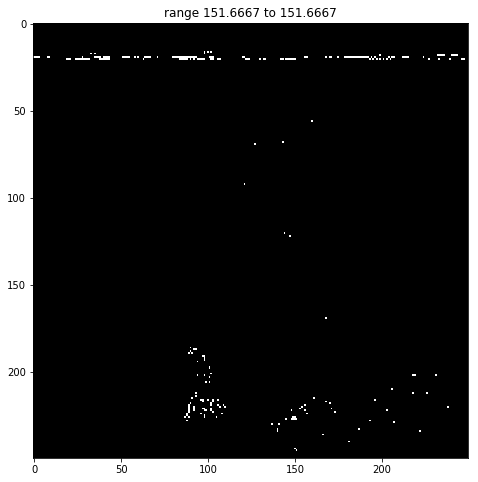

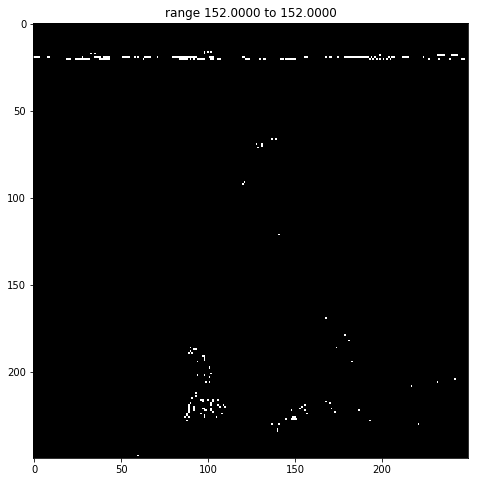

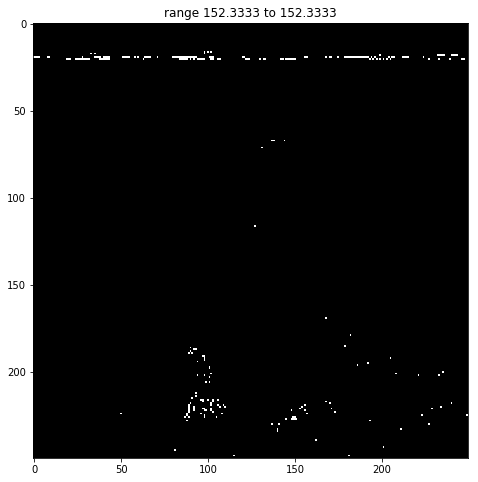

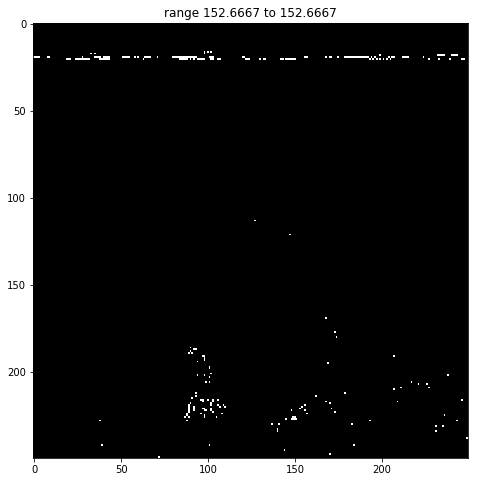

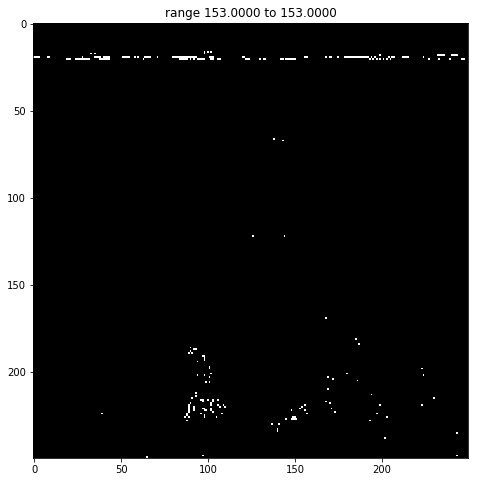

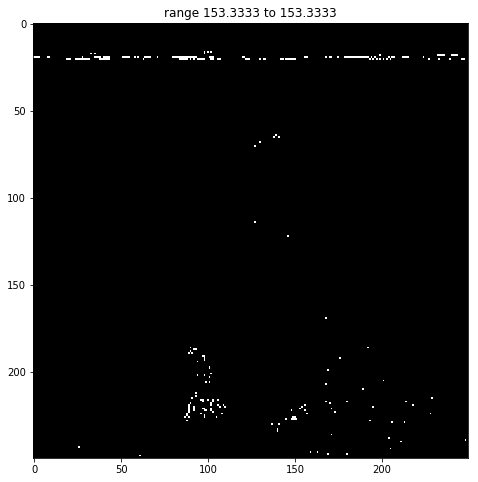

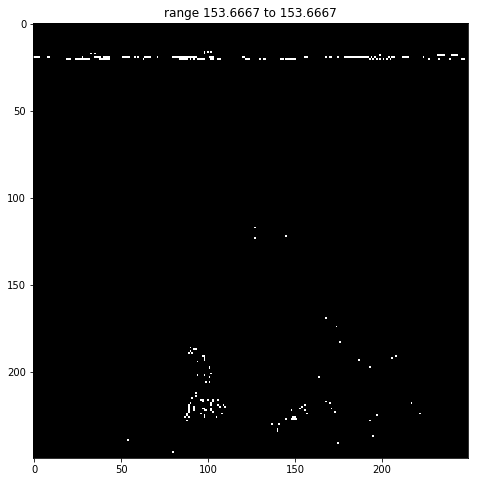

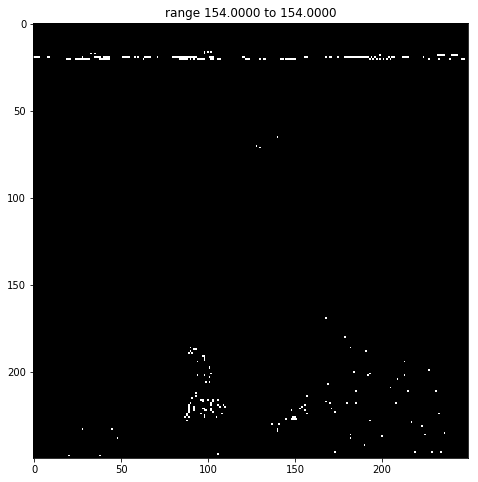

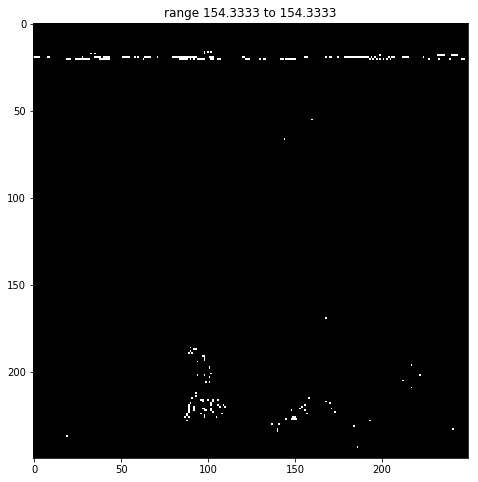

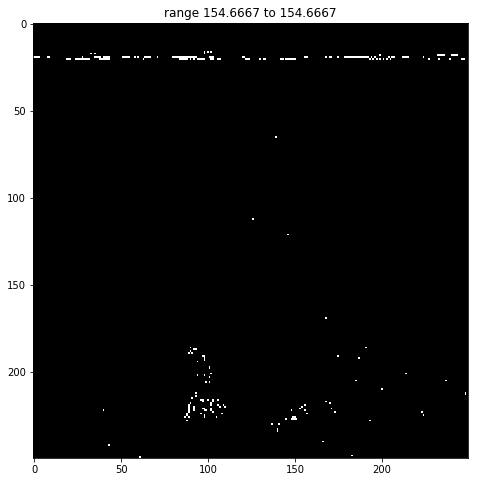

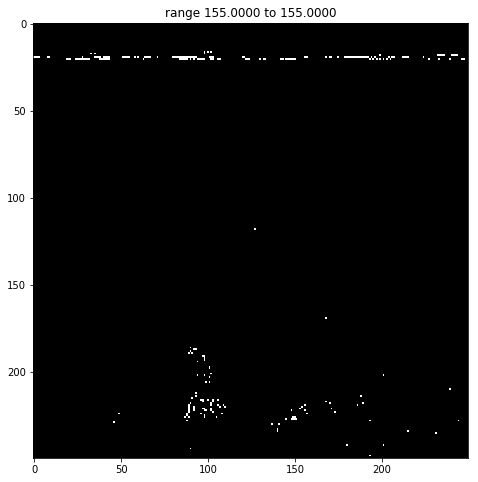

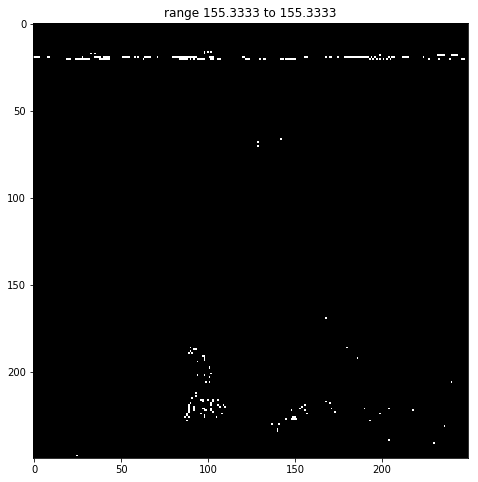

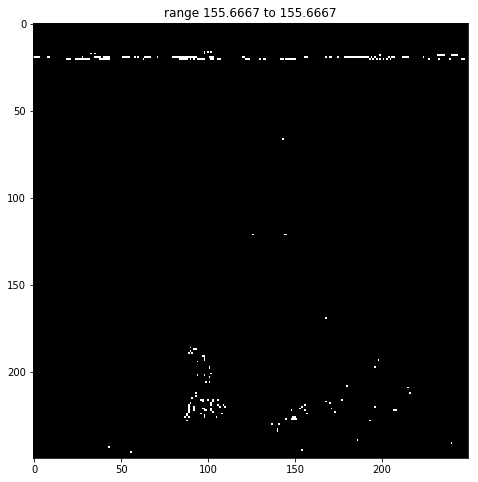

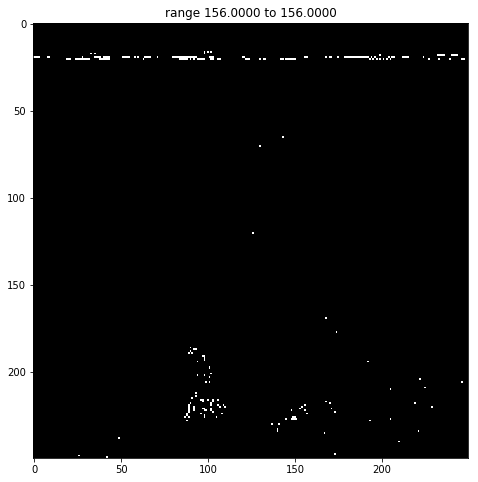

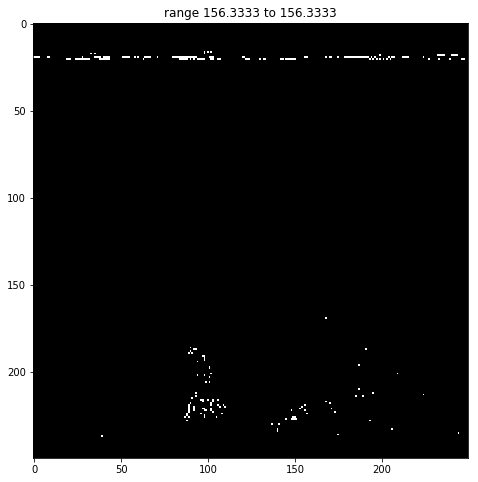

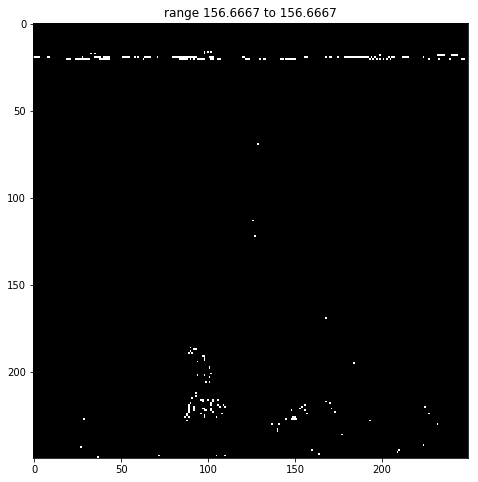

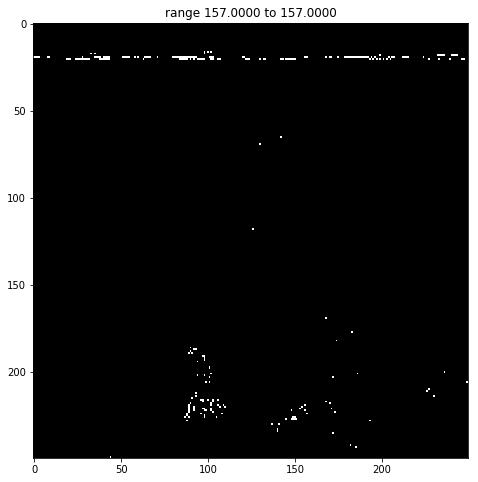

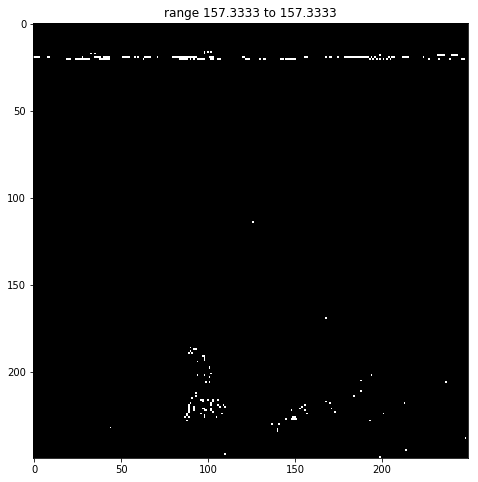

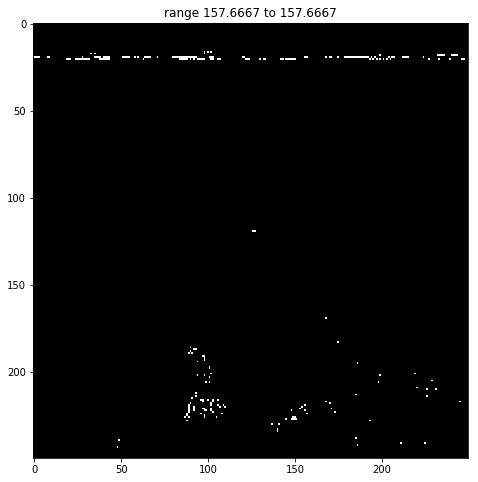

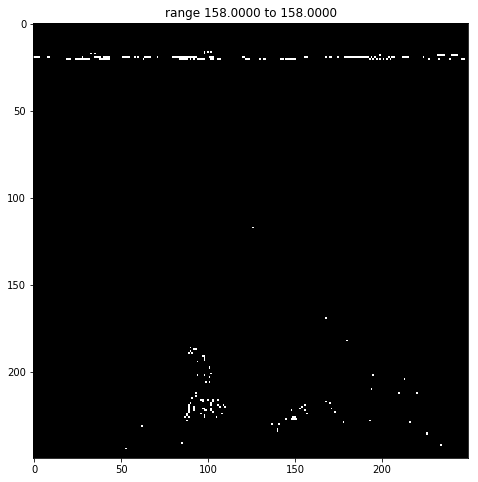

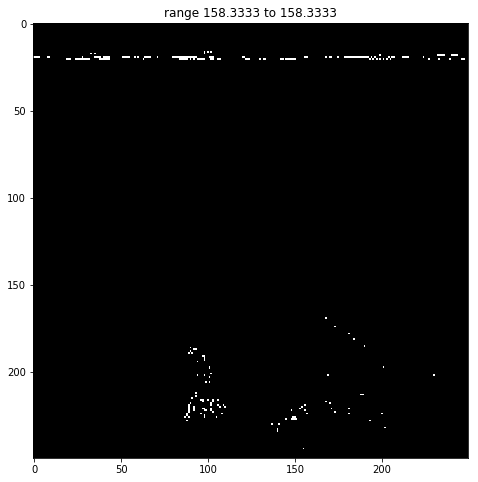

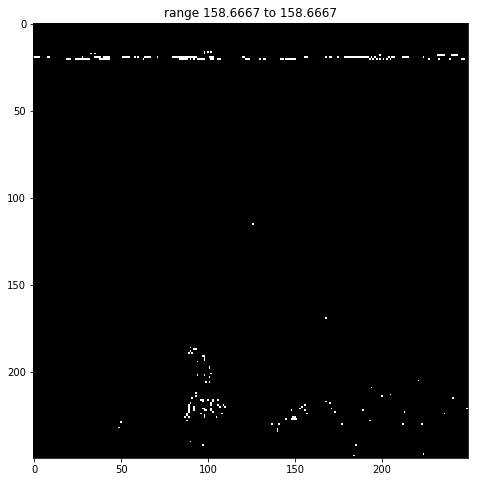

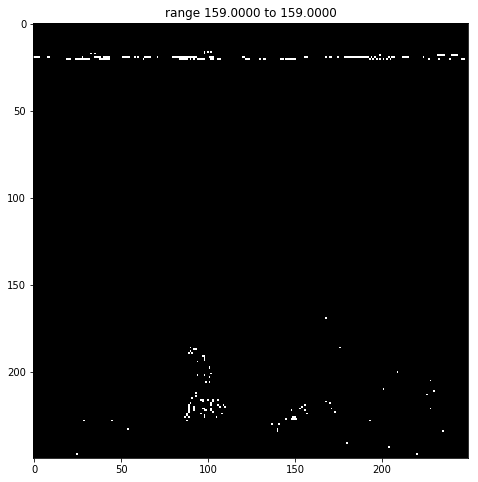

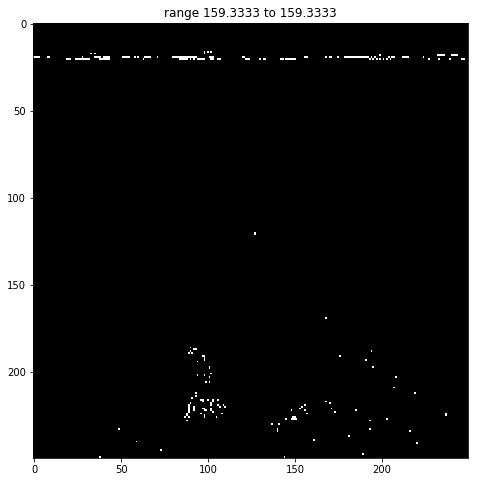

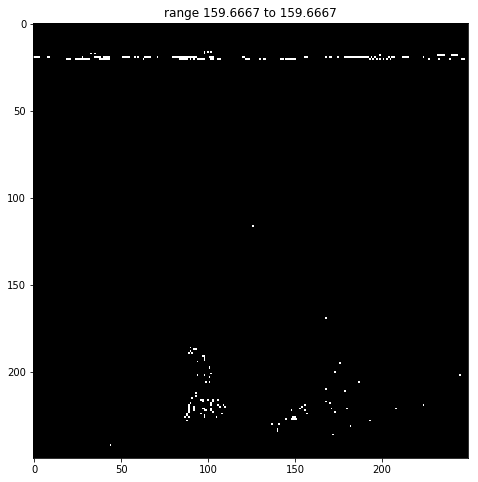

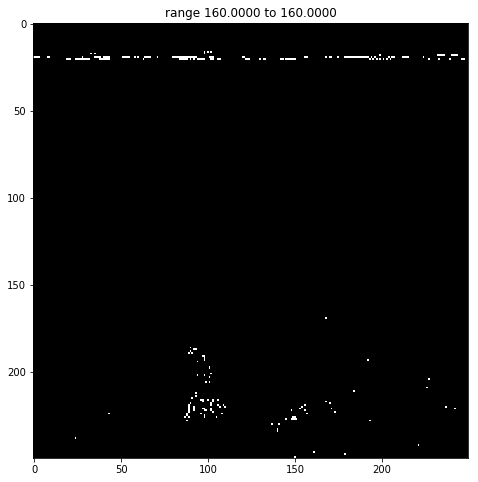

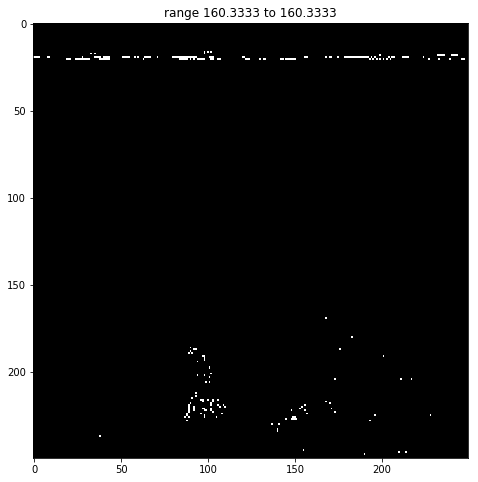

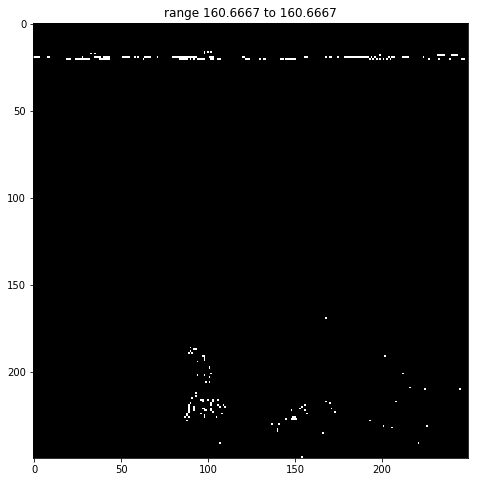

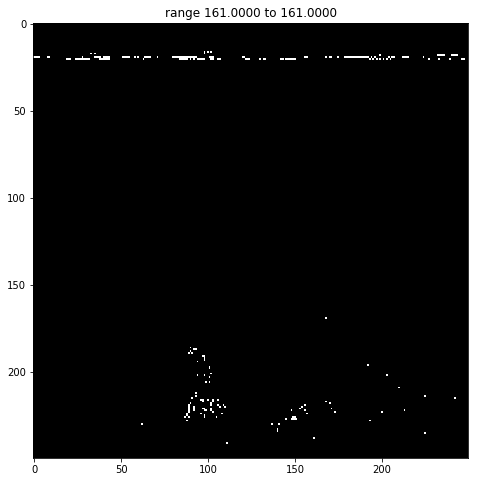

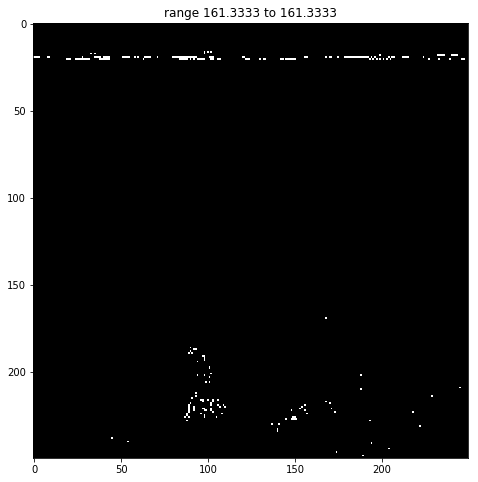

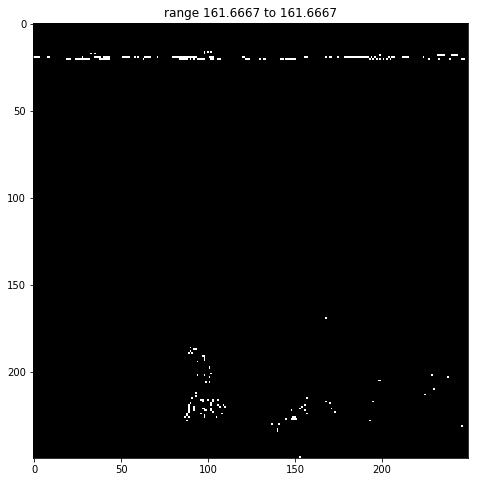

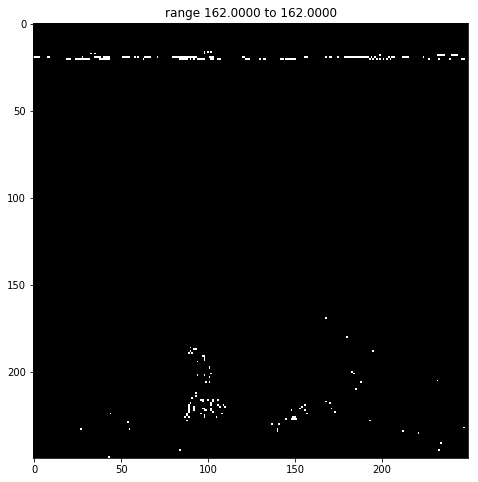

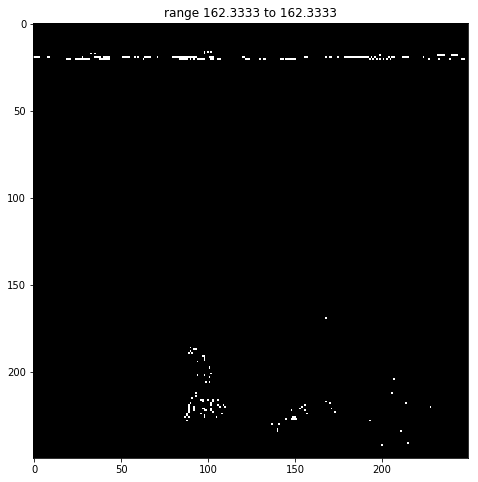

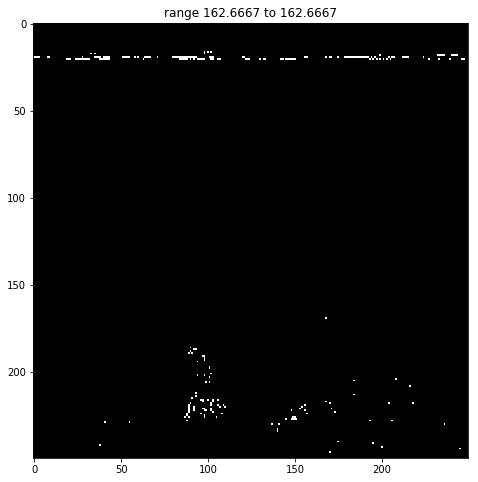

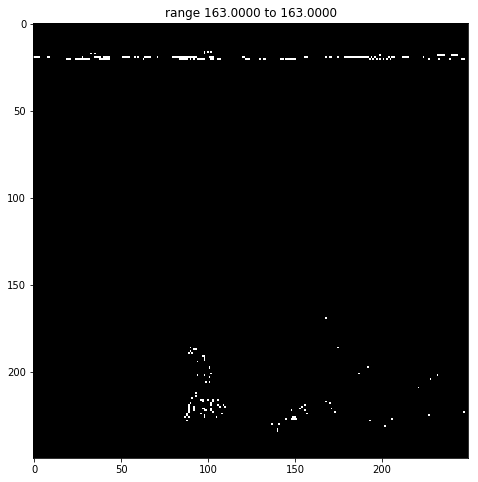

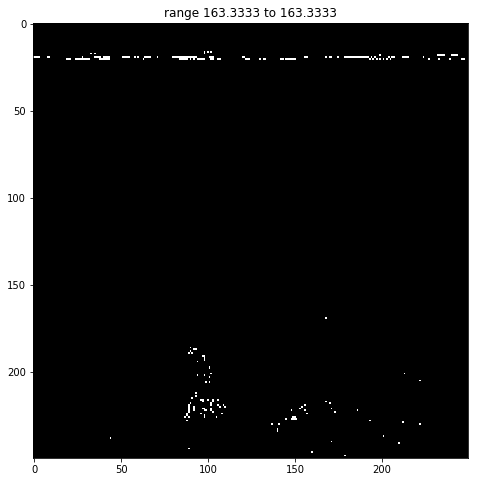

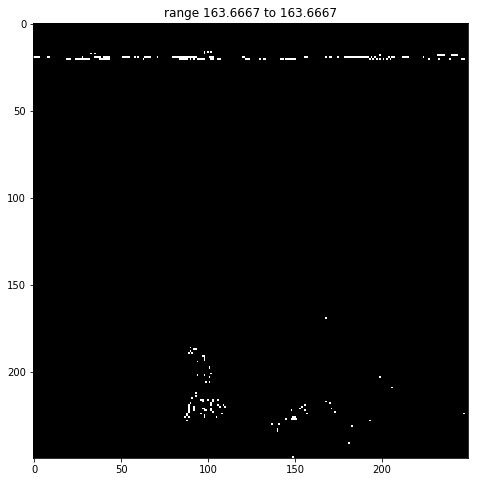

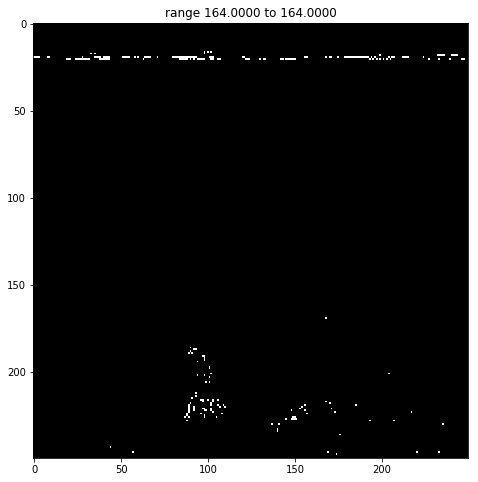

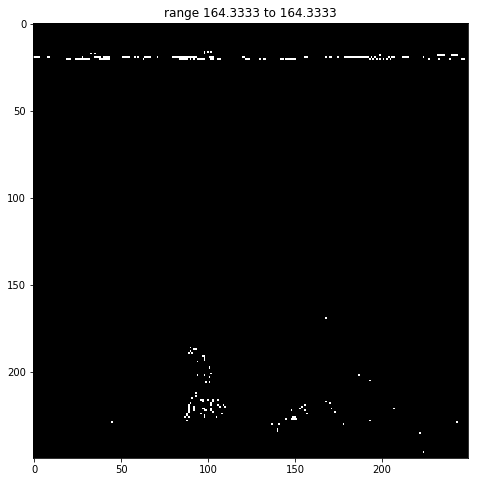

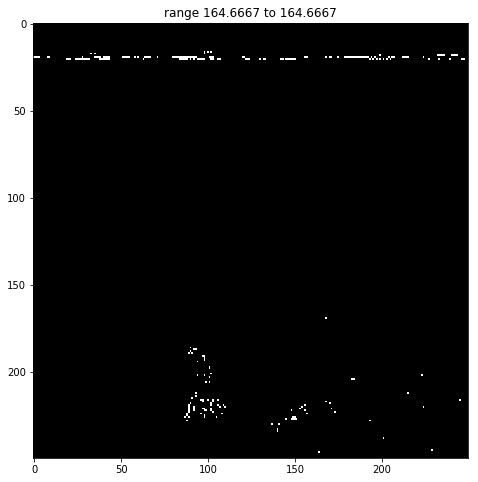

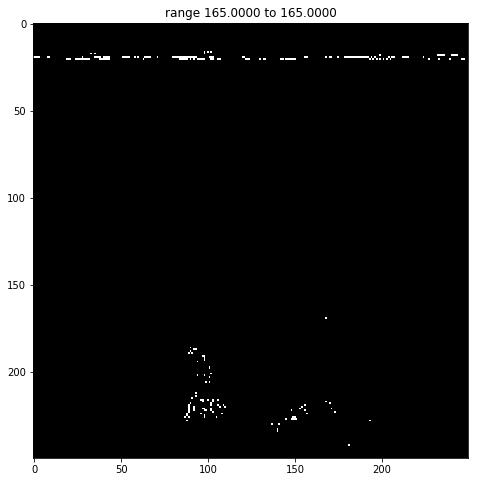

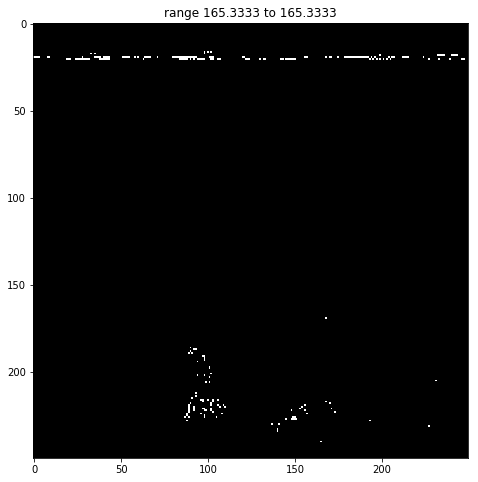

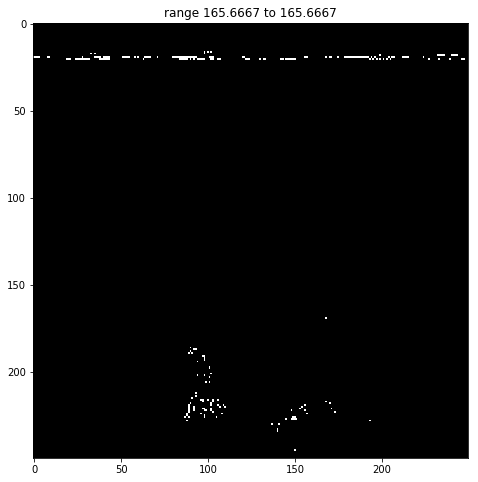

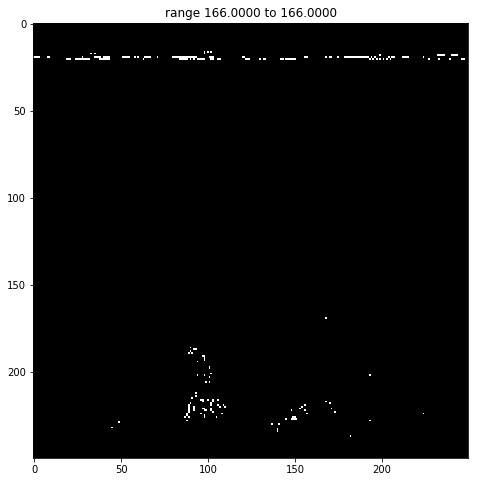

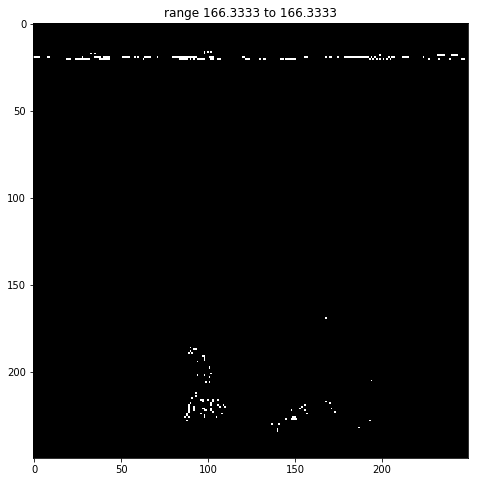

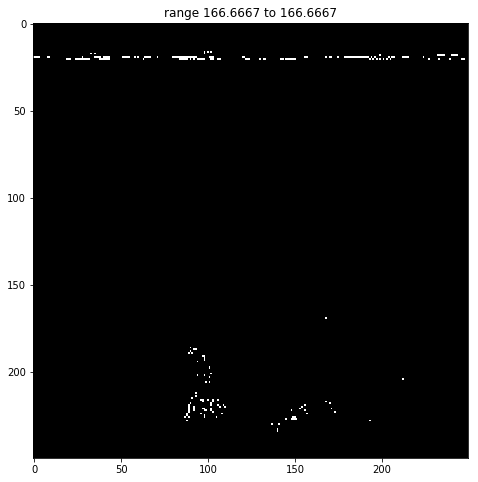

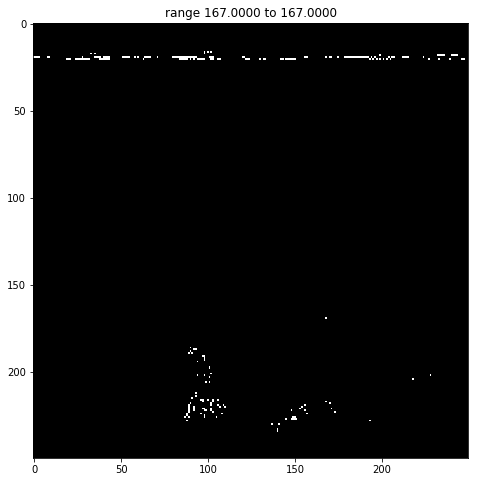

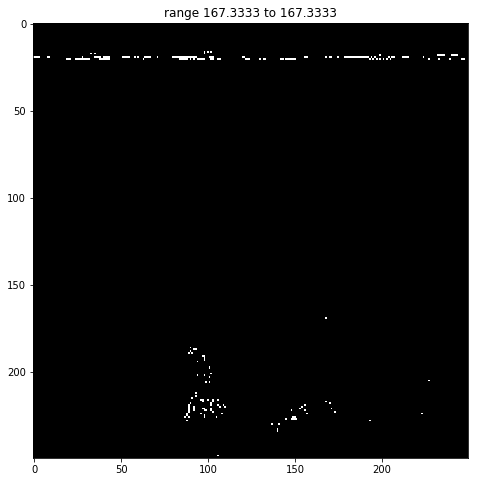

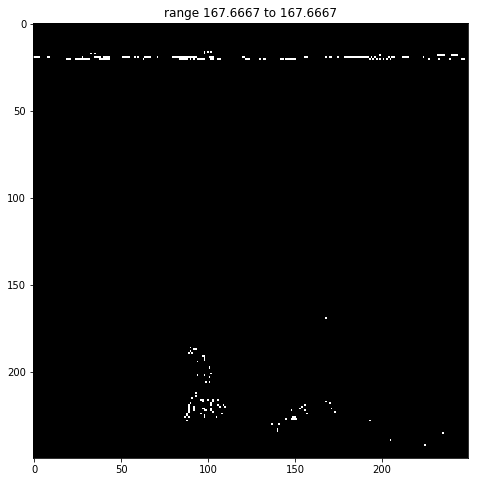

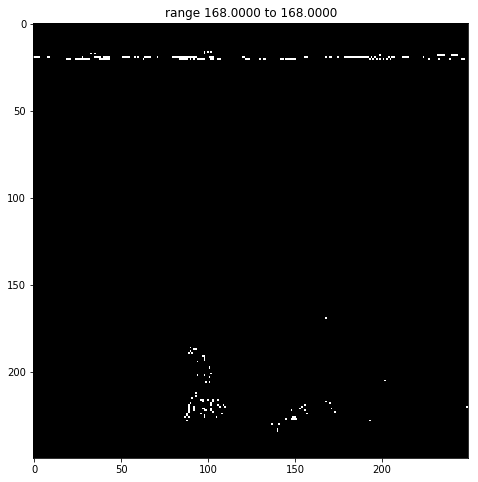

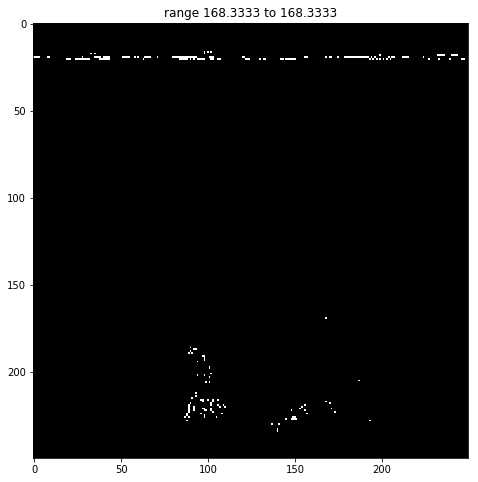

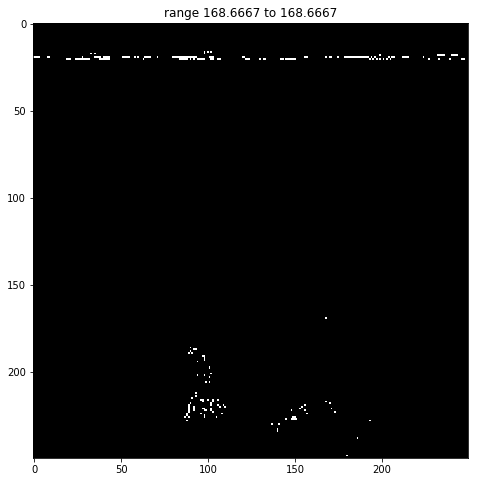

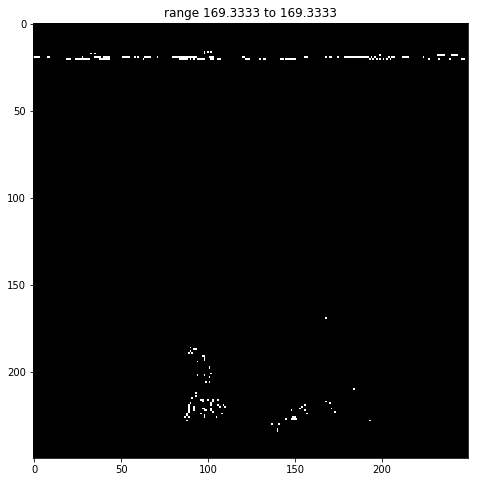

(11.87878787878788, 25.57234646217017, 37.45113434095805) (11.87878787878788, 25.57234646217017, 37.45113434095805)
class 1: 2 element(s)
 [0.33333333 0.66666667]

class 2: 9 element(s)
 [34.66666667 35.33333333 36.         36.66666667 40.66666667 41.33333333
 42.         43.33333333 44.        ]

11.87878787878788 mean


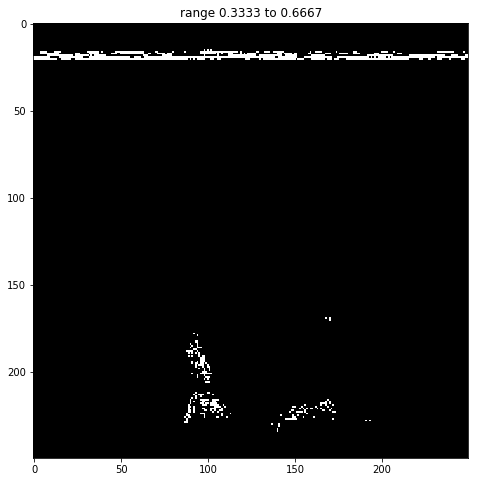

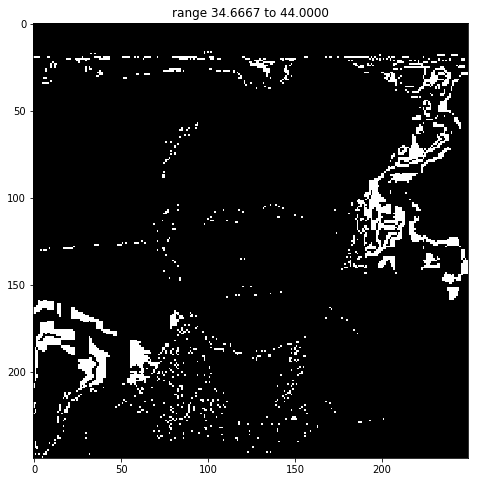

(nan, nan, nan) (nan, nan, nan)
nan mean


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice.
  del sys.path[0]
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: Mean of empty slice.
  from ipykernel import kernelapp as app


In [462]:
for i, j in lclusters:
    dfx = diffx_freqx[i:j]
    a, b = dfx[0], dfx[-1]
    
    diff = image_1d_sorted
    diffx = image_1d_sorted_unique

    diffx = np.array([iu for iu in diffx if a <= len(diff[diff == iu]) <= b], dtype=np.float64)

    image_1dx = np.sort(np.unique(diffx))
    diff = abs(np.diff(image_1dx))

    meancd = diff.mean()
    
    print((diff.mean(), diff.std(), diff.mean()+diff.std()), (diff[diff > 0].mean(), diff[diff > 0].std(), diff[diff > 0].mean()+diff[diff > 0].std()))
    
    # the clusters
    clusters = []

    a = 0
    class_pop = []
    cp = 0
    for i in range(len(diff)):
        cp += len(image_1d[image_1d == image_1dx[i]])
        if diff[i] >= meancd or i == len(diff)-1:
            b = i+1

            # save a cluster
            clusters.append((a, b))
            class_pop.append(cp)
            cp = 0

            print('class {}: {} element(s)\n {}\n'.format(len(clusters), b-a, image_1dx[a:b]))

            a = b


    class_pop = np.array(class_pop, dtype=np.float64)
    print(meancd, 'mean')
    
    for i, j in clusters:
        fig=plt.figure(figsize=(8, 8))
        w, h, rows, columns = 10, 10, 1, 1

        image_cl = image.copy()
        clx = image_1dx[i:j]

    #     print(lpi, i, j)

        for cl in clx:
            image_cl[image_cl == cl] = 1
        image_cl[image_cl != 1] = 0

        li = [0, image_cl]

        for k in range(1, columns*rows +1):
            ax = fig.add_subplot(rows, columns, k)
            ax.set_title('range {:.4f} to {:.4f}'.format(clx[0], clx[-1]))
            plt.imshow(li[k], cmap='gray')

        plt.show()
    
#     break

In [468]:
img = li[k].astype(np.uint8)
ret, labels = cv2.connectedComponents(img)
labeled_img = imshow_components(labels)
labels

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0, 447,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=int32)

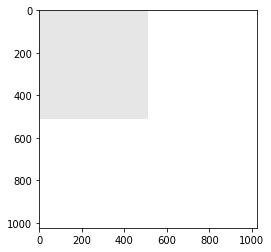

In [481]:
img = np.full((1024, 1024, 3),  255)
img[0:512, 0:512, :] = 230
plt.imshow(img)

In [589]:
m1 = np.array([abs(x-a).mean() for a in np.unique(x)], dtype=np.float64)
m1.mean()

30.61728395061728

In [564]:
xx = image.copy()
m2 = abs(np.diff(xx)).mean(1).mean()
mm2 = abs(np.diff(xx.T)).mean(1).mean()
m2, mm2

(7.021203438395414, 6.199061976549414, 6.610132707472414)

In [843]:
# image_name = '75oB8.png'
# image_name = 'image.jpg'
image_name = 'b.jpg'
# image_name = 'semicolon.png'
# image_name = 'ds4s2.png'
# image_name = 'WIN_20190827_16_26_09_Pro.jpg'

image = load_image('dump/{}'.format(image_name))

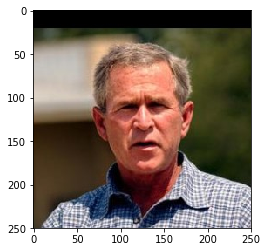

In [844]:
plt.imshow(image.astype(np.uint8))

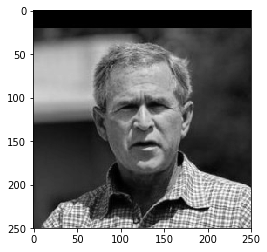

In [845]:
image = toGrey(image)
plt.imshow(image.astype(np.uint8), cmap='gray')

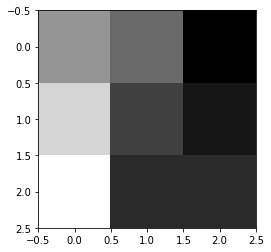

In [846]:
plt.imshow(image[53:56, 177:180].astype(np.uint8), cmap='gray')

In [847]:
x = image[53:56, 177:180].copy()
x

array([[76.66666667, 74.        , 69.66666667],
       [79.        , 72.33333333, 70.        ],
       [81.33333333, 71.33333333, 71.33333333]])

In [848]:
def index_row_in_array(row, arr):
	return np.where((row == arr).all(tuple(range(len(arr.shape)))[1:]) == True)[0]

def is_row_in_array(row, arr):
	return len(index_row_in_array(row, arr)) != 0


In [849]:
y = x.copy()
cls = []

for i in np.unique(x):
    m = abs(i - x)
    m = m[m <= m.mean()]
#     print(m.mean(), m.std())
    m = m.mean() - 0.75*m.std()
    a = i - m;a = 0 if a < 0 else a
    b = i + m;b = 255 if b > 255 else b
    
    img = ((y > a) & (y < b)).astype(np.uint8)
    
#     if len(cls) > 0:
#         print(is_row_in_array(img, cls))
    
    if len(cls) == 0:
        cls = np.array([img], dtype=np.uint8)
        
    elif not is_row_in_array(img, cls):
        print(img, i, m, end="\n\n")
        cls = np.concatenate((cls, [img]))
    
#     break
# print(cls)

[[0 0 0]
 [0 0 0]
 [0 1 1]] 71.33333333333333 0.4089319633464129

[[0 0 0]
 [0 1 0]
 [0 0 0]] 72.33333333333333 0.7725896320862324

[[0 1 0]
 [0 0 0]
 [0 0 0]] 74.0 1.1523083657426705

[[1 0 0]
 [0 0 0]
 [0 0 0]] 76.66666666666667 0.776910145664057

[[0 0 0]
 [1 0 0]
 [0 0 0]] 79.0 1.089369130316958

[[0 0 0]
 [0 0 0]
 [1 0 0]] 81.33333333333333 1.541772961950696



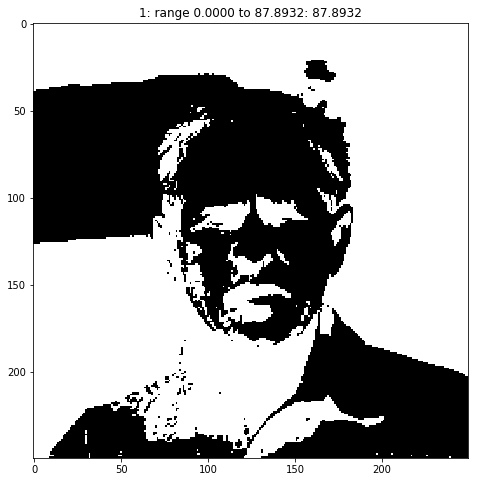

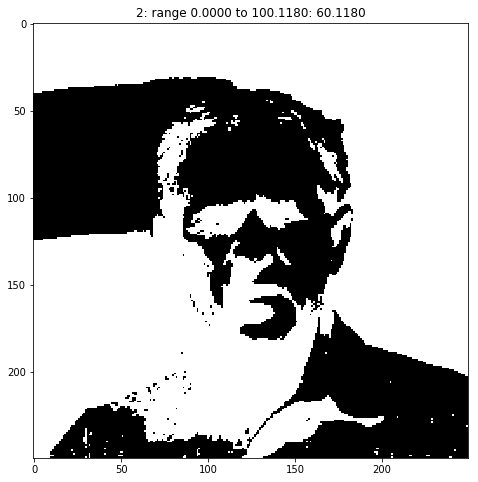

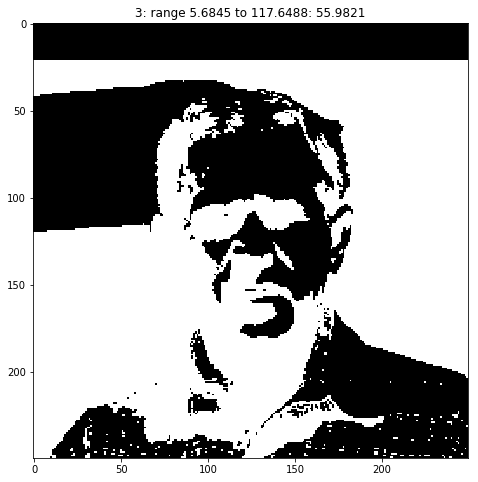

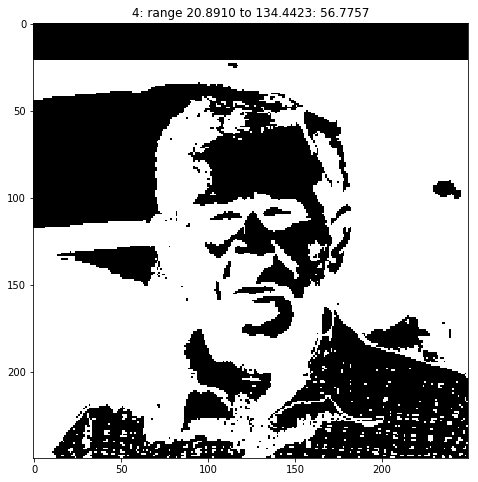

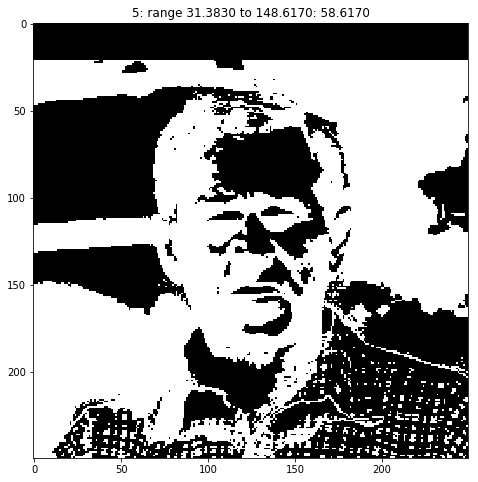

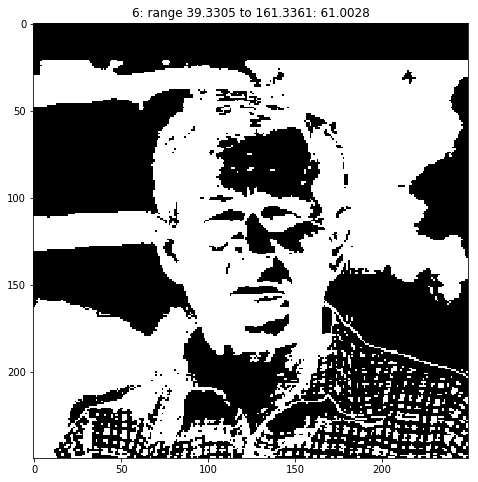

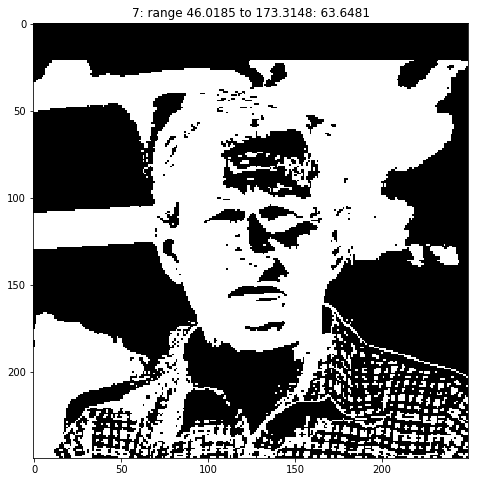

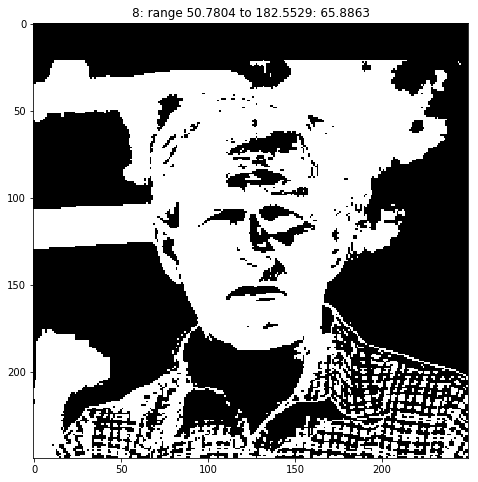

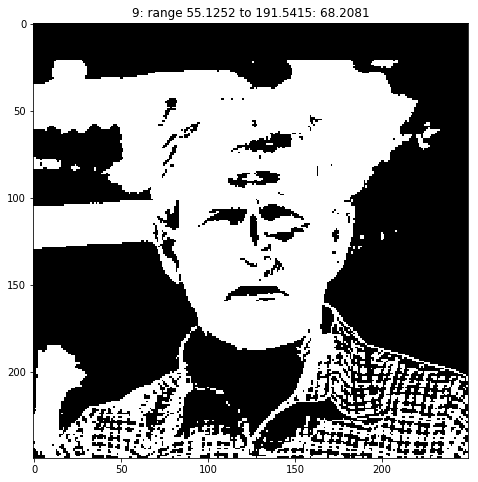

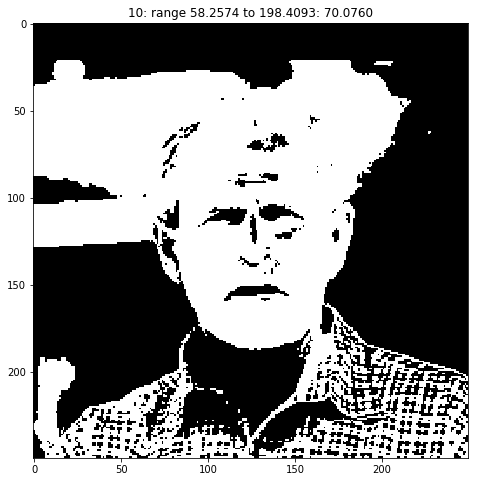

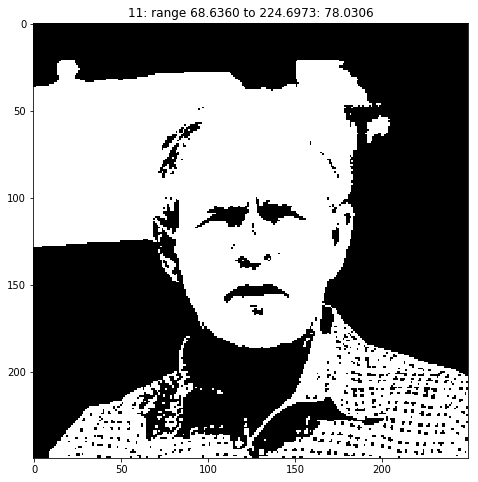

In [851]:
y = image.copy()
y_unique = np.unique(y)
cls = []

for i in y_unique:
    m = abs(i - y_unique)
#     m = m[m <= m.mean()]
    m = m.mean()# - 0.75*m.std()
    
    a = i - m;a = 0 if a < 0 else a
    b = i + m;b = 255 if b > 255 else b
    
    img = ((y >= a) & (y <= b)).astype(np.uint8)
    
#     if len(cls) > 0:
#         print(is_row_in_array(img, cls), cls.shape)
    
    display = False
    if len(cls) == 0:
        cls = np.array([img], dtype=np.uint8)
        prev = img.copy()
        
        display = True
#         print(img, i, m, end=" new!\n\n")
        
    else:
#         print(abs(prev - img).mean())
        if abs(prev - img).mean() > 10 and (not is_row_in_array(img, cls)):
    #         print(img, i, m, end="\n\n")
            cls = np.concatenate((cls, [img]))
            prev = img.copy()
            display = True

    
    if display:
        fig=plt.figure(figsize=(8, 8))
        w, h, rows, columns = 10, 10, 1, 2

        li = [0, img]

        for k in range(1, columns*rows +1):
            ax = fig.add_subplot(rows, columns, k)
            ax.set_title('{}: range {:.4f} to {:.4f}: {:.4f}'.format(len(cls), a, b, m))
            plt.imshow(li[k], cmap='gray')

        plt.show()
          
#     break

(0.6666666666666666, 8.042000820859708e-15, 0.6666666666666746) (0.6666666666666666, 8.042000820859708e-15, 0.6666666666666746)
class 1: 251 element(s)
 [  2.66666667   3.33333333   4.           4.66666667   5.33333333
   6.           6.66666667   7.33333333   8.           8.66666667
   9.33333333  10.          10.66666667  11.33333333  12.
  12.66666667  13.33333333  14.          14.66666667  15.33333333
  16.          16.66666667  17.33333333  18.          18.66666667
  19.33333333  20.          20.66666667  21.33333333  22.
  22.66666667  23.33333333  24.          24.66666667  25.33333333
  26.          26.66666667  27.33333333  28.          28.66666667
  29.33333333  30.          30.66666667  31.33333333  32.
  32.66666667  33.33333333  34.          34.66666667  35.33333333
  36.          36.66666667  37.33333333  38.          38.66666667
  39.33333333  40.          40.66666667  41.33333333  42.
  42.66666667  43.33333333  44.          44.66666667  45.33333333
  46.          46.666

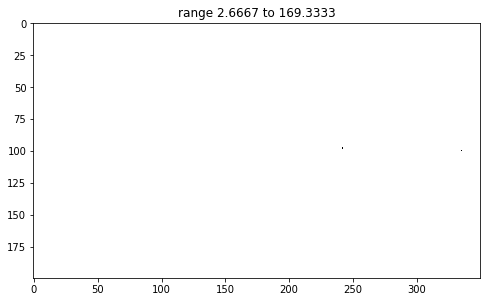

In [566]:
diff = image_1d_sorted
diffx = image_1d_sorted_unique

image_1dx = np.sort(np.unique(diffx))
diff = abs(np.diff(image_1dx))

# meancd = 26.3333#diff.mean()
meancd = 6.610132#diff.mean()

print((diff.mean(), diff.std(), diff.mean()+diff.std()), (diff[diff > 0].mean(), diff[diff > 0].std(), diff[diff > 0].mean()+diff[diff > 0].std()))

# the clusters
clusters = []

a = 0
class_pop = []
cp = 0
for i in range(len(diff)):
    cp += len(image_1d[image_1d == image_1dx[i]])
    if diff[i] >= meancd or i == len(diff)-1:
        b = i+1

        # save a cluster
        clusters.append((a, b))
        class_pop.append(cp)
        cp = 0

        print('class {}: {} element(s)\n {}\n'.format(len(clusters), b-a, image_1dx[a:b]))

        a = b


class_pop = np.array(class_pop, dtype=np.float64)
print(meancd, 'mean')

for i, j in clusters:
    fig=plt.figure(figsize=(8, 8))
    w, h, rows, columns = 10, 10, 1, 1

    image_cl = image.copy()
    clx = image_1dx[i:j]

#     print(lpi, i, j)

    for cl in clx:
        image_cl[image_cl == cl] = 1
    image_cl[image_cl != 1] = 0

    li = [0, image_cl]

    for k in range(1, columns*rows +1):
        ax = fig.add_subplot(rows, columns, k)
        ax.set_title('range {:.4f} to {:.4f}'.format(clx[0], clx[-1]))
        plt.imshow(li[k], cmap='gray')

    plt.show()

#     break